# Report Data Analysis

Goal: connect Force and IR to scare_outcome on the day. 


1. no. of individuals & visits per individual per day throughout the time course of experiments
- no. of individuals per species per day: Graph 1. mean +SD- entire course of days color coded 
- No. of visits per individual per species per day:  Graph 2. mean+-SD color coded 

2. Progressive hypotheses and predicted box plots 
3. Allocation of results to papers ordered


## 1. libraries

In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from tqdm import tqdm 
import time
from datetime import datetime, timedelta, timezone, date
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import notebooks.force_defs as force_defs
import math
importlib.reload(force_defs)


<module 'notebooks.force_defs' from 'c:\\Users\\kmh\\Documents\\shed-tits\\notebooks\\..\\notebooks\\force_defs.py'>

In [2]:
importlib.reload(force_defs)
print(dir(force_defs))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'append_csv_files', 'append_force_text_files', 'apply_butterfilt', 'assign', 'butter_filt', 'compute_Ftotal', 'convert_time_IR', 'convert_time_force', 'convert_time_rfid', 'datetime', 'describe_FTs', 'detect_bw_Ftot', 'detect_bw_Fx', 'detect_plateaus', 'fft', 'fftfreq', 'find_and_filter_sequence', 'firstbroken', 'full_merge_Frfid', 'full_merge_irfid', 'get_force', 'halve_frame', 'halve_frame2', 'irfid_allign', 'isolate_takeoff', 'match_keys_preparation', 'match_keys_preparation_0216', 'match_visits_force', 'match_visits_irfid', 'np', 'os', 'pd', 'plt', 'process_row', 'return_bw_Ftot', 'scare_control', 'scare_ordering', 'signal', 'sns', 'speed_calculation', 'sys', 'time', 'timedelta', 'timezone', 'tqdm', 'tqdm_notebook', 'zero_centering']


## 2. RFID prep

### 2.1 all experiment days 
- appended RFIDs for experimental days

##### SCARE read
- 'SCARE' is all the scare files appended, has 'scare_outcome' which 'RFID_match' does not have

In [27]:
#remake SCARE 
folder_path = 'C:\\Users\\kmh\\Documents\\DATA\\2024-5\\RFID\\SCARE'
output_file = 'SCARE.csv'

force_defs.append_csv_files(folder_path, output_file)

In [2]:
#cheeky direct formating at the csv. 
SCARE = pd.read_csv('SCARE.csv') #somehow this still leaves out Dec23 and Jan24
SCARE['date'].unique()
#don't know why but need to open the csv ad format the date into 'yyyy-mm-dd' format

array(['2024-12-12', '2024-12-15', '2024-12-23', '2024-12-31',
       '2025-01-03', '2025-01-21', '2025-01-24', '2025-01-30',
       '2025-02-06', '2025-02-12', '2025-02-16', '2025-02-19'],
      dtype=object)

In [5]:
Dec12 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2024-12-12_SCARE.csv', index_col = 0)
Dec15 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2024-12-15_SCARE.csv', index_col = 0)
Dec23 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2024-12-23_SCARE.csv', index_col = 0)
Dec31 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2024-12-31_SCARE.csv', index_col = 0)
Jan3 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-01-03_SCARE.csv', index_col = 0)
Jan21 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-01-21_SCARE.csv', index_col = 0)
Jan24 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-01-24_SCARE.csv', index_col = 0)
Jan30 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-01-30_SCARE.csv', index_col = 0)
Feb6 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-02-06_SCARE.csv', index_col = 0)
Feb12 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-02-12_SCARE.csv', index_col = 0)
Feb16 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-02-16_SCARE.csv', index_col = 0)
Feb19 = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\RFID\SCARE\2025-02-19_SCARE.csv', index_col = 0)


In [6]:
print(Dec12.head(3))
print(Dec15.head(3))
print(Dec23.head(3))
print(Dec31.head(3))
print(Jan3.head(3))
print(Jan21.head(3))
print(Jan24.head(3))
print(Jan30.head(3))
print(Feb6.head(3))
print(Feb12.head(3))
print(Feb16.head(3))
print(Feb19.head(3))


                  visit scare_control    group        date             time  \
id                                                                            
3B00185CB8  first visit           nah  control  12/12/2024  09:09:28:584496   
3B00485E69  first visit           nah  control  12/12/2024  09:10:00:774473   
3B0018A99B  first visit           nah  control  12/12/2024  09:10:06:270987   

            scare_outcome  
id                         
3B00185CB8            0.0  
3B00485E69            0.0  
3B0018A99B            0.0  
                      visit scare_control      group        date  \
id                                                                 
3B004CD4DE      first visit         SCARE  treatment  15/12/2024   
3B0019B8CC      first visit         SCARE  treatment  15/12/2024   
3B0019B8CC  not first visit         SCARE  treatment  15/12/2024   

                       time  scare_outcome  
id                                          
3B004CD4DE  09:28:40:677458      

In [3]:
print(SCARE['date'].unique())
print(SCARE.columns)

['2024-12-12' '2024-12-15' '2024-12-23' '2024-12-31' '2025-01-03'
 '2025-01-21' '2025-01-24' '2025-01-30' '2025-02-06' '2025-02-12'
 '2025-02-16' '2025-02-19']
Index(['id', 'visit', 'scare_control', 'group', 'date', 'time',
       'scare_outcome'],
      dtype='object')


In [4]:
print(SCARE['date'].dtype)
print(SCARE['time'].dtype)

object
object


In [5]:
SCARE['time'] = SCARE['time'].astype(str).apply(lambda x: ".".join(x.rsplit(":", 1)))


In [6]:
SCARE.head(3)

id        visit scare_control    group        date  \
0  3B00185CB8  first visit           nah  control  2024-12-12   
1  3B00485E69  first visit           nah  control  2024-12-12   
2  3B0018A99B  first visit           nah  control  2024-12-12   

              time scare_outcome  
0  09:09:28.584496             0  
1  09:10:00.774473             0  
2  09:10:06.270987             0

In [7]:
# merge into 'datetime' column and change to datetime format. 
# Convert 'date' to datetime format
SCARE['datetime'] = SCARE['date']+ ' '+SCARE['time']
SCARE['datetime'] = pd.to_datetime(SCARE['datetime'])
SCARE.head(3)


id        visit scare_control    group        date  \
0  3B00185CB8  first visit           nah  control  2024-12-12   
1  3B00485E69  first visit           nah  control  2024-12-12   
2  3B0018A99B  first visit           nah  control  2024-12-12   

              time scare_outcome                   datetime  
0  09:09:28.584496             0 2024-12-12 09:09:28.584496  
1  09:10:00.774473             0 2024-12-12 09:10:00.774473  
2  09:10:06.270987             0 2024-12-12 09:10:06.270987

In [8]:
scare_filtered = SCARE[['id','visit','datetime','group','scare_control','scare_outcome',]]
scare_filtered.head(5)
print(scare_filtered.dtypes)

scare_filtered['scare_outcome'] = scare_filtered['scare_outcome'].fillna(0)


id                       object
visit                    object
datetime         datetime64[ns]
group                    object
scare_control            object
scare_outcome            object
dtype: object


C:\Users\kmh\AppData\Local\Temp\ipykernel_20928\1832059667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scare_filtered['scare_outcome'] = scare_filtered['scare_outcome'].fillna(0)


In [9]:
scare_filtered.loc[:, 'id'] = scare_filtered['id'].astype(str)
scare_filtered = scare_filtered[(scare_filtered['id'].str.len() == 10) 
                        & (~scare_filtered['id'].str.contains('?', regex=False))]

In [10]:
scare_filtered.head(8) #scare_outcome correct

id            visit                   datetime      group  \
0  3B00185CB8      first visit 2024-12-12 09:09:28.584496    control   
1  3B00485E69      first visit 2024-12-12 09:10:00.774473    control   
2  3B0018A99B      first visit 2024-12-12 09:10:06.270987    control   
3  3B0018C6F9      first visit 2024-12-12 09:10:24.049161    control   
4  3B00190DF0      first visit 2024-12-12 09:10:39.664911  treatment   
5  3B0019B8CC      first visit 2024-12-12 09:10:47.773249  treatment   
6  3B00485E69  not first visit 2024-12-12 09:10:55.736410    control   
7  3B00190DF0  not first visit 2024-12-12 09:11:12.541564  treatment   

  scare_control scare_outcome  
0           nah             0  
1           nah             0  
2           nah             0  
3           nah             0  
4         SCARE             1  
5         SCARE             1  
6           nah             0  
7           nah             0

In [ ]:
scare_filtered.shape #6369 after fixing Dec23 and Jan24 #6319 without faulty rfids

(6319, 6)

In [12]:
scare_filtered['datetime'] =pd.to_datetime(scare_filtered['datetime'])
scare_filtered['day'] = scare_filtered['datetime'].dt.date
scare_filtered['day'].unique()

array([datetime.date(2024, 12, 12), datetime.date(2024, 12, 15),
       datetime.date(2024, 12, 23), datetime.date(2024, 12, 31),
       datetime.date(2025, 1, 3), datetime.date(2025, 1, 21),
       datetime.date(2025, 1, 24), datetime.date(2025, 1, 30),
       datetime.date(2025, 2, 6), datetime.date(2025, 2, 12),
       datetime.date(2025, 2, 16), datetime.date(2025, 2, 19)],
      dtype=object)

### 2.2 control and treatment visits 
- Only on experimental days there are treatment visits

In [13]:
treatment_visits = scare_filtered[scare_filtered['group']== "treatment"]
print(treatment_visits.shape) #3173-> 3152
control_visits = scare_filtered[scare_filtered['group']== "control"]
print(control_visits.shape) #3196 ->3167

(3152, 7)
(3167, 7)


#### save control and treatment_visits.csv

In [ ]:
treatment_visits.to_csv('treatment_visits.csv')
control_visits.to_csv('control_visits.csv')
#good to use - the 50 rows that are missing are from faulty RFID reading

### 2.3 first visits

In [14]:
# Create the 'day' column using .loc to avoid the SettingWithCopyWarning
scare_filtered.loc[:, 'day'] = scare_filtered['datetime'].dt.date  # Extract the date part (year-month-day)

# Initialize a list to store results
result_rows = []

# Iterate over each day in the 'day' column
for day, day_group in scare_filtered.groupby('day'):
    # Handle the 'control' group
    control_rows = day_group[(day_group['group'] == 'control') & (day_group['visit'] == 'first visit')]
    result_rows.extend(control_rows.to_dict('records'))  # Add all matching rows to the results

    # Handle the 'treatment' group
    treatment_groups = day_group[day_group['group'] == 'treatment']
    
    for unique_id, id_group in treatment_groups.groupby('id'):
        first_visit_rows = id_group[(id_group['visit'] == 'first visit') & (id_group['scare_outcome'] == 1.0)]
        if not first_visit_rows.empty:
            result_rows.append(first_visit_rows.iloc[0].to_dict())  # Add the valid first visit row
        else:
            # Fallback: Find the next row with 'scare_outcome' == 1.0
            next_scare_rows = id_group[id_group['scare_outcome'] == "1.0"].sort_values(by='datetime')
            if not next_scare_rows.empty:
                result_rows.append(next_scare_rows.iloc[0].to_dict())  # Add the first valid row based on 'datetime'

# Convert results into a DataFrame
final_result = pd.DataFrame(result_rows)

# Verify the result
print(final_result)

             id        visit                   datetime    group  \
0    3B00185CB8  first visit 2024-12-12 09:09:28.584496  control   
1    3B00485E69  first visit 2024-12-12 09:10:00.774473  control   
2    3B0018A99B  first visit 2024-12-12 09:10:06.270987  control   
3    3B0018C6F9  first visit 2024-12-12 09:10:24.049161  control   
4    3B00192E1E  first visit 2024-12-12 09:14:07.308664  control   
..          ...          ...                        ...      ...   
170  01103FD2E8  first visit 2025-02-19 13:03:56.130069  control   
171  3B001870F2  first visit 2025-02-19 13:42:05.436224  control   
172  3B001886D3  first visit 2025-02-19 14:32:11.257782  control   
173  3B004CC5C5  first visit 2025-02-19 17:26:25.219954  control   
174  3B001816CC  first visit 2025-02-19 17:41:21.860971  control   

    scare_control scare_outcome         day  
0             nah             0  2024-12-12  
1             nah             0  2024-12-12  
2             nah             0  2024-12-12  

In [15]:
final_result.shape #200 -> #175

(175, 7)

#### save first_visits.csv

In [16]:
final_result.to_csv('first_visits.csv')

### 2.4 load day1 // day-1

In [17]:
RFID_match_dayminus1 = pd.read_csv('RFID_match_day-1.csv', index_col = 0 )
RFID_match_day0 = pd.read_csv('RFID_match_scares.csv', index_col = 0 ) 
RFID_match_day1 = pd.read_csv('RFID_match_day1.csv', index_col = 0 ) 
print(RFID_match_dayminus1.head(5))
print(RFID_match_day0.head(5))
print(RFID_match_day1.head(5))

RFID_match_dayminus1['rfid_datetime'] = pd.to_datetime(RFID_match_dayminus1['rfid_datetime'], format='%Y-%m-%d %H:%M:%S.%f')
RFID_match_day0['rfid_datetime'] = pd.to_datetime(RFID_match_day0['rfid_datetime'], format='%Y-%m-%d %H:%M:%S.%f')
RFID_match_day1['rfid_datetime'] = pd.to_datetime(RFID_match_day1['rfid_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

RFID_match_dayminus1['day'] = pd.to_datetime(RFID_match_dayminus1['rfid_datetime']).dt.date
RFID_match_day0['day'] = pd.to_datetime(RFID_match_day0['rfid_datetime']).dt.date
RFID_match_day1['day'] = pd.to_datetime(RFID_match_day1['rfid_datetime']).dt.date

print(f"day-1: {RFID_match_dayminus1['day'].unique()}") 
print(f"day0: {RFID_match_day0['day'].unique()}") 
print(f"day1: {RFID_match_day1['day'].unique()}")

           id  status               rfid_datetime
0  3B00185E23  Arrive  2024-12-11 07:59:35.920756
1  3B00185E23  Depart  2024-12-11 07:59:38.329956
2  3B0018C6F9  Arrive  2024-12-11 08:00:47.726152
3  3B0018C6F9  Depart  2024-12-11 08:00:50.939834
4  3B00185E23  Arrive  2024-12-11 08:02:36.441403
           id  status               rfid_datetime
0  3B00185CB8  Arrive  2024-12-12 08:09:28.583949
1  3B00185CB8  Depart  2024-12-12 08:09:30.994259
2  3B00485E69  Arrive  2024-12-12 08:10:00.773757
3  3B00485E69  Depart  2024-12-12 08:10:03.386858
4  3B0018A99B  Arrive  2024-12-12 08:10:06.270185
           id  status               rfid_datetime
0  3B00190DF0  Arrive  2024-12-13 09:07:04.359618
1  3B00190DF0  Depart  2024-12-13 09:07:06.771829
2  3B00185E23  Arrive  2024-12-13 09:20:00.998900
3  3B00185E23  Depart  2024-12-13 09:20:04.211711
4  3B00192E1E  Arrive  2024-12-13 09:20:15.615671
day-1: [datetime.date(2024, 12, 11) datetime.date(2024, 12, 14)
 datetime.date(2024, 12, 22) datetim

In [18]:
RFID_match_dayminus1

id  status              rfid_datetime         day
0      3B00185E23  Arrive 2024-12-11 07:59:35.920756  2024-12-11
1      3B00185E23  Depart 2024-12-11 07:59:38.329956  2024-12-11
2      3B0018C6F9  Arrive 2024-12-11 08:00:47.726152  2024-12-11
3      3B0018C6F9  Depart 2024-12-11 08:00:50.939834  2024-12-11
4      3B00185E23  Arrive 2024-12-11 08:02:36.441403  2024-12-11
...           ...     ...                        ...         ...
15414  01103F9664  Depart 2025-02-18 17:16:55.508685  2025-02-18
15415  01103F9664  Arrive 2025-02-18 17:17:00.270008  2025-02-18
15416  01103F9664  Depart 2025-02-18 17:17:04.487794  2025-02-18
15417  01103F9664  Arrive 2025-02-18 17:19:43.572718  2025-02-18
15418  01103F9664  Depart 2025-02-18 17:19:52.224027  2025-02-18

[15290 rows x 4 columns]

In [19]:
RFID_match_day0['day'].unique()

array([datetime.date(2024, 12, 12), datetime.date(2024, 12, 15),
       datetime.date(2024, 12, 23), datetime.date(2024, 12, 31),
       datetime.date(2025, 1, 3), datetime.date(2025, 1, 21),
       datetime.date(2025, 1, 24), datetime.date(2025, 1, 30),
       datetime.date(2025, 2, 6), datetime.date(2025, 2, 12),
       datetime.date(2025, 2, 16), datetime.date(2025, 2, 19)],
      dtype=object)

In [26]:
#change 'rfid_datetime' to 'datetime' 
RFID_match_day1.rename(columns={'rfid_datetime': 'datetime'}, inplace=True)
RFID_match_dayminus1.rename(columns = {'rfid_datetime': 'datetime'}, inplace=True)

## 3. Merge IR - RFID
- combine with IRFID with just acc1 -3 

### 3.1 IR dataset

In [21]:
irfid_calc_day0 = pd.read_csv('irfid_calc_scares.csv',index_col = 0)
irfid_calc_day1 = pd.read_csv('irfid_calc_day1.csv', index_col =0)
irfid_calc_dayminus1 = pd.read_csv('irfid_calc_day-1.csv', index_col =0 )

print(f"irfid day-1: {irfid_calc_dayminus1.head(5)}")
print(f"irfid day0: {irfid_calc_day0.head(5)}")
print(f"irfid day1: {irfid_calc_day1.head(5)}")

irfid_calc_dayminus1['datetime'] = pd.to_datetime(irfid_calc_dayminus1['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
irfid_calc_day0['datetime'] = pd.to_datetime(irfid_calc_day0['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
irfid_calc_day1['datetime'] = pd.to_datetime(irfid_calc_day1['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

irfid_calc_dayminus1['day'] = irfid_calc_dayminus1['datetime'].dt.date
print(f"day-1 unique days: {irfid_calc_dayminus1['day'].unique()}") 

irfid_calc_day0['day'] = irfid_calc_day0['datetime'].dt.date
print(f"day0 unique days: {irfid_calc_day0['day'].unique()}") 

irfid_calc_day1['day'] = irfid_calc_day1['datetime'].dt.date
print(f"day1 unique days: {irfid_calc_day1['day'].unique()}") 


irfid day-1:          RFID  firstbroken1  firstbroken2  firstbroken3  firstbroken4  \
0  3B0018C6F9  1.733904e+09  1.733904e+09  1.733904e+09  1.733904e+09   
1  3B00185E23  1.733904e+09  1.733904e+09  1.733904e+09  1.733904e+09   
2  3B00185CB8  1.733904e+09  1.733904e+09  1.733904e+09  1.733904e+09   
3  3B00185CB8  1.733904e+09  1.733904e+09  1.733904e+09  1.733904e+09   
4  01103FA4B2  1.733904e+09  1.733904e+09  1.733904e+09  1.733904e+09   

   firstbroken5  level_0                 datetime  takeoff_event         day  \
0  1.733904e+09        0  2024-12-11 08:00:48.289              1  2024-12-11   
1  1.733904e+09       37  2024-12-11 08:02:36.599              3  2024-12-11   
2  1.733904e+09       86  2024-12-11 08:05:55.755              6  2024-12-11   
3  1.733904e+09      101  2024-12-11 08:05:57.182              7  2024-12-11   
4  1.733904e+09      127  2024-12-11 08:06:16.031              8  2024-12-11   

   ...    t45        v1        v2        v3        v4     avg.v    

#### day-1

In [22]:
irfid_filt_dayminus1 =  irfid_calc_dayminus1[['RFID','datetime','t12','t23','t34','t45','v1','v2','v3','v4','avg.v','acc1','acc2','acc3','avg.acc']]
irfid_filt_dayminus1 = irfid_filt_dayminus1.rename(columns={'RFID': 'id'})

irfid_filt_dayminus1['datetime'] = pd.to_datetime(irfid_filt_dayminus1['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

irfid_filt_dayminus1.loc[:, 'day'] = irfid_filt_dayminus1['datetime'].dt.date  # Extract the date part (year-month-day)
irfid_filt_dayminus1.head(10)
irfid_filt_dayminus1['day'].unique()

array([datetime.date(2024, 12, 11), datetime.date(2024, 12, 14),
       datetime.date(2024, 12, 22), datetime.date(2024, 12, 30),
       datetime.date(2025, 1, 2), datetime.date(2025, 1, 20),
       datetime.date(2025, 1, 23), datetime.date(2025, 1, 29),
       datetime.date(2025, 2, 5), datetime.date(2025, 2, 11),
       datetime.date(2025, 2, 15), datetime.date(2025, 2, 18)],
      dtype=object)

#### day 0 

In [23]:
irfid_filt_day0 =  irfid_calc_day0[['RFID','datetime','t12','t23','t34','t45','v1','v2','v3','v4','avg.v','acc1','acc2','acc3','avg.acc']]
irfid_filt_day0 = irfid_filt_day0.rename(columns={'RFID': 'id'})

irfid_filt_day0['datetime'] = pd.to_datetime(irfid_filt_day0['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

irfid_filt_day0.loc[:, 'day'] = irfid_filt_day0['datetime'].dt.date  # Extract the date part (year-month-day)
irfid_filt_day0.head(10)

id                datetime    t12    t23    t34     t45        v1  \
0  3B00485E69 2024-12-12 08:10:01.013  0.148  0.148  0.074   0.074  0.912162   
1  3B0018A99B 2024-12-12 08:10:07.141  0.314  0.074  0.147   0.069  0.429936   
2  3B0018C6F9 2024-12-12 08:10:24.817  0.227  0.148  0.079  10.644  0.594714   
3  3B0019B8CC 2024-12-12 08:10:48.366  0.133  0.074  0.074   0.074  1.015037   
4  01103FA4B2 2024-12-12 08:11:28.788  0.143  0.074  0.074   0.073  0.944057   
5  3B00182A81 2024-12-12 08:11:30.765  0.143  0.074  0.074   0.073  0.944057   
6  3B00185CB8 2024-12-12 08:12:19.323  0.412  0.074  0.074   9.107  0.327670   
7  3B0019B8CC 2024-12-12 08:12:40.302  2.817  0.074  0.074   0.074  0.047923   
8  3B00182A81 2024-12-12 08:13:18.692  0.148  0.074  0.074   0.074  0.912162   
9  01103F9A64 2024-12-12 08:13:59.051  4.461  0.074  0.074   0.074  0.030262   

         v2        v3        v4     avg.v      acc1      acc2      acc3  \
0  0.912162  1.824327  1.824321  1.216216  0.000000  8.217708 -0.000079   
1  1.824321  0.918367  1.956528  0.894040  7.187551 -8.198676  9.612613   
2  0.912162  1.708861  0.012683  0.048657  1.693059  7.019372 -0.316363   
3  1.824327  1.824321  1.824327  1.521127  7.819233 -0.000079  0.000079   
4  1.824321  1.824327  1.849316  1.483517  8.113038  0.000079  0.339987   
5  1.824321  1.824327  1.849316  1.483517  8.113038  0.000079  0.339987   
6  1.824321  1.824327  0.014824  0.055860  6.159059  0.000079 -0.394184   
7  1.824321  1.824327  1.824321  0.177690  1.228916  0.000079 -0.000079   
8  1.824321  1.824327  1.824321  1.459459  8.217646  0.000079 -0.000079   
9  1.824327  1.824321  1.824327  0.115311  0.791208 -0.000079  0.000079   

    avg.acc         day  
0 -0.914905  2024-12-12  
1  0.914258  2024-12-12  
2 -0.092343  2024-12-12  
3 -2.211603  2024-12-12  
4 -1.838406  2024-12-12  
5 -1.838406  2024-12-12  
6 -0.051945  2024-12-12  
7  1.794247  2024-12-12  
8 -1.697539  2024-12-12  
9  1.811799  2024-12-12

#### day 1

In [24]:
irfid_filt_day1 =  irfid_calc_day1[['RFID','datetime','t12','t23','t34','t45','v1','v2','v3','v4','avg.v','acc1','acc2','acc3','avg.acc']]
irfid_filt_day1 = irfid_filt_day1.rename(columns={'RFID': 'id'})

irfid_filt_day1['datetime'] = pd.to_datetime(irfid_filt_day1['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

irfid_filt_day1.loc[:, 'day'] = irfid_filt_day1['datetime'].dt.date  # Extract the date part (year-month-day)
irfid_filt_day1.head(10)

id                datetime    t12    t23    t34     t45        v1  \
0  3B00192E1E 2024-12-13 09:20:16.689  0.516  0.146  0.073   0.062  0.261628   
1  3B00185CB8 2024-12-13 09:20:19.356  0.145  0.068  0.072  37.440  0.931035   
2  01103F97C4 2024-12-13 09:21:08.931  1.939  0.073  0.068   0.072  0.069624   
3  01103F97C4 2024-12-13 09:21:11.156  1.222  0.074  0.153   0.069  0.110475   
4  01103F97C4 2024-12-13 09:22:10.424  0.074  0.147  0.069   0.074  1.824327   
5  3B001874E8 2024-12-13 09:22:51.755  0.152  0.069  0.074   0.073  0.888158   
6  01103FD2E8 2024-12-13 09:23:25.914  0.147  0.074  0.074   0.073  0.918367   
7  3B004AB6A7 2024-12-13 09:23:35.147  0.142  0.074  0.074   0.074  0.950704   
8  3B001874E8 2024-12-13 09:23:58.140  0.148  0.142  0.075   0.073  0.912162   
9  3B00192E1E 2024-12-13 09:24:17.968  0.145  0.062  0.072   0.063  0.931035   

         v2        v3        v4     avg.v       acc1      acc2      acc3  \
0  0.924657  1.849316  2.177418  0.677541   2.003107  8.444376  4.860769   
1  1.985292  1.874999  0.003606  0.014314   9.899126 -1.575606 -0.099776   
2  1.849310  1.985299  1.874999  0.250929   1.769072  1.928916 -1.575709   
3  1.824327  0.882352  1.956522  0.355731   2.644834 -8.299339  9.677196   
4  0.918367  1.956522  1.824321  1.483516  -8.198738  9.612540 -1.848952   
5  1.956522  1.824327  1.849316  1.467392   9.668449 -1.848873  0.339987   
6  1.824327  1.824321  1.849316  1.467391   8.198738 -0.000079  0.340066   
7  1.824327  1.824321  1.824327  1.483517   8.089105 -0.000079  0.000079   
8  0.950704  1.799999  1.849316  1.232877   0.265809  7.827598  0.666451   
9  2.177418  1.874999  2.142858  1.578947  12.042351 -4.513711  3.968283   

    avg.acc         day  
0  1.662403  2024-12-13  
1 -0.045571  2024-12-13  
2  1.814272  2024-12-13  
3  1.829903  2024-12-13  
4 -4.466460  2024-12-13  
5 -1.626843  2024-12-13  
6 -1.710245  2024-12-13  
7 -1.889363  2024-12-13  
8 -0.935912  2024-12-13  
9 -1.769051  2024-12-13

### 3.2 load visit RFIDs

In [25]:
treatment_visits = pd.read_csv('treatment_visits.csv', index_col = 0)
control_visits = pd.read_csv('control_visits.csv', index_col = 0 )
first_visits = pd.read_csv('first_visits.csv', index_col =0)
print(f"treatment_visits head:{treatment_visits.head(3)}")
print(f"control_visits head:{control_visits.head(3)}")
print(f"first_visits head:{first_visits.head(3)}")

treatment_visits head:           id            visit                    datetime      group  \
4  3B00190DF0      first visit  2024-12-12 09:10:39.664911  treatment   
5  3B0019B8CC      first visit  2024-12-12 09:10:47.773249  treatment   
7  3B00190DF0  not first visit  2024-12-12 09:11:12.541564  treatment   

  scare_control scare_outcome         day  
4         SCARE             1  2024-12-12  
5         SCARE             1  2024-12-12  
7           nah             0  2024-12-12  
control_visits head:           id        visit                    datetime    group scare_control  \
0  3B00185CB8  first visit  2024-12-12 09:09:28.584496  control           nah   
1  3B00485E69  first visit  2024-12-12 09:10:00.774473  control           nah   
2  3B0018A99B  first visit  2024-12-12 09:10:06.270987  control           nah   

  scare_outcome         day  
0             0  2024-12-12  
1             0  2024-12-12  
2             0  2024-12-12  
first_visits head:           id        visit

In [26]:
RFID_match_day0

id  status              rfid_datetime         day
0      3B00185CB8  Arrive 2024-12-12 08:09:28.583949  2024-12-12
1      3B00185CB8  Depart 2024-12-12 08:09:30.994259  2024-12-12
2      3B00485E69  Arrive 2024-12-12 08:10:00.773757  2024-12-12
3      3B00485E69  Depart 2024-12-12 08:10:03.386858  2024-12-12
4      3B0018A99B  Arrive 2024-12-12 08:10:06.270185  2024-12-12
...           ...     ...                        ...         ...
12375  3B001816CC  Depart 2025-02-19 16:41:25.073358  2025-02-19
12376  3B004CC5C5  Arrive 2025-02-19 16:41:55.191011  2025-02-19
12377  3B004CC5C5  Depart 2025-02-19 16:41:57.599502  2025-02-19
12378  3B004CC5C5  Arrive 2025-02-19 16:41:57.775591  2025-02-19
12379  3B004CC5C5  Depart 2025-02-19 16:42:00.188613  2025-02-19

[12274 rows x 4 columns]

### 3.3 match IR - RFID 
- find out the matching arrive and depart time and then match by IR time between arrive and depart by 4 seconds 

- there is sub 1s difference between the epoch_time_converted in RFID and the logged %Y:%m:%s data in SCARE, and the difference between arrive and depart time is usually below 5. 

In [ ]:
#just run once as otherwise -1 hr every run. 
control_visits_ir = force_defs.match_visits_irfid(control_visits, irfid_filt_day0, True)
treatment_visits_ir = force_defs.match_visits_irfid(treatment_visits, irfid_filt_day0, True)
print(f"control_visits_ir shape: {control_visits_ir.shape}") #1693
print(f"treatment_visits_ir shape: {treatment_visits_ir.shape}") #1728 #both replicated 2025-06-15

control_visits_ir shape: (1693, 21)
treatment_visits_ir shape: (1728, 21)


In [28]:
control_visits.head(3)
control_visits['day'].dtype
control_visits['day'] = pd.to_datetime(control_visits['day'],errors = "coerce")
control_visits[control_visits['day'] == pd.Timestamp("2025-01-30")]

id            visit                   datetime    group  \
3138  3B00192E1E      first visit 2025-01-30 07:59:30.091048  control   
3139  3B001816CC      first visit 2025-01-30 07:59:39.191091  control   
3140  3B00192E1E  not first visit 2025-01-30 08:01:08.481149  control   
3142  3B001816CC  not first visit 2025-01-30 08:01:53.847093  control   
3143  3B00186A36      first visit 2025-01-30 08:02:37.184982  control   
...          ...              ...                        ...      ...   
3317  3B00182A81  not first visit 2025-01-30 16:32:48.761937  control   
3318  3B00484043  not first visit 2025-01-30 16:33:02.163270  control   
3320  3B00182A81  not first visit 2025-01-30 16:34:25.071261  control   
3323  3B00182A81  not first visit 2025-01-30 16:37:09.533871  control   
3324  3B00182A81  not first visit 2025-01-30 16:54:00.481297  control   

     scare_control scare_outcome        day  
3138           nah             0 2025-01-30  
3139           nah             0 2025-01-30  
3140           nah             0 2025-01-30  
3142           nah             0 2025-01-30  
3143           nah             0 2025-01-30  
...            ...           ...        ...  
3317           nah             0 2025-01-30  
3318           nah             0 2025-01-30  
3320           nah             0 2025-01-30  
3323           nah             0 2025-01-30  
3324           nah             0 2025-01-30  

[100 rows x 7 columns]

In [29]:
print(treatment_visits.head(3))
treatment_visits['day'].dtype
treatment_visits['day'] = pd.to_datetime(treatment_visits['day'],errors = "coerce")
treatment_visits[treatment_visits['day'] == pd.Timestamp("2025-01-24")]

           id            visit                   datetime      group  \
4  3B00190DF0      first visit 2024-12-12 08:10:39.664911  treatment   
5  3B0019B8CC      first visit 2024-12-12 08:10:47.773249  treatment   
7  3B00190DF0  not first visit 2024-12-12 08:11:12.541564  treatment   

  scare_control scare_outcome         day  
4         SCARE             1  2024-12-12  
5         SCARE             1  2024-12-12  
7           nah             0  2024-12-12  


id            visit                   datetime      group  \
2543  3B004CD4DE      first visit 2025-01-24 08:00:25.828121  treatment   
2544  3B004CD4DE  not first visit 2025-01-24 08:01:19.063677  treatment   
2545  3B00185CB8      first visit 2025-01-24 08:08:30.463659  treatment   
2546  3B004CD4DE  not first visit 2025-01-24 08:09:05.231335  treatment   
2547  3B0018C6F9      first visit 2025-01-24 08:09:40.113319  treatment   
...          ...              ...                        ...        ...   
3129  3B004CD4DE  not first visit 2025-01-24 16:32:08.472116  treatment   
3131  3B004CD4DE  not first visit 2025-01-24 16:33:05.510681  treatment   
3132  3B0019B8CC  not first visit 2025-01-24 16:33:22.689984  treatment   
3135  3B004CD4DE  not first visit 2025-01-24 16:40:42.505220  treatment   
3137  3B004CD4DE  not first visit 2025-01-24 16:42:35.506092  treatment   

     scare_control scare_outcome        day  
2543         SCARE             0 2025-01-24  
2544           nah             0 2025-01-24  
2545         SCARE             0 2025-01-24  
2546           nah             0 2025-01-24  
2547         SCARE             1 2025-01-24  
...            ...           ...        ...  
3129         SCARE             0 2025-01-24  
3131         SCARE             1 2025-01-24  
3132         SCARE             1 2025-01-24  
3135         SCARE             0 2025-01-24  
3137           nah             0 2025-01-24  

[372 rows x 7 columns]

In [30]:
first_visits_ir = force_defs.match_visits_irfid(first_visits, irfid_filt_day0, True)
print(f"first_visits_ir shape: {first_visits_ir.shape}") #85

first_visits_ir shape: (85, 21)


In [ ]:
print(RFID_match_day1.head(5))
RFID_match_day1.rename(columns={'rfid_datetime': 'datetime'}, inplace=True)
print(RFID_match_day1.head(5))
print(irfid_filt_day1.head(5))

           id  status              rfid_datetime         day
0  3B00190DF0  Arrive 2024-12-13 09:07:04.359618  2024-12-13
1  3B00190DF0  Depart 2024-12-13 09:07:06.771829  2024-12-13
2  3B00185E23  Arrive 2024-12-13 09:20:00.998900  2024-12-13
3  3B00185E23  Depart 2024-12-13 09:20:04.211711  2024-12-13
4  3B00192E1E  Arrive 2024-12-13 09:20:15.615671  2024-12-13
           id  status                   datetime         day
0  3B00190DF0  Arrive 2024-12-13 09:07:04.359618  2024-12-13
1  3B00190DF0  Depart 2024-12-13 09:07:06.771829  2024-12-13
2  3B00185E23  Arrive 2024-12-13 09:20:00.998900  2024-12-13
3  3B00185E23  Depart 2024-12-13 09:20:04.211711  2024-12-13
4  3B00192E1E  Arrive 2024-12-13 09:20:15.615671  2024-12-13
           id                datetime    t12    t23    t34     t45        v1  \
0  3B00192E1E 2024-12-13 09:20:16.689  0.516  0.146  0.073   0.062  0.261628   
1  3B00185CB8 2024-12-13 09:20:19.356  0.145  0.068  0.072  37.440  0.931035   
2  01103F97C4 2024-12-13 09:

In [33]:
print(RFID_match_dayminus1.head(5))
RFID_match_dayminus1.rename(columns = {'rfid_datetime': 'datetime'}, inplace = True)
print(RFID_match_dayminus1.head(5))
print(irfid_filt_dayminus1.head(5))

           id  status              rfid_datetime         day
0  3B00185E23  Arrive 2024-12-11 07:59:35.920756  2024-12-11
1  3B00185E23  Depart 2024-12-11 07:59:38.329956  2024-12-11
2  3B0018C6F9  Arrive 2024-12-11 08:00:47.726152  2024-12-11
3  3B0018C6F9  Depart 2024-12-11 08:00:50.939834  2024-12-11
4  3B00185E23  Arrive 2024-12-11 08:02:36.441403  2024-12-11
           id  status                   datetime         day
0  3B00185E23  Arrive 2024-12-11 07:59:35.920756  2024-12-11
1  3B00185E23  Depart 2024-12-11 07:59:38.329956  2024-12-11
2  3B0018C6F9  Arrive 2024-12-11 08:00:47.726152  2024-12-11
3  3B0018C6F9  Depart 2024-12-11 08:00:50.939834  2024-12-11
4  3B00185E23  Arrive 2024-12-11 08:02:36.441403  2024-12-11
           id                datetime    t12    t23    t34    t45        v1  \
0  3B0018C6F9 2024-12-11 08:00:48.289  0.283  0.131  0.058  0.067  0.477032   
1  3B00185E23 2024-12-11 08:02:36.599  0.134  0.069  0.059  0.074  1.007462   
2  3B00185CB8 2024-12-11 08:05:

##### day -1 & 1 match without group

In [34]:
dayminus1_visits_ir = force_defs.match_visits_irfid(RFID_match_dayminus1, irfid_filt_dayminus1, False)

In [ ]:
print(f"day-1_visits_ir shape: {dayminus1_visits_ir.shape}") ##6701 replicated 2025-06-15

day-1_visits_ir shape: (6701, 18)


In [36]:
dayminus1_visits_ir['day'].unique() #why is 2025-02-18 not in? 

array([datetime.date(2024, 12, 11), datetime.date(2024, 12, 14),
       datetime.date(2024, 12, 22), datetime.date(2024, 12, 30),
       datetime.date(2025, 1, 2), datetime.date(2025, 1, 20),
       datetime.date(2025, 1, 23), datetime.date(2025, 1, 29),
       datetime.date(2025, 2, 5), datetime.date(2025, 2, 11),
       datetime.date(2025, 2, 15)], dtype=object)

In [ ]:
day1_visits_ir = force_defs.match_visits_irfid(RFID_match_day1, irfid_filt_day1, False)
#remember to turn off -1 hr in the definition 33 -> 5171
print(f"day1_visits_ir shape: {day1_visits_ir.shape}") #replicated 2025-06-15

day1_visits_ir shape: (5171, 18)


In [38]:
day1_visits_ir['day'].unique()

array([datetime.date(2024, 12, 13), datetime.date(2024, 12, 16),
       datetime.date(2024, 12, 24), datetime.date(2025, 1, 1),
       datetime.date(2025, 1, 4), datetime.date(2025, 1, 22),
       datetime.date(2025, 1, 25), datetime.date(2025, 1, 31),
       datetime.date(2025, 2, 7), datetime.date(2025, 2, 13),
       datetime.date(2025, 2, 20)], dtype=object)

#### save treatment_visits_ir.csv and control_visits_ir.csv

In [39]:
treatment_visits_ir.to_csv('treatment_visits_ir.csv') #1728
control_visits_ir.to_csv('control_visits_ir.csv') #1693
#total = 3421

In [40]:
first_visits_ir.to_csv('first_visits_ir.csv')

In [41]:
day1_visits_ir.to_csv('day1_visits_ir.csv') #5171 rows 

In [42]:
dayminus1_visits_ir.to_csv('day-1_visits_ir.csv') ##6701 rows

## 4. F preparation

#### 4.0.a scare days themselves

In [6]:
Dec12 = pd.read_csv(r'D:\FTdata\2024_12_12_F_matched.csv')
Dec15 = pd.read_csv(r'D:\FTdata\2024_12_15_F_matched.csv')
Dec23 = pd.read_csv(r'D:\FTdata\2024_12_23_F_matched.csv')
Dec31 = pd.read_csv(r'D:\FTdata\2024_12_31_F_matched.csv')
Jan3 = pd.read_csv(r'D:\FTdata\2025_01_03_F_matched.csv')
Jan21 = pd.read_csv(r'D:\FTdata\2025_01_21_F_matched.csv')
Jan30 = pd.read_csv(r'D:\FTdata\2025_01_30_F_matched.csv')
Feb6 = pd.read_csv(r'D:\FTdata\2025_02_06_F_matched.csv')
Feb12 = pd.read_csv(r'D:\FTdata\2025_02_12_F_matched.csv')
Feb16 = pd.read_csv(r'D:\FTdata\2025_02_16_F_matched.csv')
Feb19 = pd.read_csv(r'D:\FTdata\2025_02_19_F_matched.csv')
Jan24 = pd.read_csv(r'D:\FTdata\2025_01_24_F_matched.csv')
#12 datasets

#### 4.0.b scare days +1 

In [2]:
Dec13 = pd.read_csv(r'D:\FTdata\2024_12_13_F_matched.csv')
Dec16 = pd.read_csv(r'D:\FTdata\2024_12_16_F_matched.csv')
Dec24 = pd.read_csv(r'D:\FTdata\2024_12_24_F_matched.csv')
Jan1 = pd.read_csv(r'D:\FTdata\2025_01_01_F_matched.csv')
Jan4 = pd.read_csv(r'D:\FTdata\2025_01_04_F_matched.csv')
Jan22 = pd.read_csv(r'D:\FTdata\2025_01_22_F_matched.csv')
#voltage file not collected on Jan22 -> recalculated from the force graph
Jan25 = pd.read_csv(r'D:\FTdata\2025_01_25_F_matched.csv')
Jan31 = pd.read_csv(r'D:\FTdata\2025_01_31_F_matched.csv')
Feb7 = pd.read_csv(r'D:\FTdata\2025_02_07_F_matched.csv')
Feb13 = pd.read_csv(r'D:\FTdata\2025_02_13_F_matched.csv')
Feb17 = pd.read_csv(r'D:\FTdata\2025_02_17_F_matched.csv')
Feb20 = pd.read_csv(r'D:\FTdata\2025_02_20_F_matched.csv')
#12 datasets


#### 4.0.c scare day -1 

In [ ]:
Dec11 = pd.read_csv(r'D:\FTdata\2024_12_11_F_matched.csv')
Dec14 = pd.read_csv(r'D:\FTdata\2024_12_14_F_matched.csv')
Dec22 = pd.read_csv(r'D:\FTdata\2024_12_22_F_matched.csv')
Dec30 = pd.read_csv(r'D:\FTdata\2024_12_30_F_matched.csv')
Jan2 = pd.read_csv(r'D:\FTdata\2025_01_02_F_matched.csv')
Jan20 = pd.read_csv(r'D:\FTdata\2025_01_20_F_matched.csv')
#voltage file not collected on Jan22
Jan23 = pd.read_csv(r'D:\FTdata\2025_01_23_F_matched.csv')
Jan29 = pd.read_csv(r'D:\FTdata\2025_01_29_F_matched.csv')
Feb5 = pd.read_csv(r'D:\FTdata\2025_02_05_F_matched.csv')
Feb11 = pd.read_csv(r'D:\FTdata\2025_02_11_F_matched.csv')
Feb15 = pd.read_csv(r'D:\FTdata\2025_02_15_F_matched.csv')
Feb18 = pd.read_csv(r'D:\FTdata\2025_02_18_F_matched.csv')
#12 datasets

#### 4.0.d dummy

In [24]:
dummy_F = pd.read_csv('../data/dummy_F2.csv', index_col = 0)

In [25]:
dummy_F

Fx        Fy        Fz        Tx            Ty        Tz  \
0      0.182042  0.092480  0.014225 -0.007937  1.243713e-02  0.000639   
1      0.184155  0.092476  0.015027 -0.007973  1.242296e-02  0.000639   
2      0.183424  0.092965  0.013449 -0.008004  1.246532e-02  0.000630   
3      0.184636  0.096099  0.016455 -0.008043  1.246653e-02  0.000611   
4      0.184609  0.093351  0.014899 -0.008084  1.249629e-02  0.000621   
...         ...       ...       ...       ...           ...       ...   
64995  0.000198 -0.001089 -0.002234  0.000017 -8.363769e-06 -0.000037   
64996  0.001406  0.000725 -0.000773  0.000004  2.698107e-05 -0.000065   
64997  0.003383  0.000572 -0.000768  0.000013  6.063357e-05 -0.000037   
64998  0.002295  0.000042 -0.001492  0.000023  3.156840e-05 -0.000027   
64999  0.001138 -0.001764 -0.002223  0.000024 -9.220414e-07 -0.000027   

                  t  day_since  scare_outcome  event     event3  \
0      3.832497e+09         -1              0      1  day-1_0_1   
1      3.832497e+09         -1              0      1  day-1_0_1   
2      3.832497e+09         -1              0      1  day-1_0_1   
3      3.832497e+09         -1              0      1  day-1_0_1   
4      3.832497e+09         -1              0      1  day-1_0_1   
...             ...        ...            ...    ...        ...   
64995  3.832500e+09          1              0      9   day1_0_9   
64996  3.832500e+09          1              0      9   day1_0_9   
64997  3.832500e+09          1              0      9   day1_0_9   
64998  3.832500e+09          1              0      9   day1_0_9   
64999  3.832500e+09          1              0      9   day1_0_9   

                      datetime  RFID  
0      2025-06-11 14:32:54.260   NaN  
1      2025-06-11 14:32:54.260   NaN  
2      2025-06-11 14:32:54.260   NaN  
3      2025-06-11 14:32:54.260   NaN  
4      2025-06-11 14:32:54.260   NaN  
...                        ...   ...  
64995  2025-06-11 15:16:03.595   NaN  
64996  2025-06-11 15:16:03.595   NaN  
64997  2025-06-11 15:16:03.595   NaN  
64998  2025-06-11 15:16:03.595   NaN  
64999  2025-06-11 15:16:03.595   NaN  

[65000 rows x 13 columns]

### 4.1.a Event Counter

In [ ]:
 # Import tqdm for progress tracking

# List of datasets
datasets = [
    #day -1
    #Dec11, Dec14, Dec22,Dec30,Jan2, Jan20, Jan23, Jan29, Feb5, Feb11, Feb15, Feb18,
    #day 0
    #Dec12, Dec15, Dec23, Dec31, Jan3, Jan21, Jan24, Jan30, Feb6, Feb12, Feb16, Feb19,
    #day +1
    Dec13, Dec16, Dec24, Jan1, Jan4, Jan22, Jan25, Jan31, Feb7, Feb13, Feb17, Feb20
]  # Replace with your actual datasets

# Process each dataset in the list
for dataset in datasets:
    # Initialize event_counter and add a new column
    dataset['datetime'] = pd.to_datetime(dataset['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
    dataset['day'] = dataset['datetime'].dt.date
    
    event_counter = 1
    dataset['event2'] = pd.NA
    dataset.loc[0, 'event2'] = 1  # Correct way to assign to a specific row and column

    # Iterate over the DataFrame and update the event2 column
    for i in tqdm(range(1, len(dataset))):
        if dataset.loc[i, 'event'] != dataset.loc[i - 1, 'event']:
            event_counter += 1
        dataset.loc[i, 'event2'] = event_counter  # Use .loc to avoid chained assignment
        
#took 25 minutes! 
#So now Dec23 and Jan24 are event ready 

100%|██████████| 629999/629999 [01:44<00:00, 6004.69it/s]


#### dummy

In [26]:
dummy_F['datetime'] = pd.to_datetime(dummy_F['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
dummy_F['day'] = dummy_F['datetime'].dt.date
    
event_counter = 1
dummy_F['event2'] = pd.NA
dummy_F.loc[0, 'event2'] = 1  # Correct way to assign to a specific row and column

# Iterate over the DataFrame and update the event2 column
for i in tqdm(range(1, len(dummy_F))):
    if dummy_F.loc[i, 'event'] != dummy_F.loc[i - 1, 'event']:
        event_counter += 1
    dummy_F.loc[i, 'event2'] = event_counter  # Use .loc to avoid chained assignment

100%|██████████| 64999/64999 [00:07<00:00, 9183.74it/s]


In [27]:
#Frame and Time
dummy_F['Frame'] = dummy_F.groupby(['event2','day']).cumcount() + 1
dummy_F['Time'] = dummy_F['Frame'] / 1000

In [28]:
dummy_F.head(5)

Fx        Fy        Fz        Tx        Ty        Tz             t  \
0  0.182042  0.092480  0.014225 -0.007937  0.012437  0.000639  3.832497e+09   
1  0.184155  0.092476  0.015027 -0.007973  0.012423  0.000639  3.832497e+09   
2  0.183424  0.092965  0.013449 -0.008004  0.012465  0.000630  3.832497e+09   
3  0.184636  0.096099  0.016455 -0.008043  0.012467  0.000611  3.832497e+09   
4  0.184609  0.093351  0.014899 -0.008084  0.012496  0.000621  3.832497e+09   

   day_since  scare_outcome  event     event3                datetime  RFID  \
0         -1              0      1  day-1_0_1 2025-06-11 14:32:54.260   NaN   
1         -1              0      1  day-1_0_1 2025-06-11 14:32:54.260   NaN   
2         -1              0      1  day-1_0_1 2025-06-11 14:32:54.260   NaN   
3         -1              0      1  day-1_0_1 2025-06-11 14:32:54.260   NaN   
4         -1              0      1  day-1_0_1 2025-06-11 14:32:54.260   NaN   

          day event2  Frame   Time  
0  2025-06-11      1      1  0.001  
1  2025-06-11      1      2  0.002  
2  2025-06-11      1      3  0.003  
3  2025-06-11      1      4  0.004  
4  2025-06-11      1      5  0.005

### 4.1.b Frame and Time 

#### day0

In [10]:
F_all_day0 = pd.concat([Dec12, Dec15, Dec23, Dec31, Jan3, Jan21, Jan24, Jan30, Feb6, Feb12, Feb16, Feb19]) 
F_all_day0['Frame'] = F_all_day0.groupby(['event2','day']).cumcount() + 1
F_all_day0['Time'] = F_all_day0['Frame'] / 1000


In [1]:
F_all_day0['day'].unique()


NameError: name 'F_all_day0' is not defined

In [19]:
#optional
F_all_day0.to_csv(r'D:\FTdata\F_all_day0.csv')

#### day-1

In [12]:
F_all_dayminus1 = pd.concat([Dec11, Dec14, Dec22, Dec30, Jan2, Jan20, Jan23, Jan29, Feb5, Feb11, Feb15, Feb18])  
F_all_dayminus1['Frame'] = F_all_dayminus1.groupby(['event2','day']).cumcount() + 1
F_all_dayminus1['Time'] = F_all_dayminus1['Frame'] / 1000


In [13]:
F_all_dayminus1['day'].unique()


array([datetime.date(2024, 12, 11), datetime.date(2024, 12, 14),
       datetime.date(2024, 12, 22), datetime.date(2024, 12, 30),
       datetime.date(2025, 1, 2), datetime.date(2025, 1, 20),
       datetime.date(2025, 1, 23), datetime.date(2025, 1, 29),
       datetime.date(2025, 2, 5), datetime.date(2025, 2, 11),
       datetime.date(2025, 2, 15), datetime.date(2025, 2, 18)],
      dtype=object)

In [20]:
#optional()
F_all_dayminus1.to_csv(r'D:\FTdata\F_all_dayminus1.csv')

#### day+1

In [4]:
F_all_day1 = pd.concat([Dec13, Dec16, Dec24, Jan1, Jan4, Jan22, Jan25, Jan31, Feb7, Feb13, Feb17, Feb20])
F_all_day1['Frame'] = F_all_day1.groupby(['event2','day']).cumcount() + 1
F_all_day1['Time'] = F_all_day1['Frame'] / 1000


In [15]:
F_all_day1['day'].unique()


array([datetime.date(2024, 12, 13), datetime.date(2024, 12, 16),
       datetime.date(2024, 12, 24), datetime.date(2025, 1, 1),
       datetime.date(2025, 1, 4), datetime.date(2025, 1, 22),
       datetime.date(2025, 1, 25), datetime.date(2025, 1, 31),
       datetime.date(2025, 2, 7), datetime.date(2025, 2, 13),
       datetime.date(2025, 2, 17), datetime.date(2025, 2, 20)],
      dtype=object)

In [5]:
#optional()
F_all_day1.to_csv(r'D:\FTdata\F_all_day1.csv')

#### raw Fx plot

In [13]:
from datetime import date

# Filter rows by matching the 'day' column with the specific date
F_all_day1_Feb13 = F_all_day1[F_all_day1['day'] == date(2025, 2, 13)]

# Count the number of unique values in the 'event2' column
print(F_all_day1_Feb13['event2'].nunique())

print(F_all_day1_Feb13.head(5))

103
          Unnamed: 0        Fx        Fy        Fz        Tx        Ty  \
14738811           0  0.103749  0.069200  0.021879 -0.008785  0.008899   
14738812           1  0.065107  0.064835  0.002097 -0.007335  0.005271   
14738813           2  0.074142 -0.063163 -0.009837  0.006261  0.005900   
14738814           3  0.114828 -0.114788  0.001981  0.011414  0.009906   
14738815           4  0.129789 -0.017769  0.021277  0.000871  0.011190   

                Tz             t                datetime        RFID  event  \
14738811  0.000736  3.822277e+09 2025-02-13 07:40:42.402  3B0018C6F9      2   
14738812  0.000831  3.822277e+09 2025-02-13 07:40:42.402  3B0018C6F9      2   
14738813  0.000881  3.822277e+09 2025-02-13 07:40:42.402  3B0018C6F9      2   
14738814  0.000898  3.822277e+09 2025-02-13 07:40:42.402  3B0018C6F9      2   
14738815  0.000927  3.822277e+09 2025-02-13 07:40:42.402  3B0018C6F9      2   

                 day event2  Frame   Time  
14738811  2025-02-13      1     

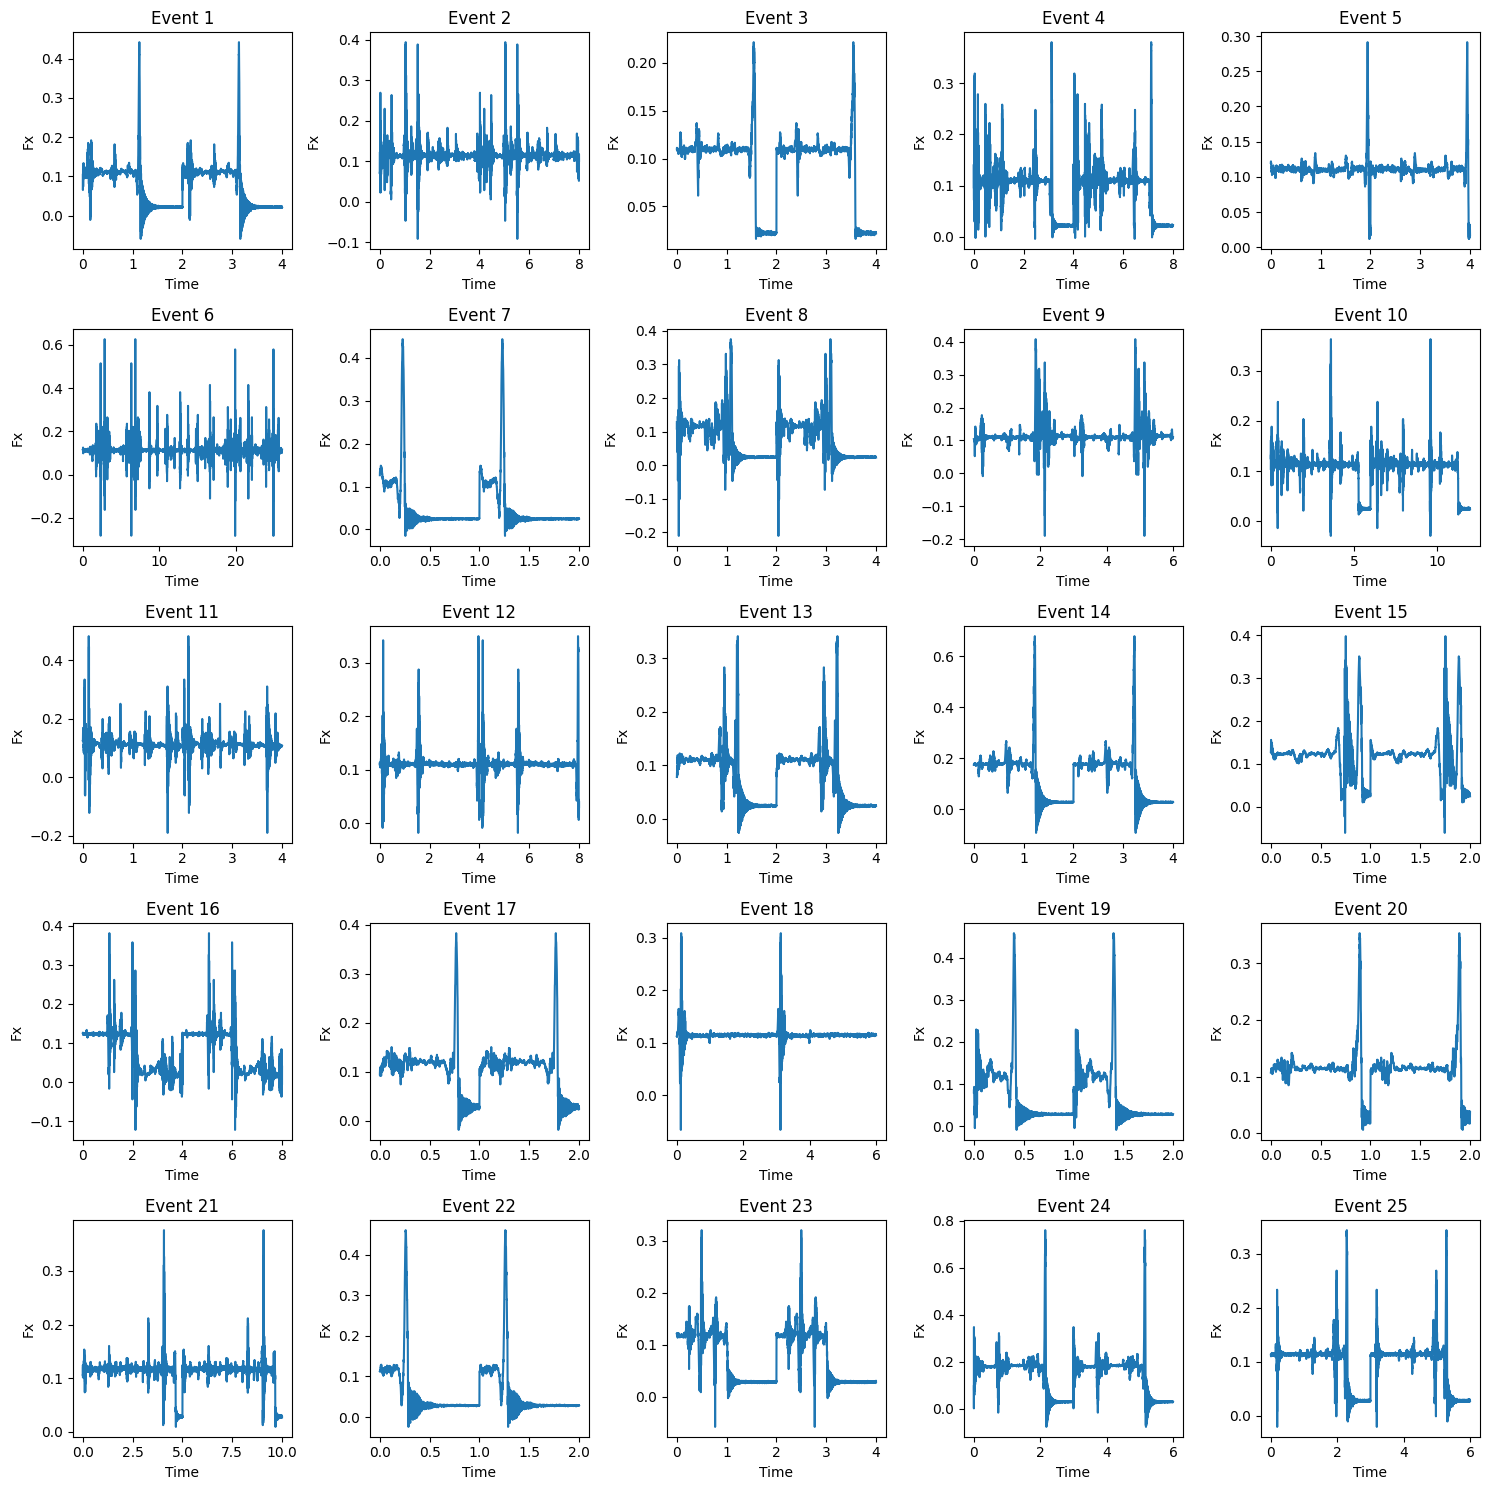

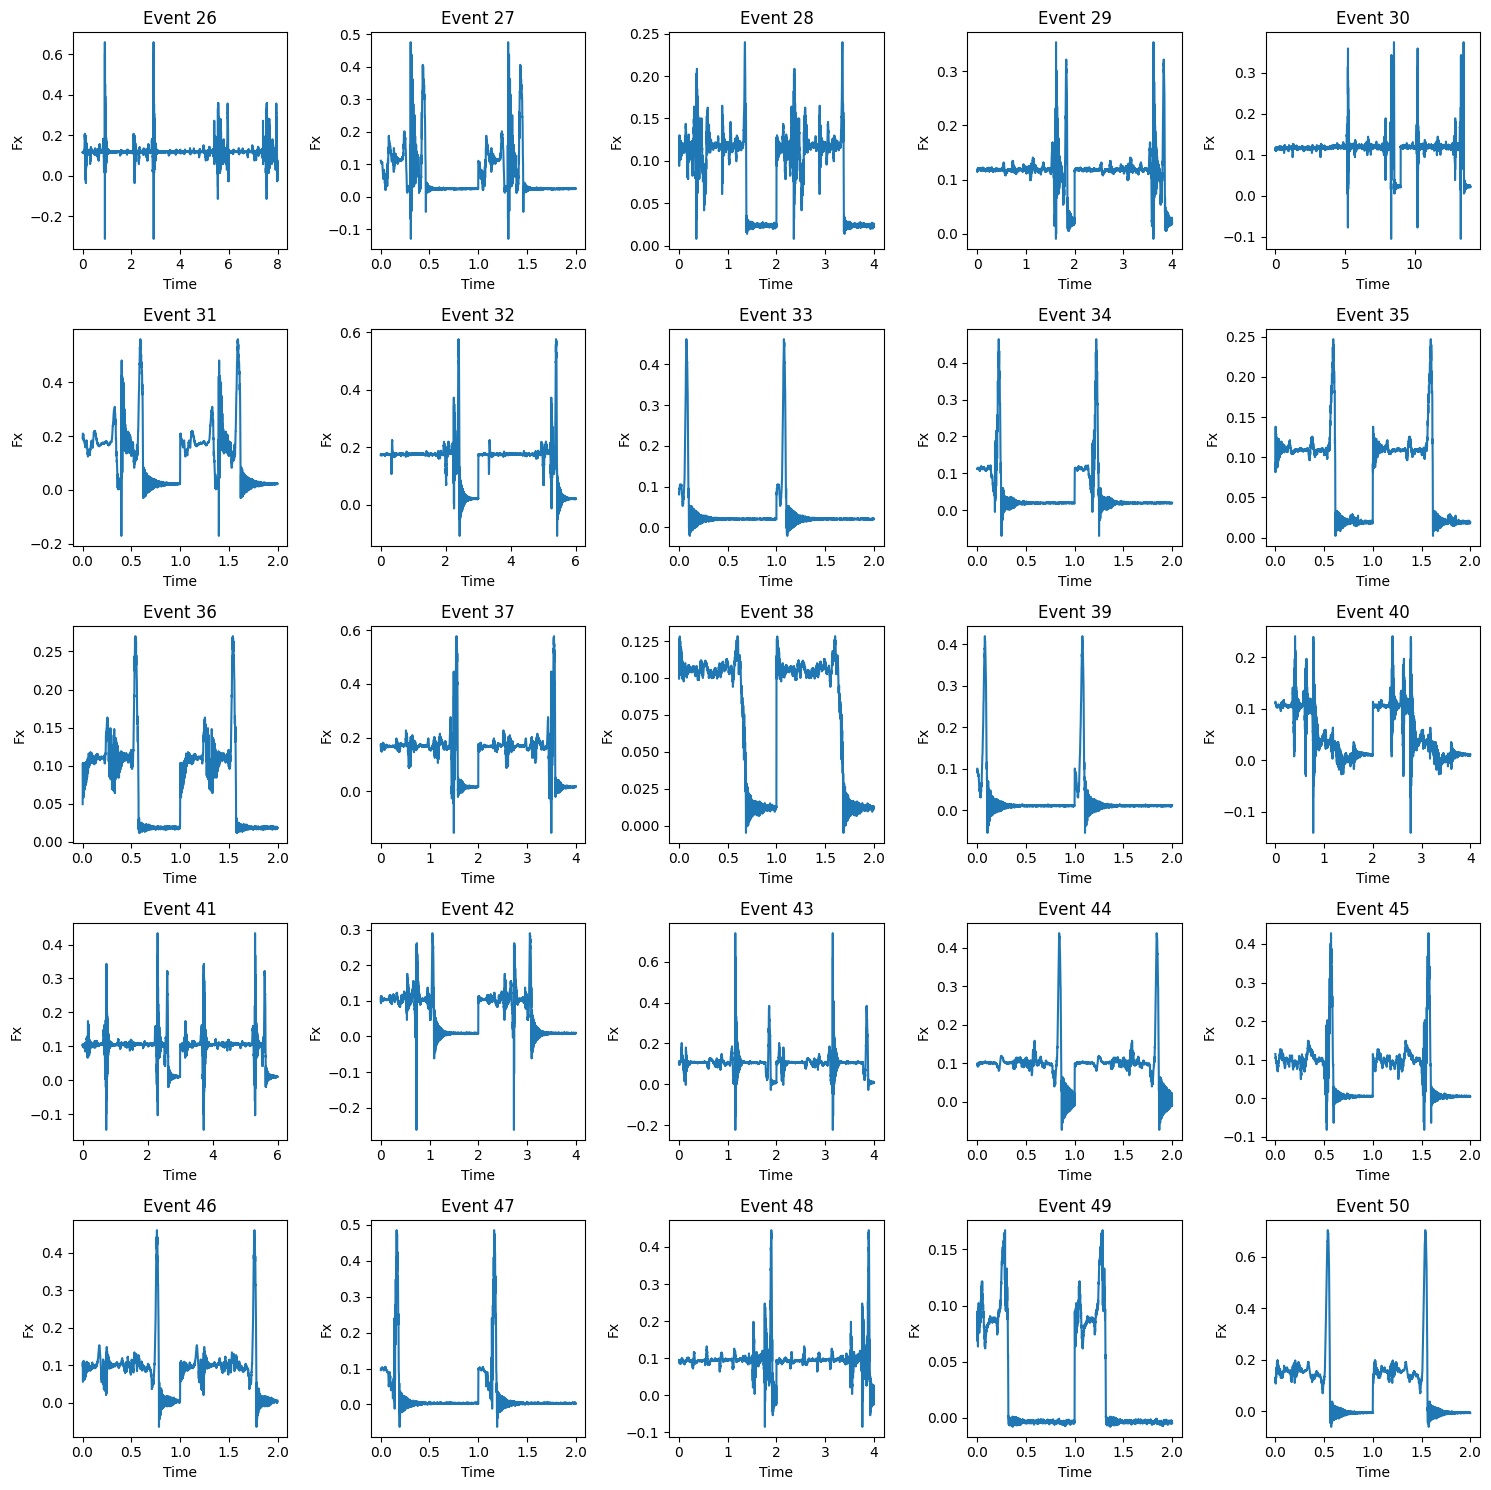

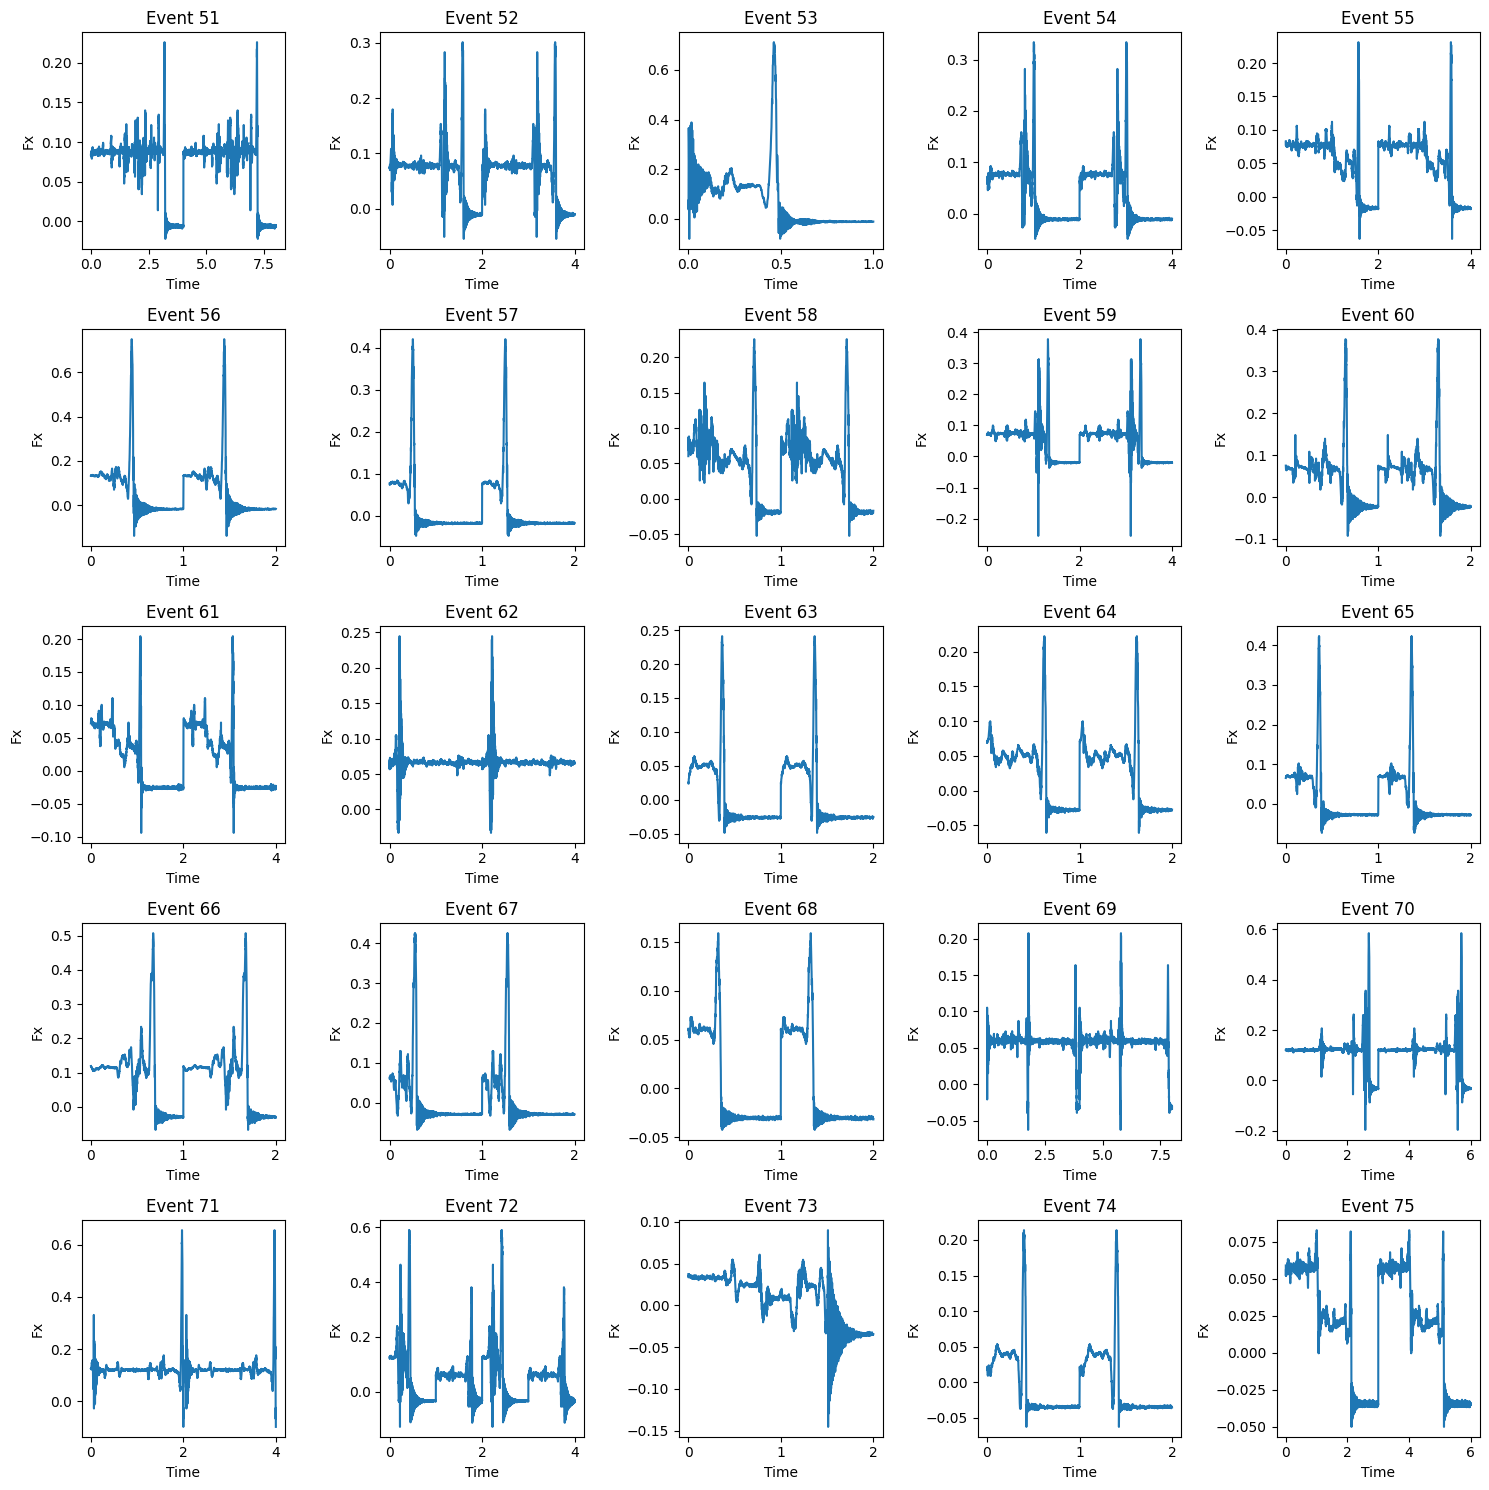

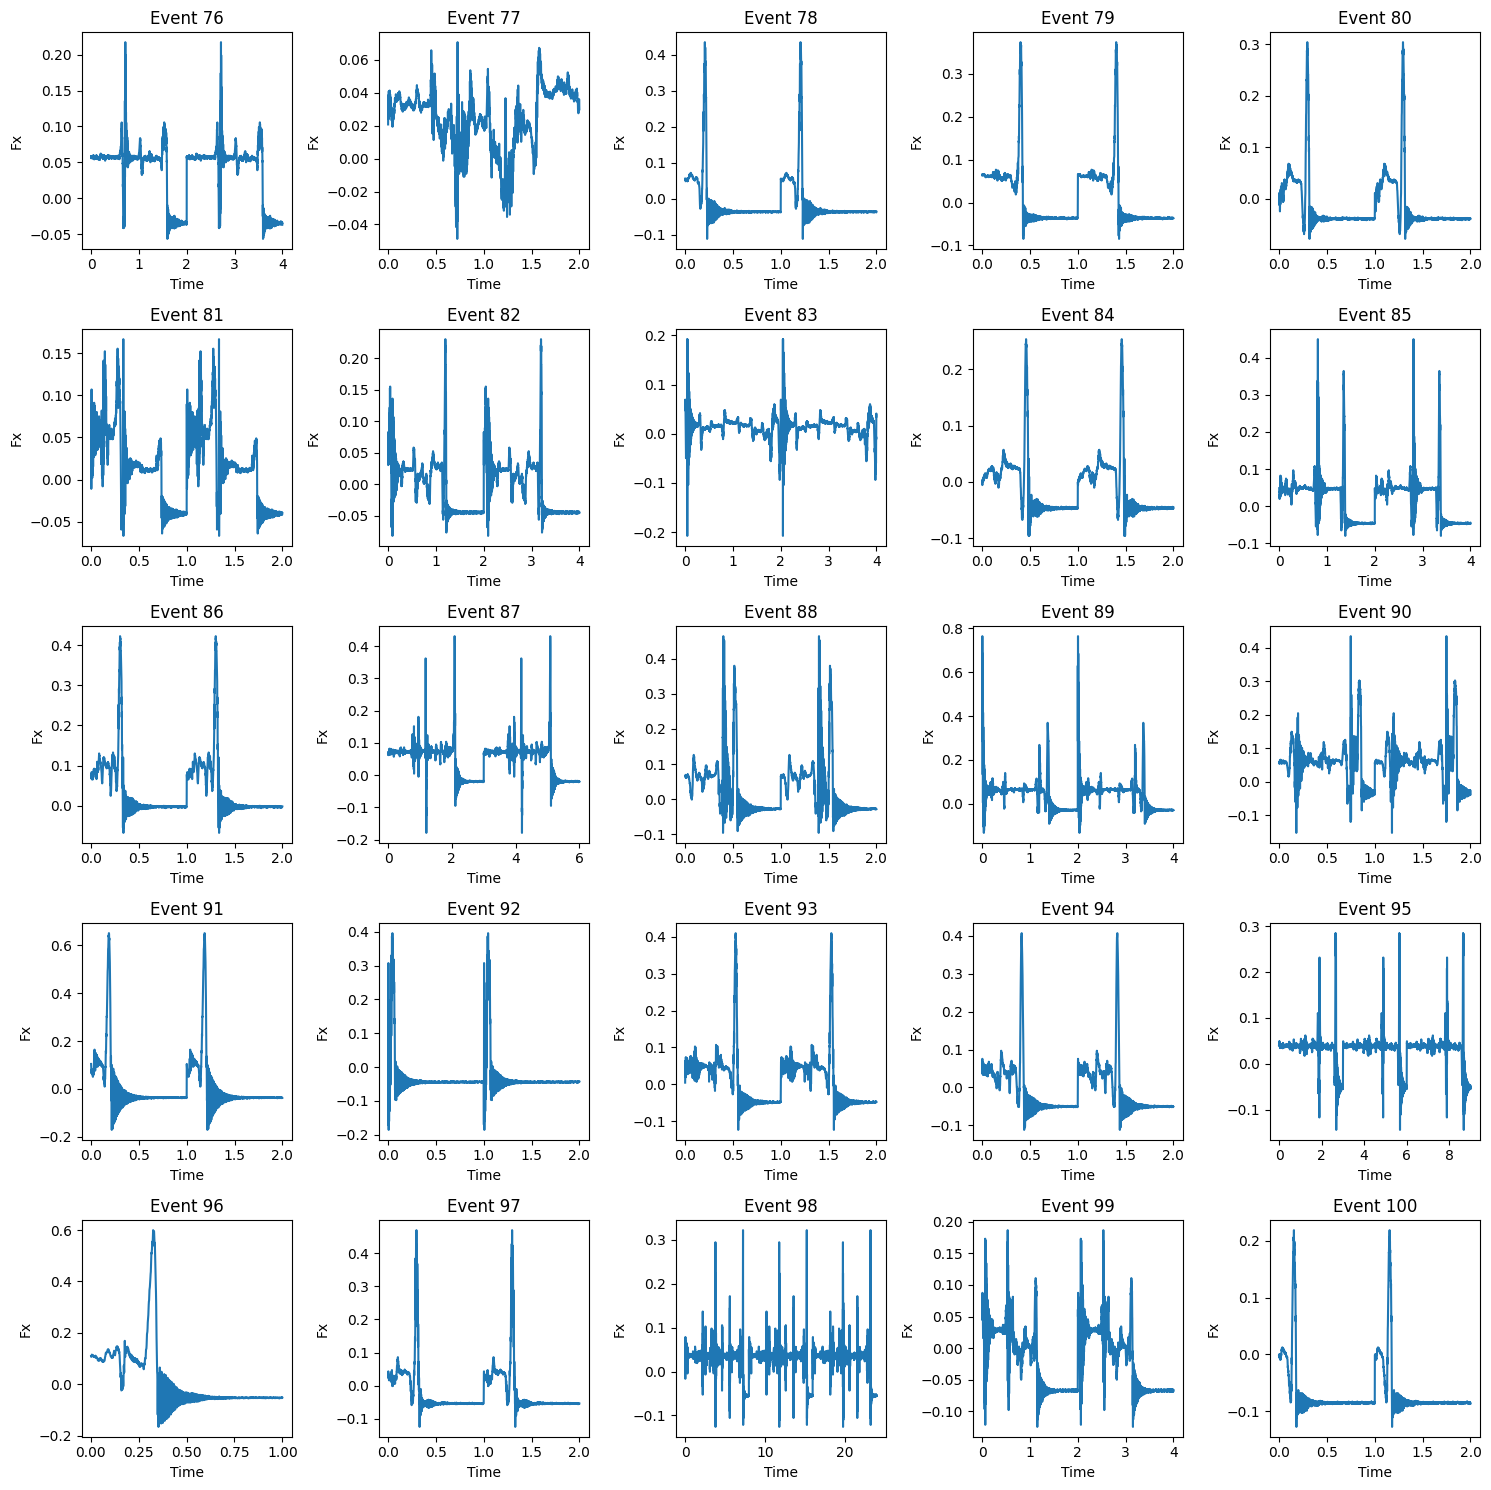

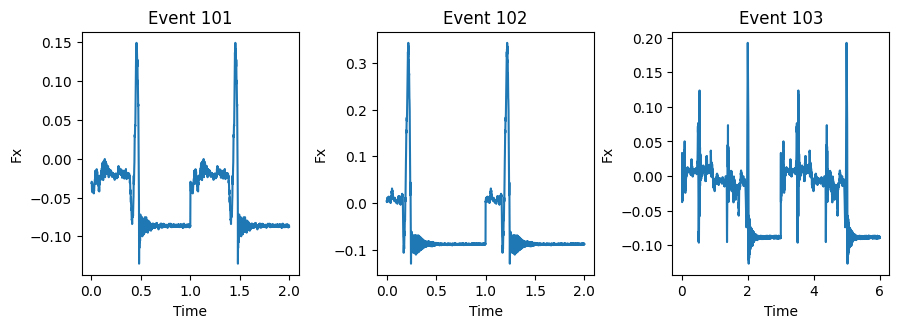

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

#see if the data is doubled as observed before

unique_events = F_all_day1_Feb13['event2'].unique()
num_events = len(unique_events)
cols = 5  # Number of columns in the grid
rows = 5  # Number of rows in the grid
grids = math.ceil(num_events / (rows * cols))  # Calculate the number of grids needed

for g in range(grids):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i in range(rows * cols):
        event_index = g * (rows * cols) + i
        if event_index < num_events:
            event = unique_events[event_index]
            event_data = F_all_day1_Feb13[F_all_day1_Feb13['event2'] == event]
            
            sns.lineplot(x='Time', y='Fx', data=event_data, ax=axes[i//cols, i%cols])
            axes[i//cols, i%cols].set_title(f'Event {event}')
        else:
            fig.delaxes(axes[i//cols, i%cols])  # Remove any empty subplots

    plt.tight_layout()
    plt.show()

### 4.2.a Zero-centering

In [28]:
import notebooks.force_defs as force_defs
importlib.reload(force_defs)

<module 'notebooks.force_defs' from 'c:\\Users\\kmh\\Documents\\shed-tits\\notebooks\\..\\notebooks\\force_defs.py'>

In [29]:
dummy_F_zero_centered = force_defs.zero_centering(dummy_F, endframe = 50)

  0%|          | 0/60 [00:00<?, ?it/s]

In [2]:
#F_all_day0 = pd.read_csv(r'D:\FTdata\F_all_day0.csv', index_col = 0 )
F_all_dayminus1 = pd.read_csv(r'D:\FTdata\F_all_dayminus1.csv', index_col = 0)

In [10]:
F_all_day0.head(7)

Unnamed: 0        Fx        Fy        Fz        Tx        Ty        Tz  \
0           0 -1.870222 -5.737000  1.386616 -0.040908 -0.028999 -0.000499   
1           1 -1.874636 -5.735134  1.384855 -0.041137 -0.029422 -0.000478   
2           2 -1.876605 -5.730647  1.383437 -0.041401 -0.029530 -0.000457   
3           3 -1.870464 -5.731841  1.384551 -0.041374 -0.029185 -0.000485   
4           4 -1.869198 -5.736343  1.382003 -0.041143 -0.028919 -0.000458   
5           5 -1.872003 -5.738018  1.386780 -0.041107 -0.029171 -0.000479   
6           6 -1.875444 -5.735685  1.385699 -0.041300 -0.029530 -0.000468   

              t                 datetime        RFID  event         day  \
0  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   
1  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   
2  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   
3  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   
4  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   
5  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   
6  3.816836e+09  2024-12-12 08:09:30.195  3B00185CB8     14  2024-12-12   

   event2  Frame   Time  
0       1      1  0.001  
1       1      2  0.002  
2       1      3  0.003  
3       1      4  0.004  
4       1      5  0.005  
5       1      6  0.006  
6       1      7  0.007

In [ ]:
day0_zero_centered = force_defs.zero_centering(F_all_day0, endframe = 50 ) #took 36 mins


  0%|          | 0/5189 [00:00<?, ?it/s]

In [ ]:
day1_zero_centered = force_defs.zero_centering(F_all_day1, endframe = 50 ) #took 27 mins 

  0%|          | 0/3637 [00:00<?, ?it/s]

In [ ]:
dayminus1_zero_centered = force_defs.zero_centering(F_all_dayminus1, endframe = 50 ) #took 45 mins 

  0%|          | 0/5556 [00:00<?, ?it/s]

### 4.2.b Halving

In [30]:
dummy_F_zeroed_halved = force_defs.halve_frame2(dummy_F_zero_centered)

In [ ]:
# Aim: per event, get the first half of the frames. 
day0_zeroed_halved = force_defs.halve_frame2(day0_zero_centered) #3m 45s

In [13]:
day0_zeroed_halved.to_csv(r'D:\FTdata\day0_zeroed_halved.csv')

In [ ]:
day1_zeroed_halved = force_defs.halve_frame2(day1_zero_centered) #8mins 2.1s

In [8]:
day1_zeroed_halved.to_csv(r'D:\FTdata\day1_zeroed_halved.csv')

In [ ]:
dayminus1_zeroed_halved = force_defs.halve_frame2(dayminus1_zero_centered) #8mins 2.1s

In [5]:
dayminus1_zeroed_halved.to_csv(r'D:\FTdata\dayminus1_zeroed_halved.csv')

### 4.2.c Butterworth filtering

In [36]:
butter_df_dummy = force_defs.apply_butterfilt(dummy_F_zeroed_halved, order=8, cutoff=45, calibration = False)
butter_df_dummy = force_defs.compute_Ftotal(butter_df_dummy)

  0%|          | 0/60 [00:00<?, ?it/s]

In [37]:
butter_df_dummy.head(3)

Fx        Fy        Fz        Tx        Ty        Tz             t  \
0  0.180996  0.090778  0.013989 -0.007965  0.012374  0.000680  3.832497e+09   
1  0.183110  0.090774  0.014791 -0.008001  0.012360  0.000680  3.832497e+09   
2  0.182378  0.091263  0.013213 -0.008031  0.012402  0.000672  3.832497e+09   

   day_since  scare_outcome  event  ... event2 Frame   Time   Fx_filt  \
0         -1              0      1  ...      1     1  0.001  0.180928   
1         -1              0      1  ...      1     2  0.002  0.181523   
2         -1              0      1  ...      1     3  0.003  0.182110   

    Fy_filt   Fz_filt   Tx_filt   Ty_filt   Tz_filt  Ftotal_filt  
0  0.090701  0.013979 -0.007964  0.012371  0.000681     0.202872  
1  0.091150  0.013833 -0.007997  0.012388  0.000680     0.203594  
2  0.091593  0.013689 -0.008029  0.012406  0.000680     0.204305  

[3 rows x 24 columns]

In [38]:
butter_df_dummy.to_csv('../data/butter_df_dummy.csv')

In [9]:
day0_zeroed_halved = pd.read_csv(r'D:\FTdata\day0_zeroed_halved.csv', index_col = 0)

In [ ]:
#run cell per once. 
butter_df_day0 = force_defs.apply_butterfilt(day0_zeroed_halved, order=8, cutoff=45, calibration=False)
butter_df_day0 = force_defs.compute_Ftotal(butter_df_day0)

  0%|          | 0/5201 [00:00<?, ?it/s]

In [11]:
butter_df_day0.to_csv(r'D:\FTdata\butter_df_day0.csv')

In [12]:
day1_zeroed_halved = pd.read_csv(r'D:\FTdata\day1_zeroed_halved.csv')

In [ ]:
butter_df_day1 = force_defs.apply_butterfilt(day1_zeroed_halved, order=8, cutoff=45, calibration=False)
butter_df_day1 = force_defs.compute_Ftotal(butter_df_day1)

  0%|          | 0/3651 [00:00<?, ?it/s]

In [14]:
butter_df_day1.to_csv(r'D:\FTdata\butter_df_day1.csv')

In [ ]:
butter_df_dayminus1 = force_defs.apply_butterfilt(dayminus1_zeroed_halved, order=8, cutoff=45, calibration = False)
butter_df_dayminus1 = force_defs.compute_Ftotal(butter_df_dayminus1)

  0%|          | 0/5573 [00:00<?, ?it/s]

In [7]:
butter_df_dayminus1.to_csv(r'D:\FTdata\butter_df_dayminus1.csv')

In [15]:
butter_df_day0['day'].unique()

array(['2024-12-23', '2025-01-30', '2025-01-24', '2025-02-06',
       '2025-02-12', '2025-02-19', '2025-02-16', '2025-01-21',
       '2025-01-03', '2024-12-12', '2024-12-15', '2024-12-31'],
      dtype=object)

In [17]:
butter_df_day1.head(3)


Unnamed: 0.1  Unnamed: 0        Fx        Fy        Fz        Tx        Ty  \
0       5382404       88000  0.096341  0.028341 -0.005045 -0.003014  0.010367   
1       5382405       88001  0.087686  0.023039 -0.006245 -0.003097  0.010010   
2       5382406       88002  0.088283  0.022248 -0.005892 -0.002937  0.009795   

         Tz             t                 datetime  ... event2  Frame   Time  \
0  0.000546  3.821158e+09  2025-01-31 08:48:05.043  ...     21      1  0.001   
1  0.000555  3.821158e+09  2025-01-31 08:48:05.043  ...     21      2  0.002   
2  0.000525  3.821158e+09  2025-01-31 08:48:05.043  ...     21      3  0.003   

    Fx_filt   Fy_filt   Fz_filt   Tx_filt   Ty_filt   Tz_filt  Ftotal_filt  
0  0.095789  0.027777 -0.004918 -0.002939  0.010316  0.000533     0.099856  
1  0.093338  0.026699 -0.004764 -0.002914  0.010110  0.000531     0.097199  
2  0.090973  0.025708 -0.004619 -0.002896  0.009911  0.000531     0.094649  

[3 rows x 23 columns]

### 4.3 filtered graph

In [ ]:
butter_df = pd.read_csv('butter_df_final.csv', index = False)

In [5]:
# Filter rows by matching the 'day' column with the specific date
butter_df_Jan22_E1 = butter_df[butter_df['RFID'] == "011016B2E1"]

# Count the number of unique values in the 'event2' column
print(butter_df_Jan22_E1['event2'].nunique())

print(butter_df_Jan22_E1.head(5))

86
   Unnamed: 0        Fx        Fy        Fz        Tx        Ty        Tz  \
0       88000  0.096341  0.028341 -0.005045 -0.003014  0.010367  0.000546   
1       88001  0.087686  0.023039 -0.006245 -0.003097  0.010010  0.000555   
2       88002  0.088283  0.022248 -0.005892 -0.002937  0.009795  0.000525   
3       88003  0.088953  0.022999 -0.006591 -0.002793  0.009811  0.000572   
4       88004  0.089678  0.020832 -0.003680 -0.002824  0.009853  0.000543   

              t                 datetime        RFID  ...  event2 Frame  \
0  3.821158e+09  2025-01-31 08:48:05.043  011016B2E1  ...      21     1   
1  3.821158e+09  2025-01-31 08:48:05.043  011016B2E1  ...      21     2   
2  3.821158e+09  2025-01-31 08:48:05.043  011016B2E1  ...      21     3   
3  3.821158e+09  2025-01-31 08:48:05.043  011016B2E1  ...      21     4   
4  3.821158e+09  2025-01-31 08:48:05.043  011016B2E1  ...      21     5   

    Time   Fx_filt   Fy_filt   Fz_filt   Tx_filt   Ty_filt   Tz_filt  \
0  0.001  0

#### dummy - Ftot

In [41]:
butter_df_dummy

Fx        Fy        Fz        Tx        Ty        Tz  \
0      0.180996  0.090778  0.013989 -0.007965  0.012374  0.000680   
1      0.183110  0.090774  0.014791 -0.008001  0.012360  0.000680   
2      0.182378  0.091263  0.013213 -0.008031  0.012402  0.000672   
3      0.183590  0.094397  0.016219 -0.008071  0.012403  0.000652   
4      0.183563  0.091649  0.014663 -0.008112  0.012433  0.000662   
...         ...       ...       ...       ...       ...       ...   
32495  0.521009 -0.394834 -0.009943  0.063142  0.061092 -0.000422   
32496  0.503166 -0.379368 -0.013208  0.060439  0.059065 -0.000356   
32497  0.485750 -0.362543 -0.017233  0.057711  0.057042 -0.000336   
32498  0.468353 -0.344298 -0.017424  0.054898  0.054934 -0.000336   
32499  0.451337 -0.325879 -0.021220  0.052011  0.052746 -0.000277   

                  t  day_since  scare_outcome  event  ... event2 Frame   Time  \
0      3.832497e+09         -1              0      1  ...      1     1  0.001   
1      3.832497e+09         -1              0      1  ...      1     2  0.002   
2      3.832497e+09         -1              0      1  ...      1     3  0.003   
3      3.832497e+09         -1              0      1  ...      1     4  0.004   
4      3.832497e+09         -1              0      1  ...      1     5  0.005   
...             ...        ...            ...    ...  ...    ...   ...    ...   
32495  3.832500e+09          1              0      9  ...     60   496  0.496   
32496  3.832500e+09          1              0      9  ...     60   497  0.497   
32497  3.832500e+09          1              0      9  ...     60   498  0.498   
32498  3.832500e+09          1              0      9  ...     60   499  0.499   
32499  3.832500e+09          1              0      9  ...     60   500  0.500   

        Fx_filt   Fy_filt   Fz_filt   Tx_filt   Ty_filt   Tz_filt  Ftotal_filt  
0      0.180928  0.090701  0.013979 -0.007964  0.012371  0.000681     0.202872  
1      0.181523  0.091150  0.013833 -0.007997  0.012388  0.000680     0.203594  
2      0.182110  0.091593  0.013689 -0.008029  0.012406  0.000680     0.204305  
3      0.182676  0.092024  0.013544 -0.008060  0.012424  0.000680     0.204994  
4      0.183209  0.092440  0.013398 -0.008090  0.012441  0.000679     0.205646  
...         ...       ...       ...       ...       ...       ...          ...  
32495  0.513317 -0.387181 -0.011106  0.061939  0.060192 -0.000370     0.643060  
32496  0.495249 -0.369087 -0.014220  0.059001  0.058028 -0.000344     0.617818  
32497  0.477281 -0.351162 -0.017268  0.056093  0.055874 -0.000317     0.592798  
32498  0.459711 -0.333676 -0.020209  0.053259  0.053766 -0.000291     0.568404  
32499  0.442851 -0.316918 -0.023000  0.050544  0.051742 -0.000265     0.545053  

[32500 rows x 24 columns]

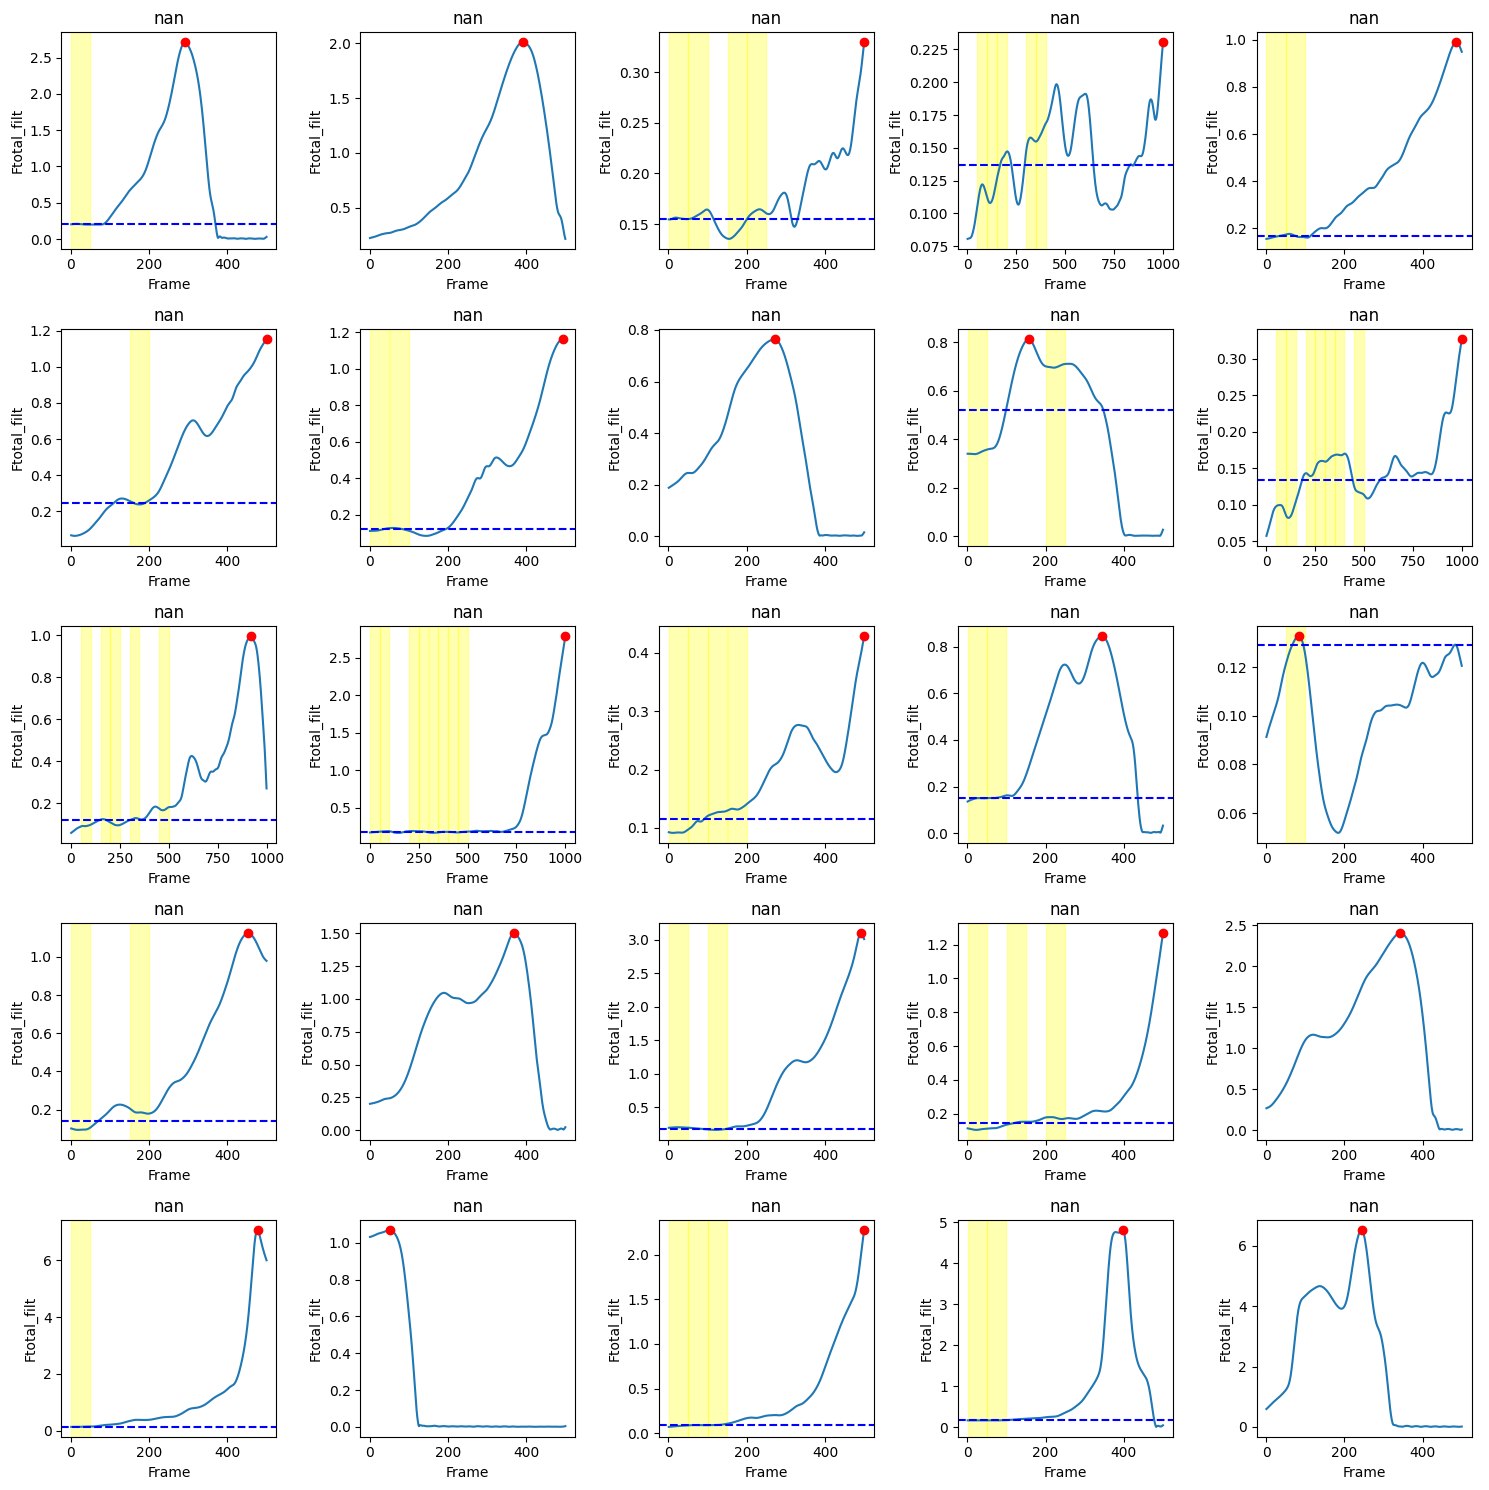

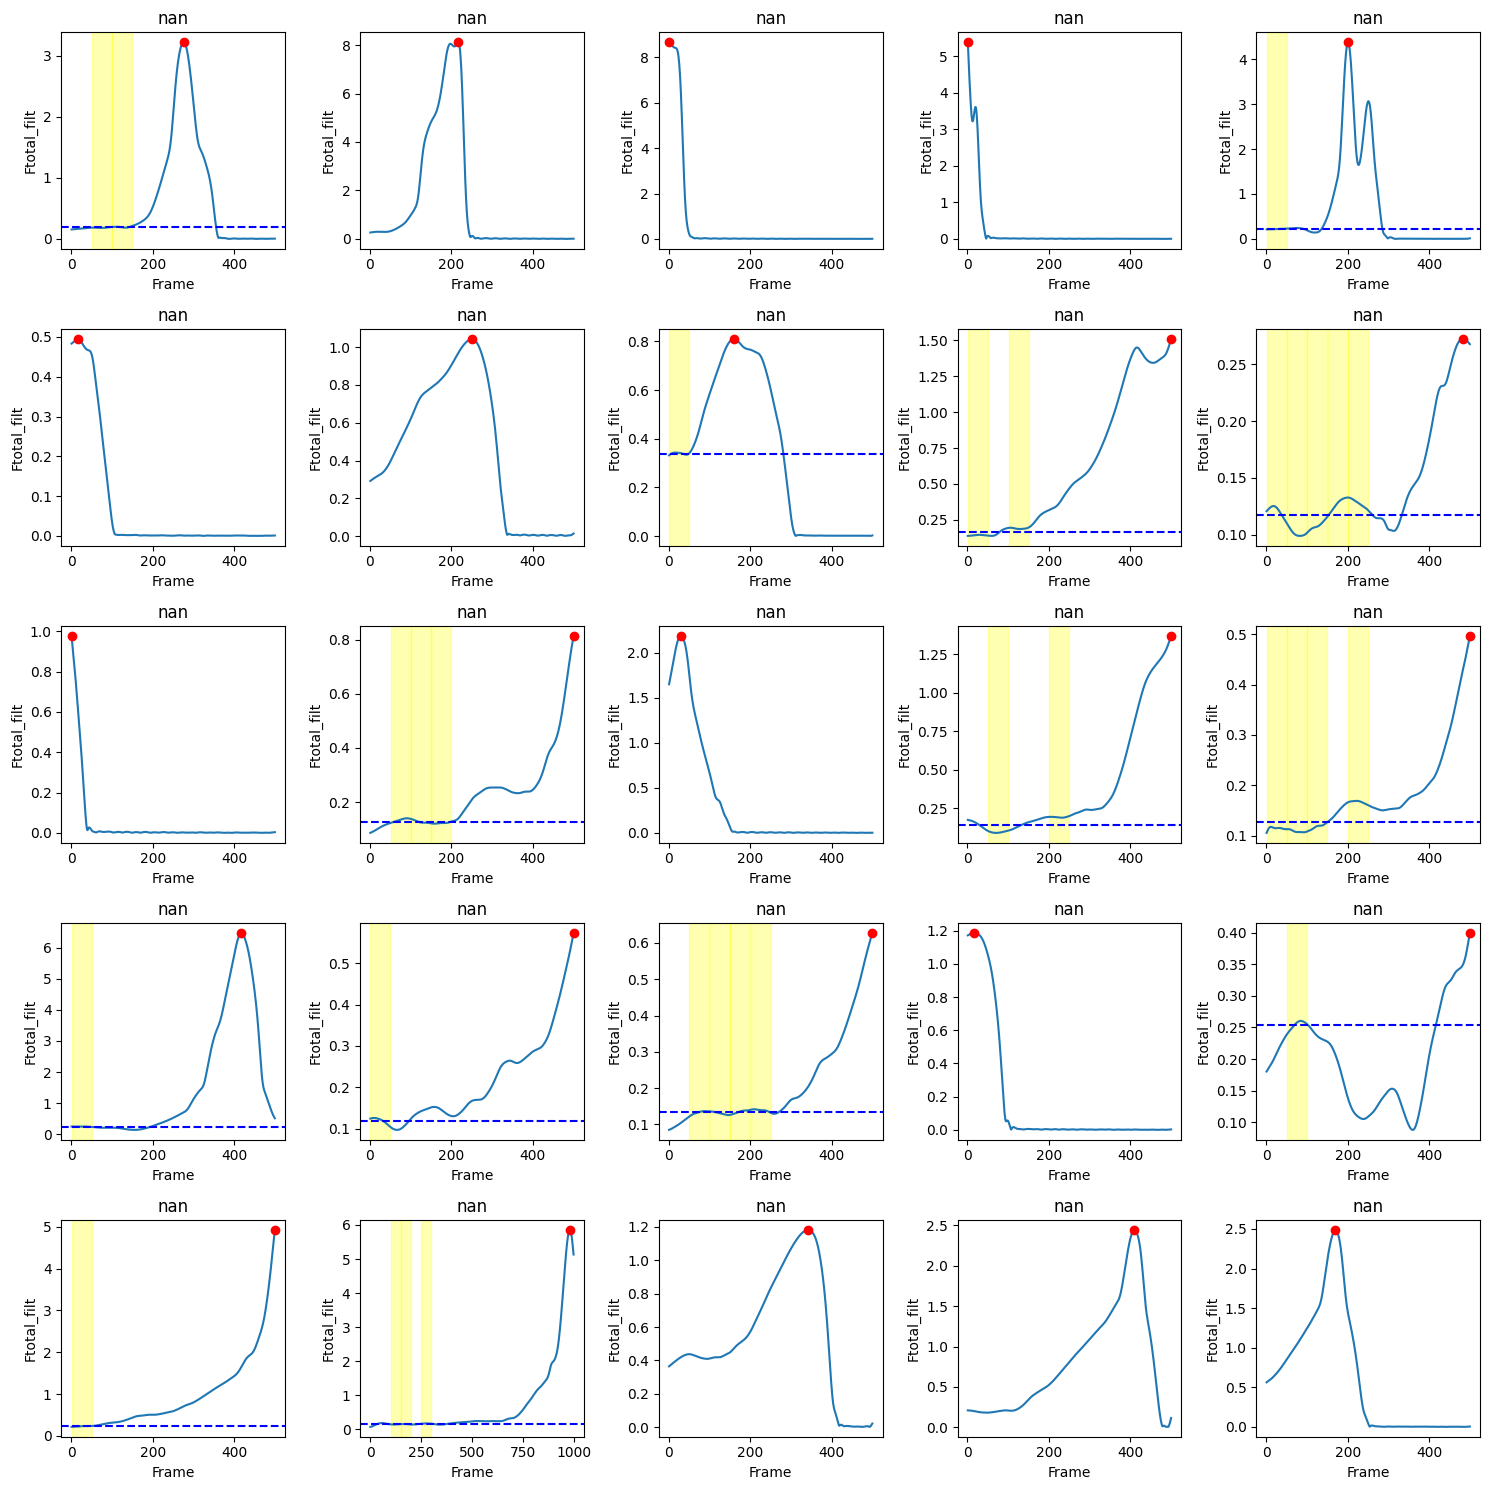

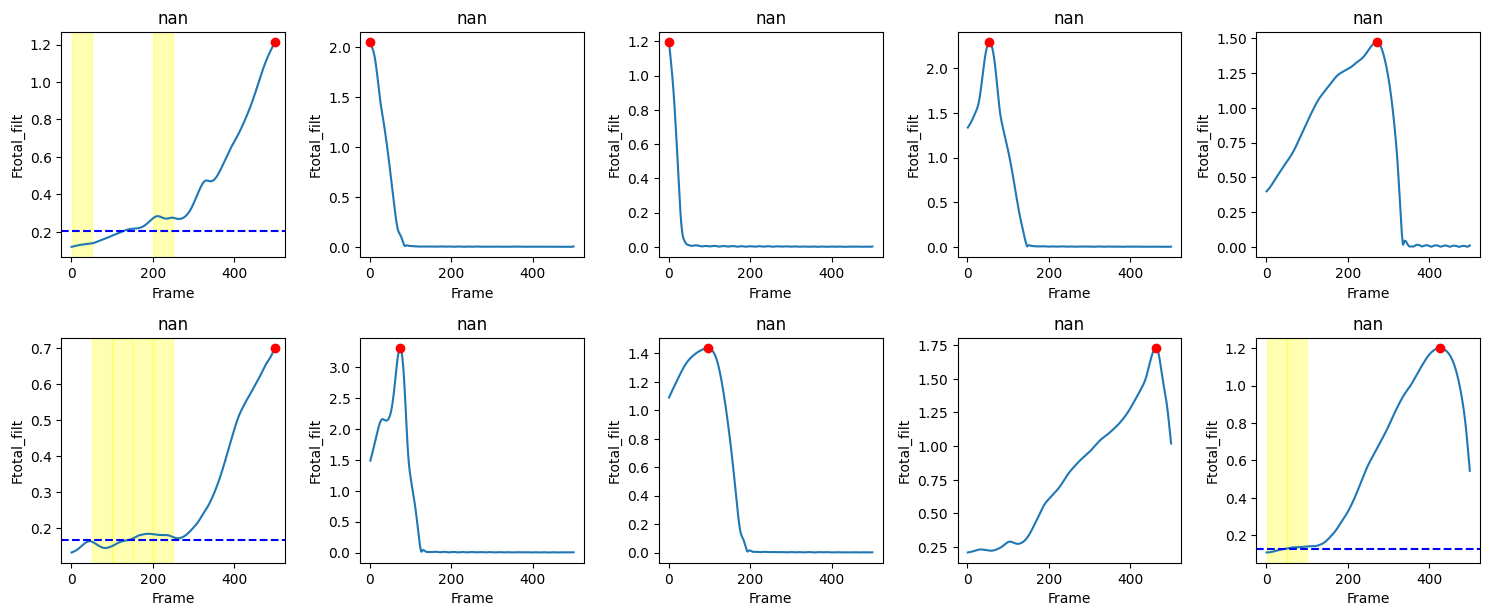

In [44]:
unique_events =butter_df_dummy['event2'].unique()
num_events = len(unique_events)
cols = 5  # Number of columns in the grid
rows = 5  # Number of rows in the grid
grids = math.ceil(num_events / (rows * cols))  # Calculate the number of grids needed

for g in range(grids):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i in range(rows * cols):
        event_index = g * (rows * cols) + i
        if event_index < num_events:
            event = unique_events[event_index]
            event_data = butter_df_dummy[butter_df_dummy['event2'] == event].reset_index(drop = True)
            event_data_bw_frames, event_data_bw = force_defs.detect_bw_Ftot(event_data, var_threshold=0.00005, frame_length=50)
            
            sns.lineplot(x='Frame', y='Ftotal_filt', data=event_data, ax=axes[i//cols, i%cols])
            for start, end in event_data_bw_frames: #halved and variation threshold put 
                #print(f"Start: {start}, End: {end}, Length: {len(event_data)}")  # Debugging print statement
                axes[i//cols, i%cols].axvspan(event_data['Frame'].iloc[start], event_data['Frame'].iloc[end], color='yellow', alpha=0.3, label='bodyweight(N)' if start == event_data_bw_frames[0][0] else "")
            #mark the max force point in red dot 
            maxforce_index = event_data['Ftotal_filt'].idxmax()
            maxforce_frame = event_data.loc[maxforce_index, 'Frame']
            maxforce_value = event_data.loc[maxforce_index, 'Ftotal_filt']
            axes[i//cols, i%cols].plot(maxforce_frame, maxforce_value, 'ro')  # 'ro' for red dot

            # Mark the bodyweight as a dashed line if it is nont NaN
            bodyweight_value = event_data_bw  # Assuming bodyweight is constant
            if not np.isnan(bodyweight_value):
                axes[i//cols, i%cols].axhline(bodyweight_value, color='blue', linestyle='--', label='Bodyweight')
            
            # Set the title to the RFID of the event_data
            rfid = event_data['RFID'].iloc[0] 
            axes[i//cols, i%cols].set_title(f'{rfid}')
        else:
            fig.delaxes(axes[i//cols, i%cols])  # Remove any empty subplots
    
    #fig.suptitle('Ftotal', fontsize=20)

    plt.tight_layout()
    plt.show()

#### Fx

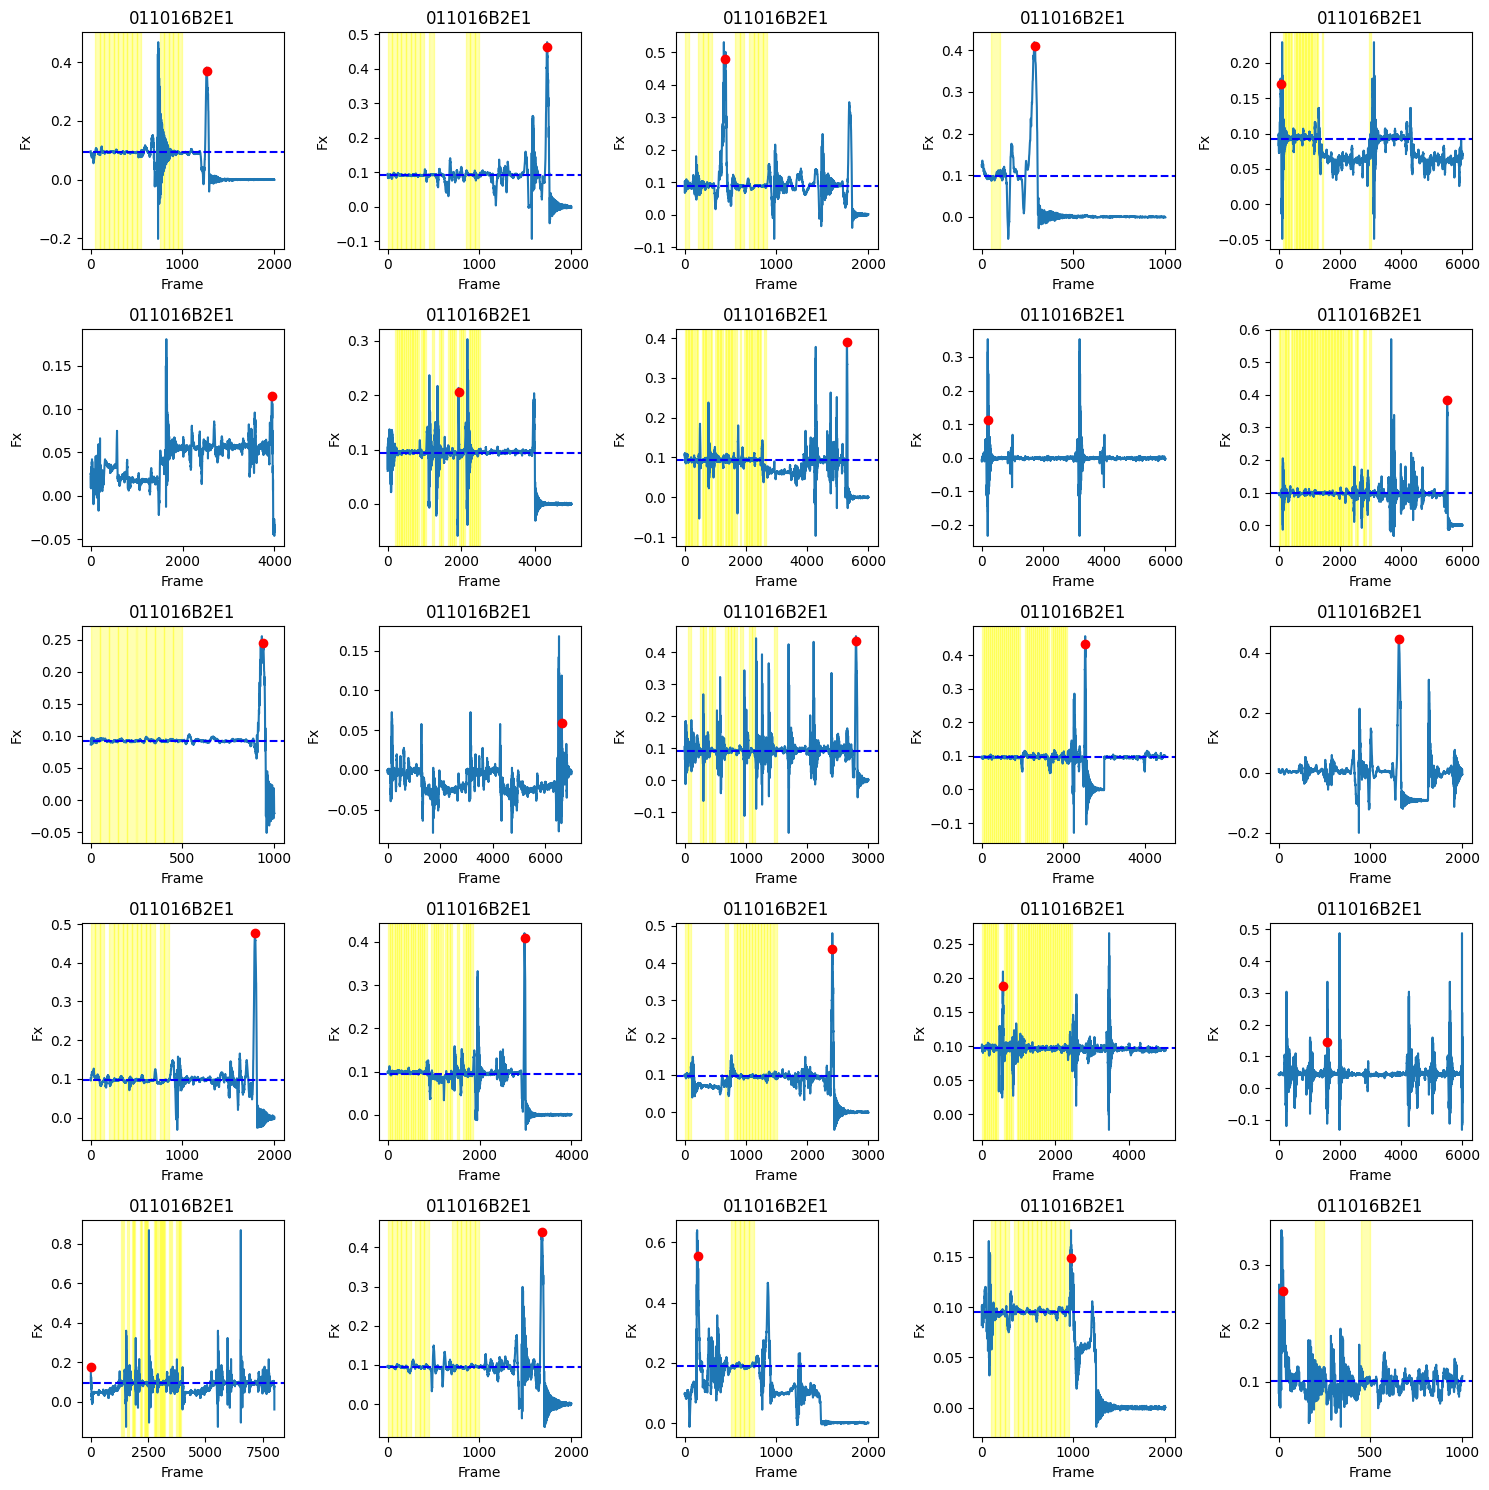

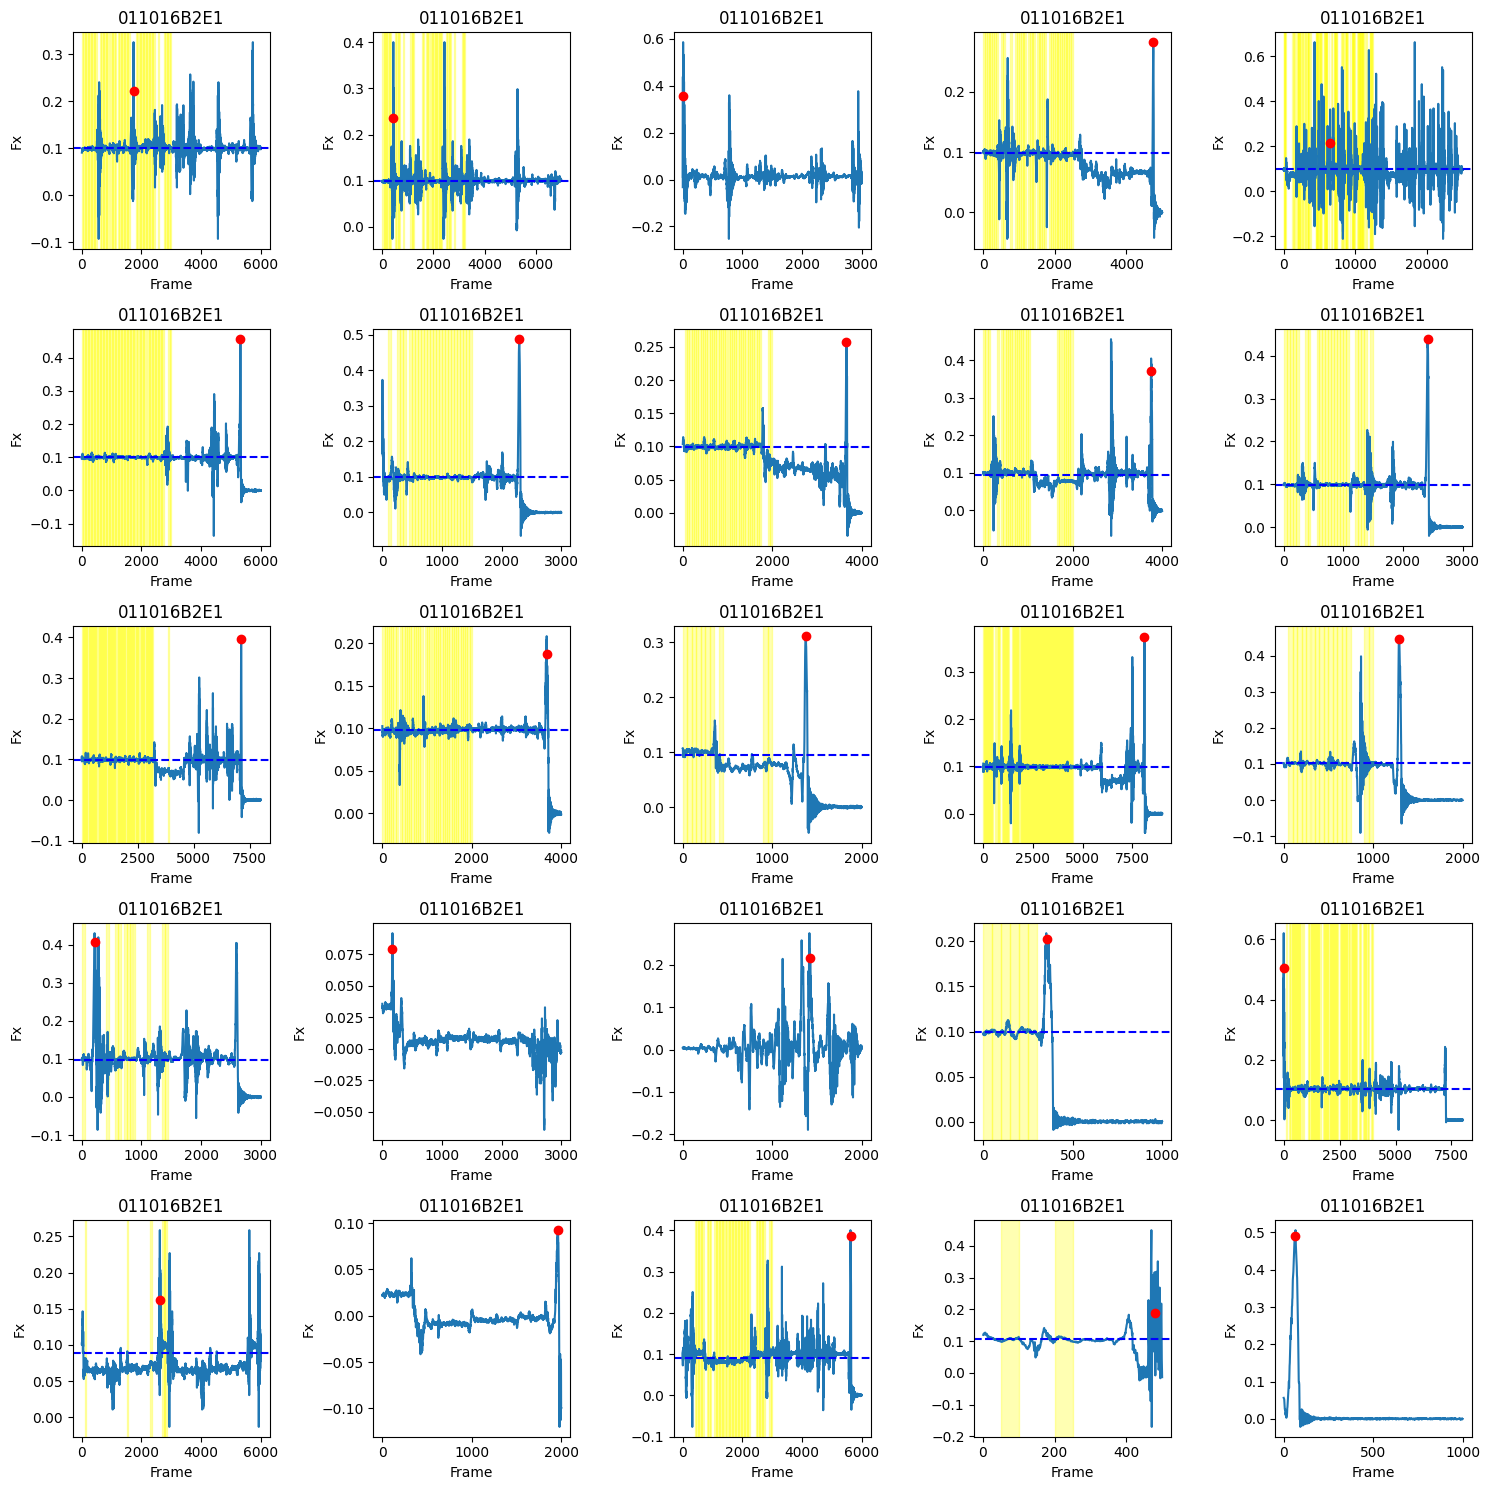

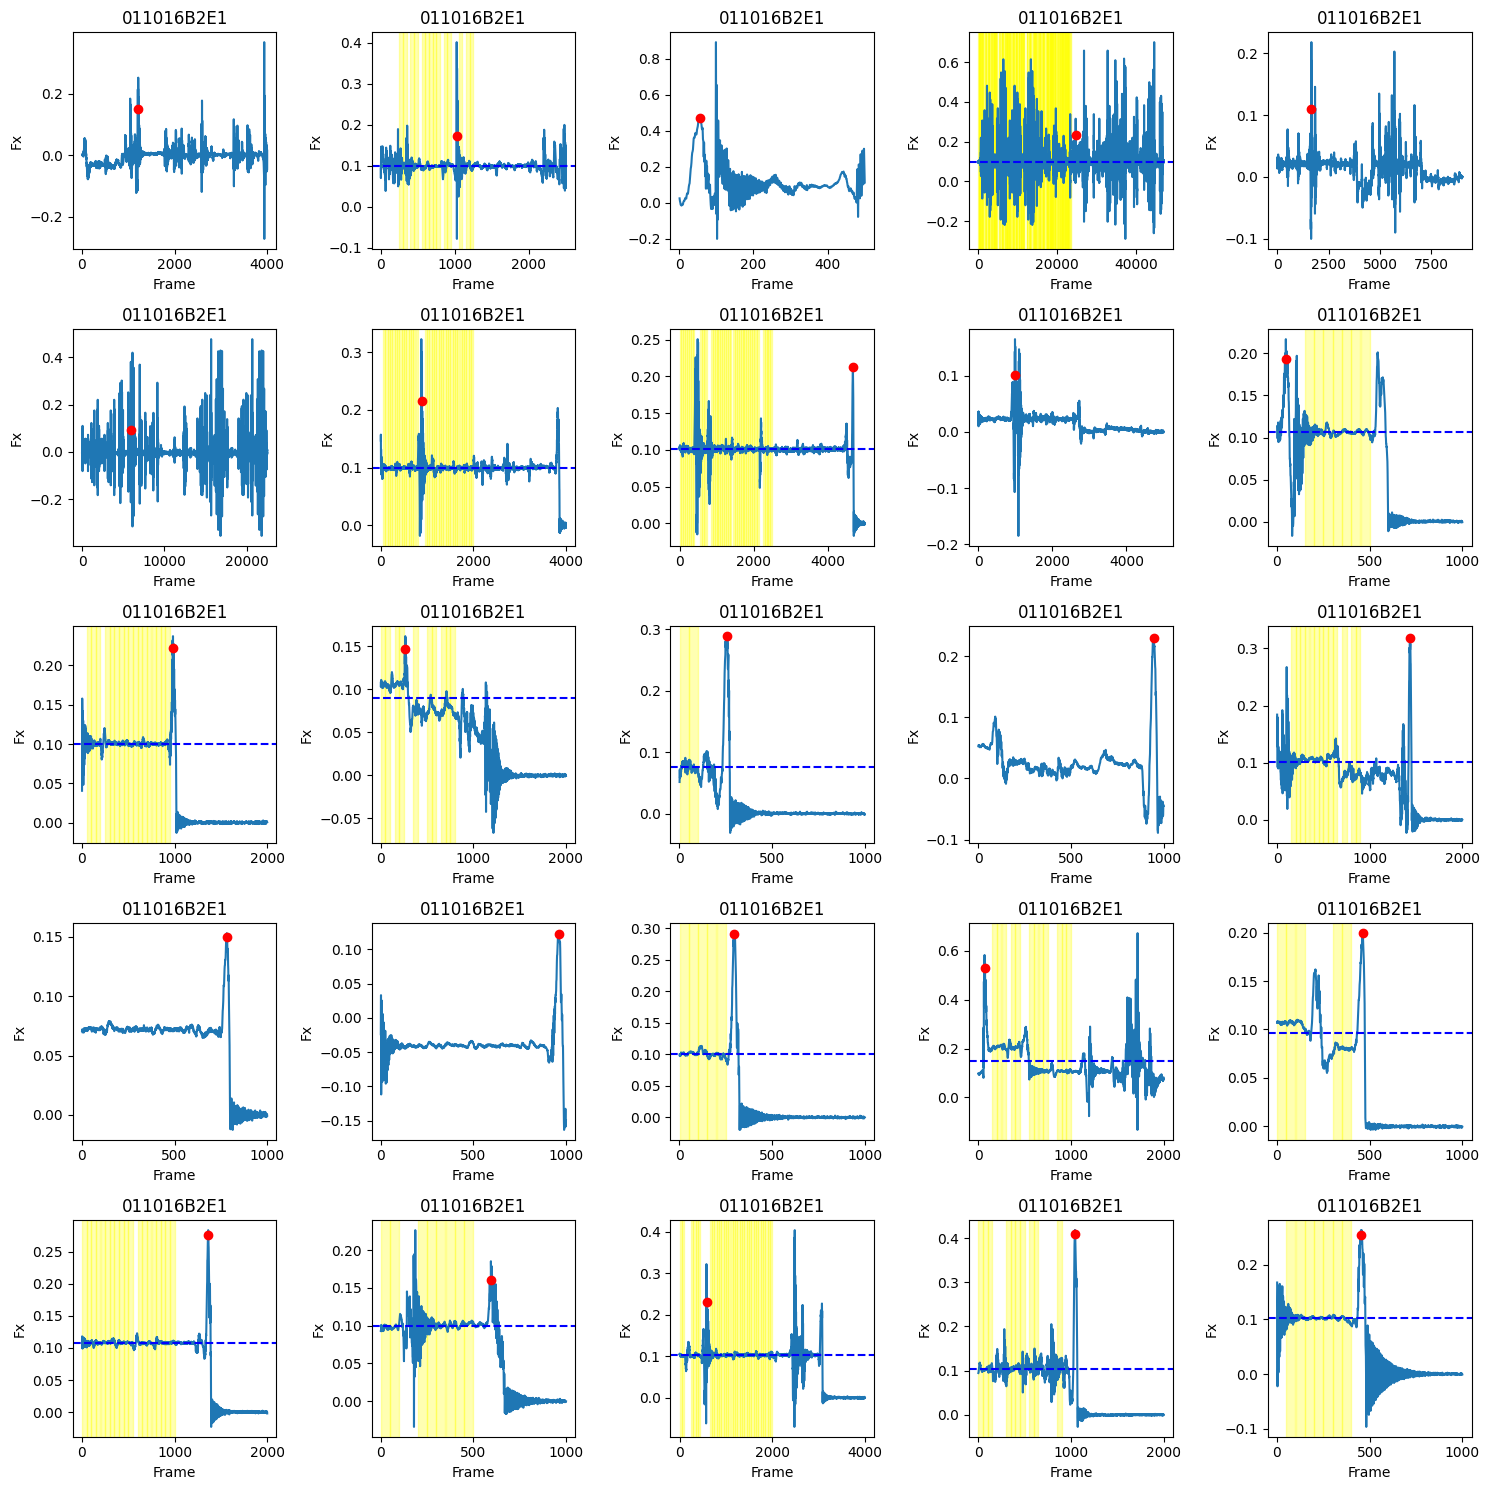

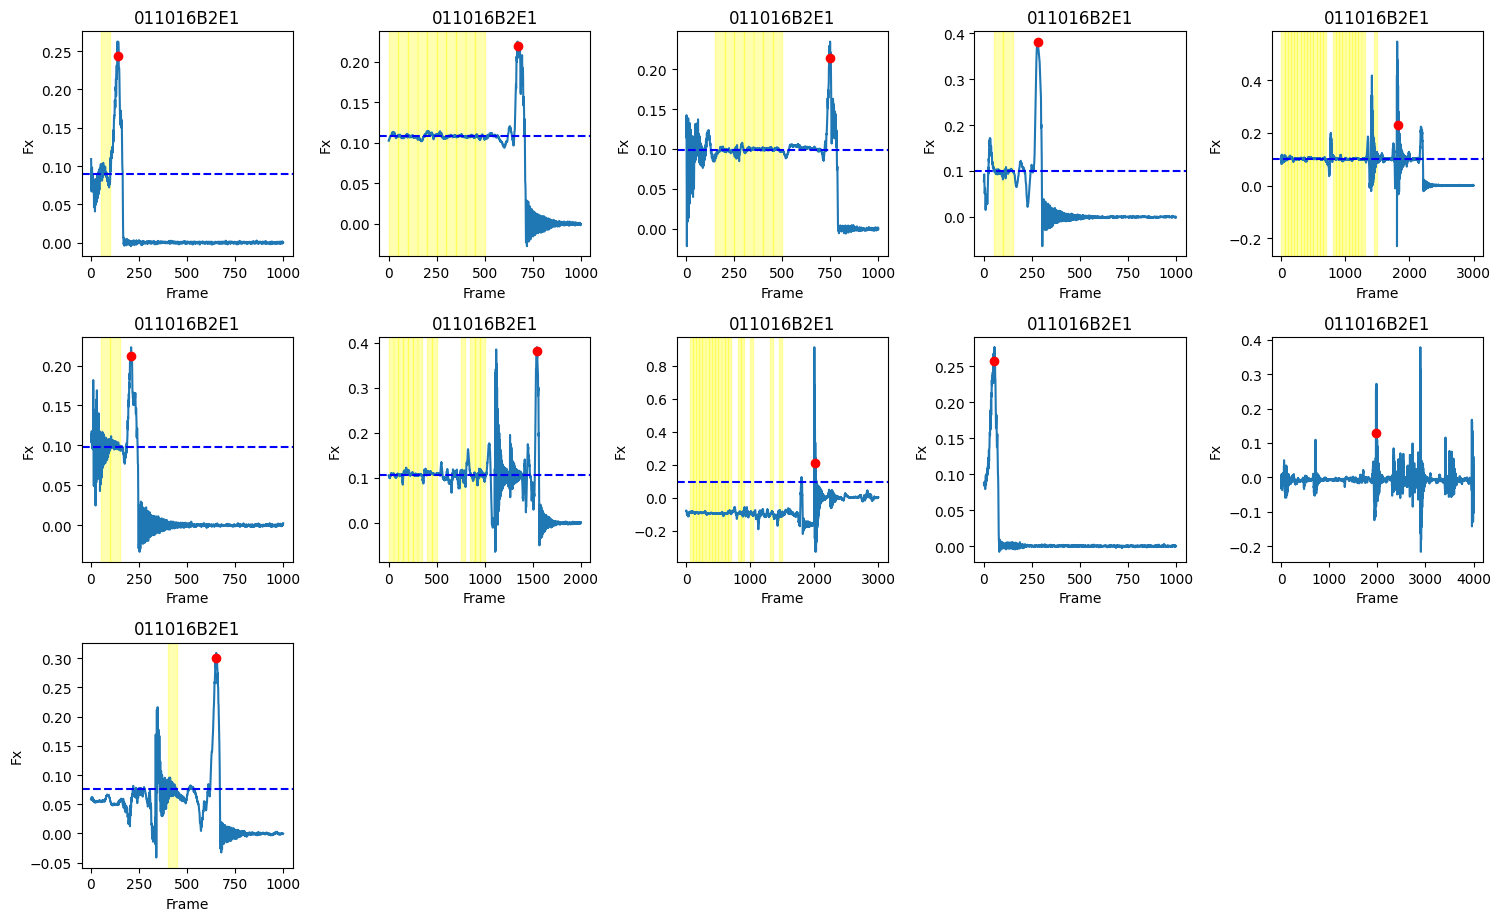

In [ ]:

unique_events = butter_df_Jan22_E1['event2'].unique()
num_events = len(unique_events)
cols = 5  # Number of columns in the grid
rows = 5  # Number of rows in the grid
grids = math.ceil(num_events / (rows * cols))  # Calculate the number of grids needed

for g in range(grids):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i in range(rows * cols):
        event_index = g * (rows * cols) + i
        if event_index < num_events:
            event = unique_events[event_index]
            event_data = butter_df_Jan22_E1[butter_df_Jan22_E1['event2'] == event].reset_index(drop = True)
            event_data_bw_frames, event_data_bw = force_defs.detect_bw_Ftot(event_data, var_threshold=0.00005, frame_length=50)
            
            sns.lineplot(x='Frame', y='Fx', data=event_data, ax=axes[i//cols, i%cols])
            for start, end in event_data_bw_frames: #halved and variation threshold put 
                #print(f"Start: {start}, End: {end}, Length: {len(event_data)}")  # Debugging print statement
                axes[i//cols, i%cols].axvspan(event_data['Frame'].iloc[start], event_data['Frame'].iloc[end], color='yellow', alpha=0.3, label='bodyweight(N)' if start == event_data_bw_frames[0][0] else "")
            #mark the max force point in red dot 
            maxforce_index = event_data['Fx_filt'].idxmax()
            maxforce_frame = event_data.loc[maxforce_index, 'Frame']
            maxforce_value = event_data.loc[maxforce_index, 'Fx_filt']
            axes[i//cols, i%cols].plot(maxforce_frame, maxforce_value, 'ro')  # 'ro' for red dot

            # Mark the bodyweight as a dashed line if it is nont NaN
            bodyweight_value = event_data_bw  # Assuming bodyweight is constant
            if not np.isnan(bodyweight_value):
                axes[i//cols, i%cols].axhline(bodyweight_value, color='blue', linestyle='--', label='Bodyweight')
            
            # Set the title to the RFID of the event_data
            rfid = event_data['RFID'].iloc[0] 
            axes[i//cols, i%cols].set_title(f'{rfid}')
        else:
            fig.delaxes(axes[i//cols, i%cols])  # Remove any empty subplots
    
    #fig.suptitle('Ftot', fontsize=20)

    plt.tight_layout()
    plt.show()



#### Fy

#### Ftot 

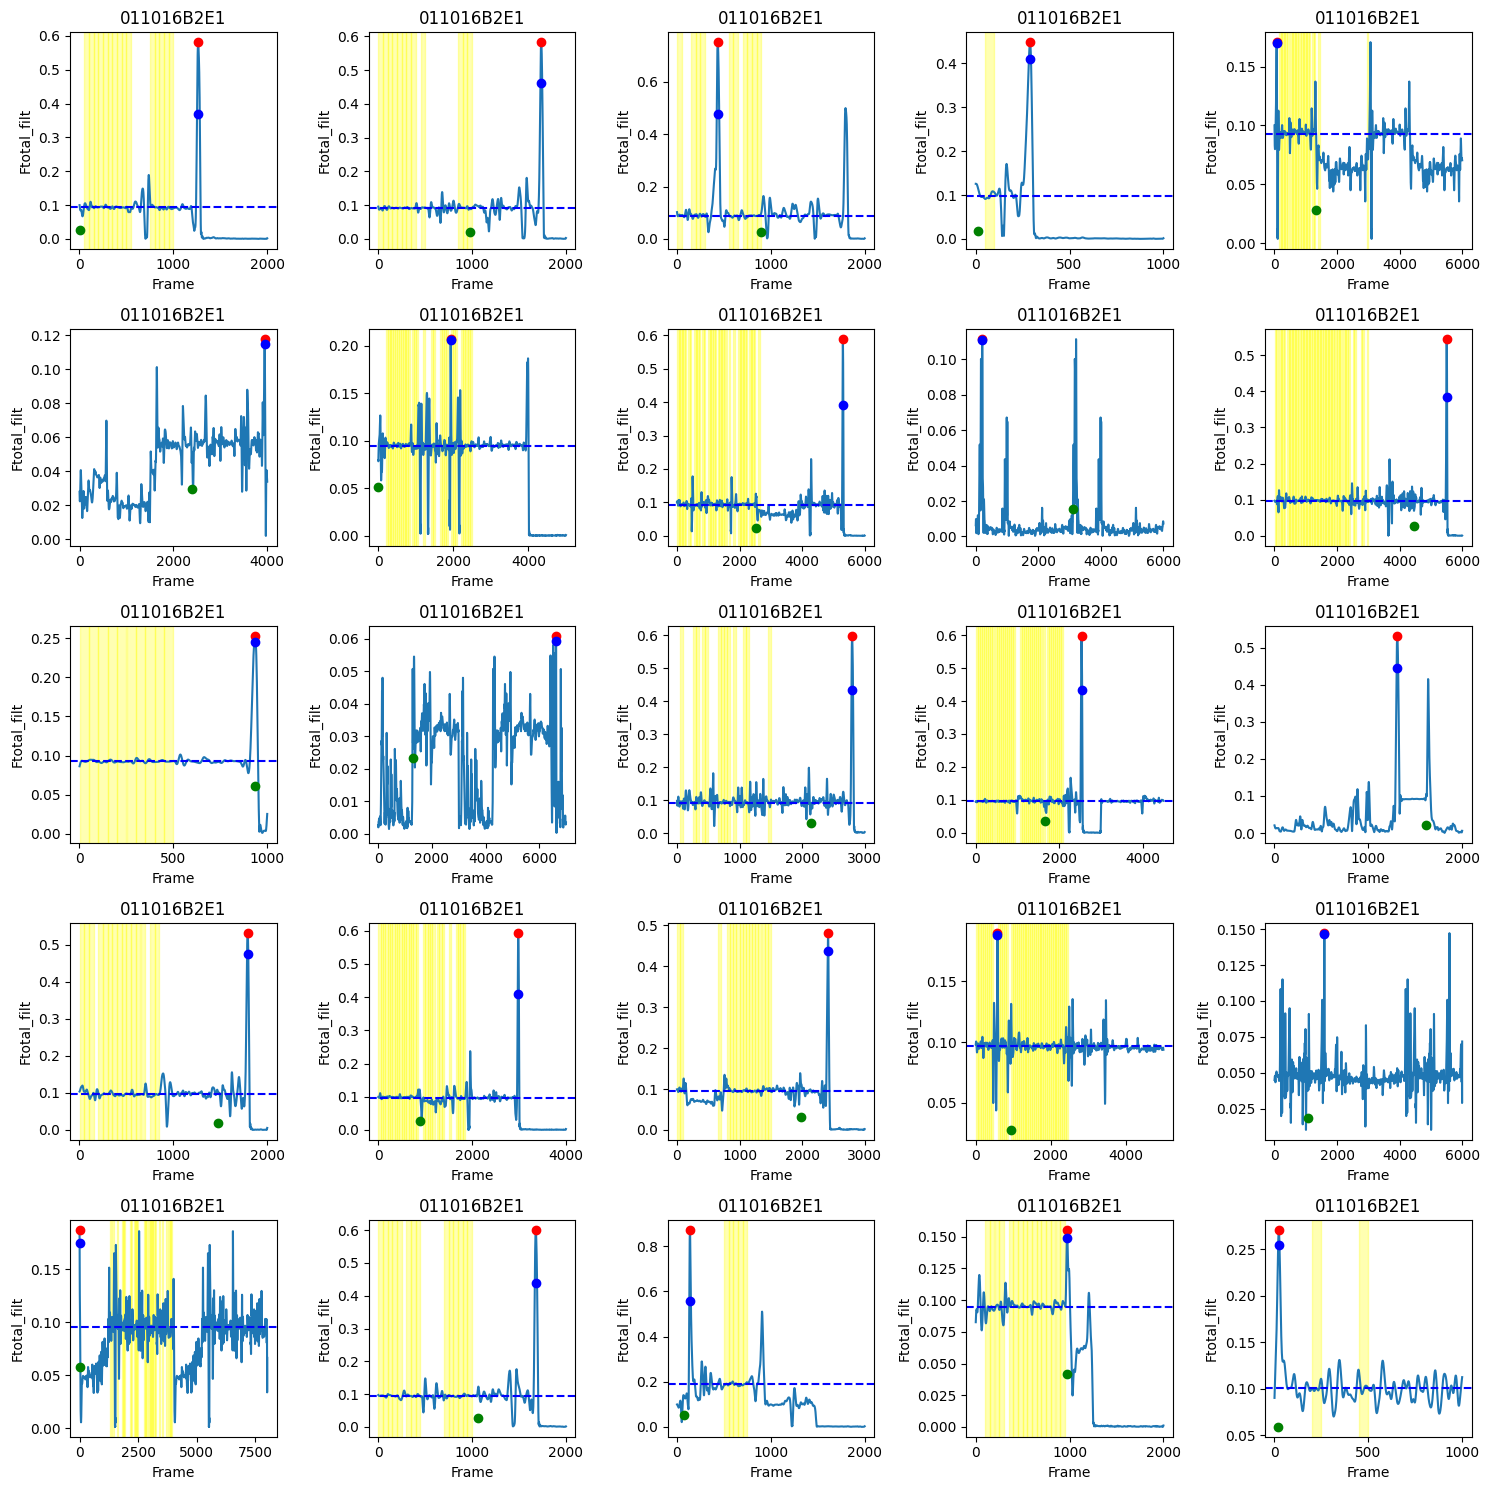

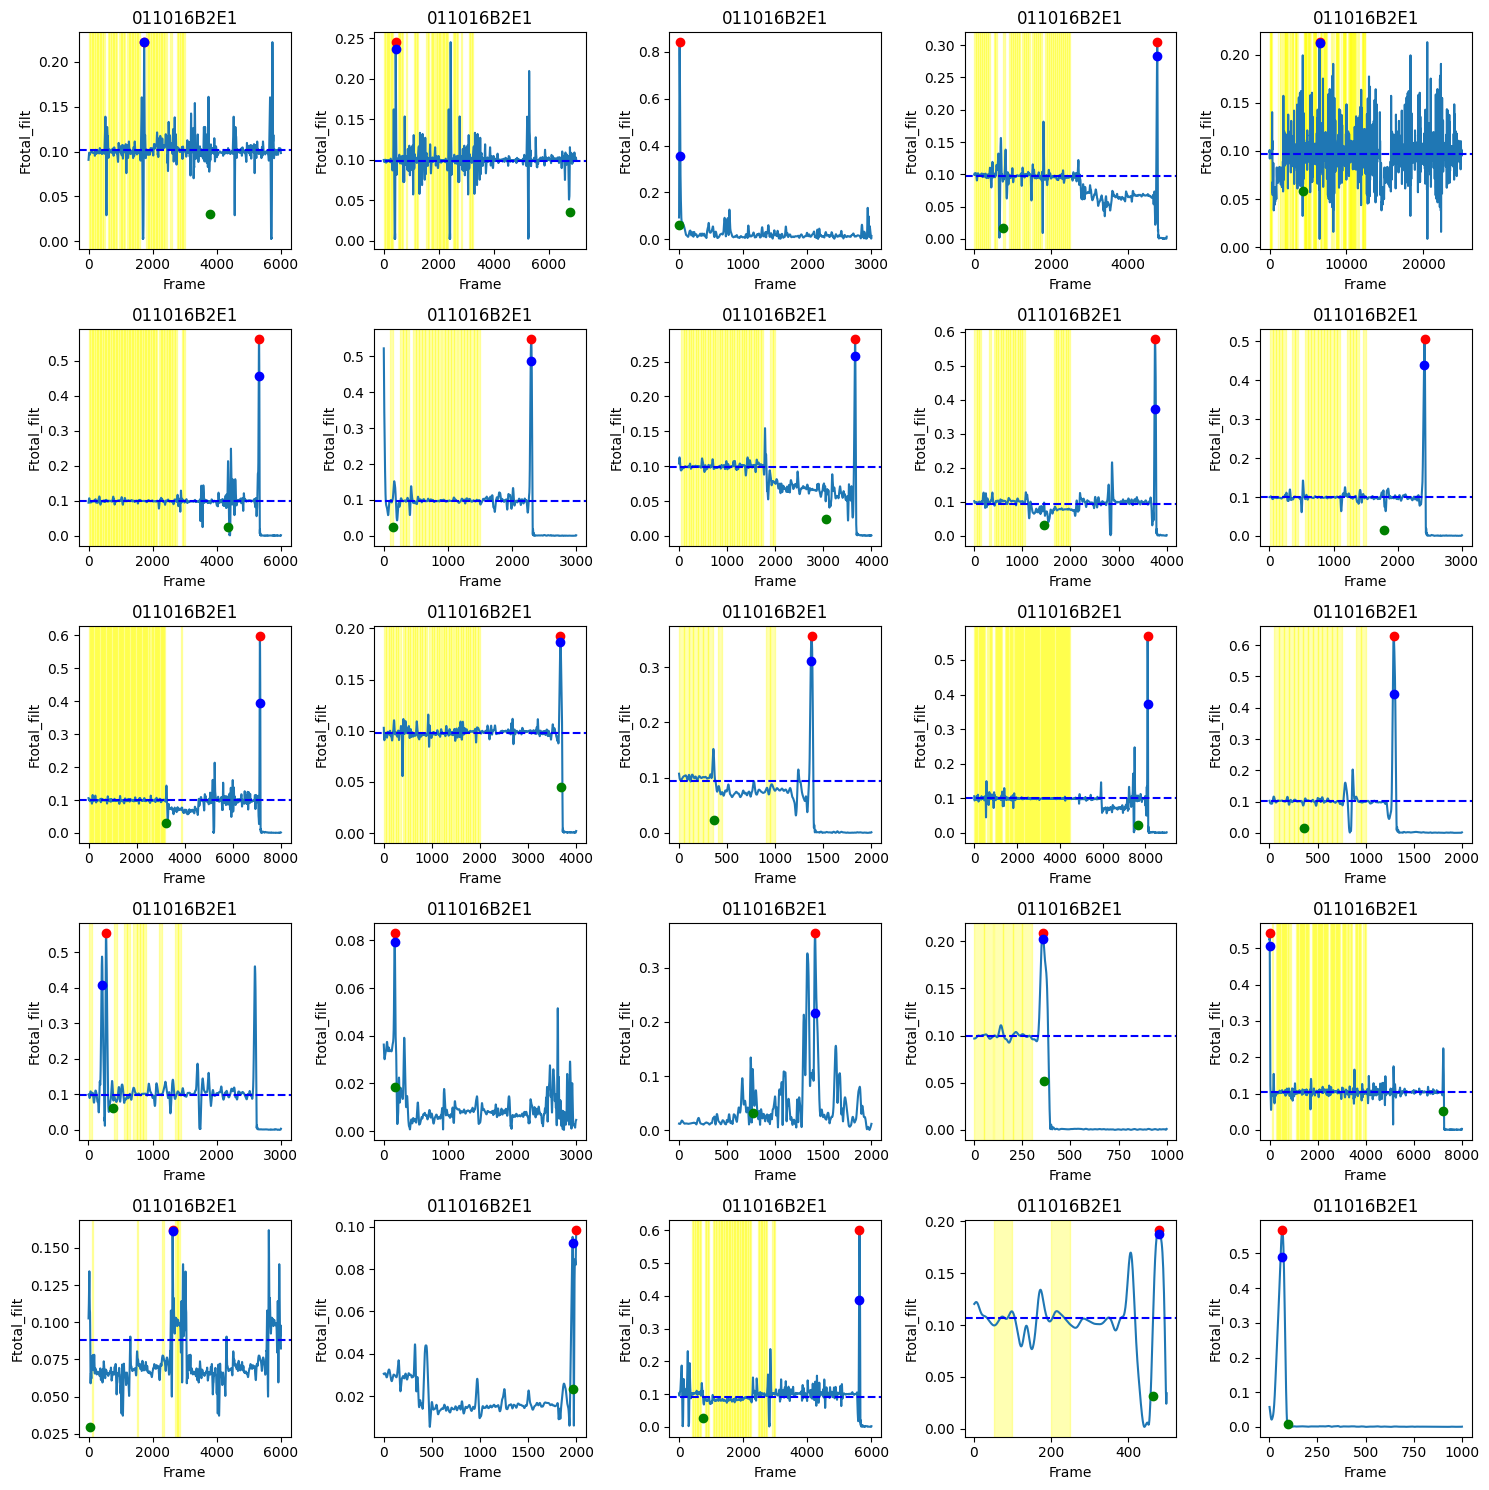

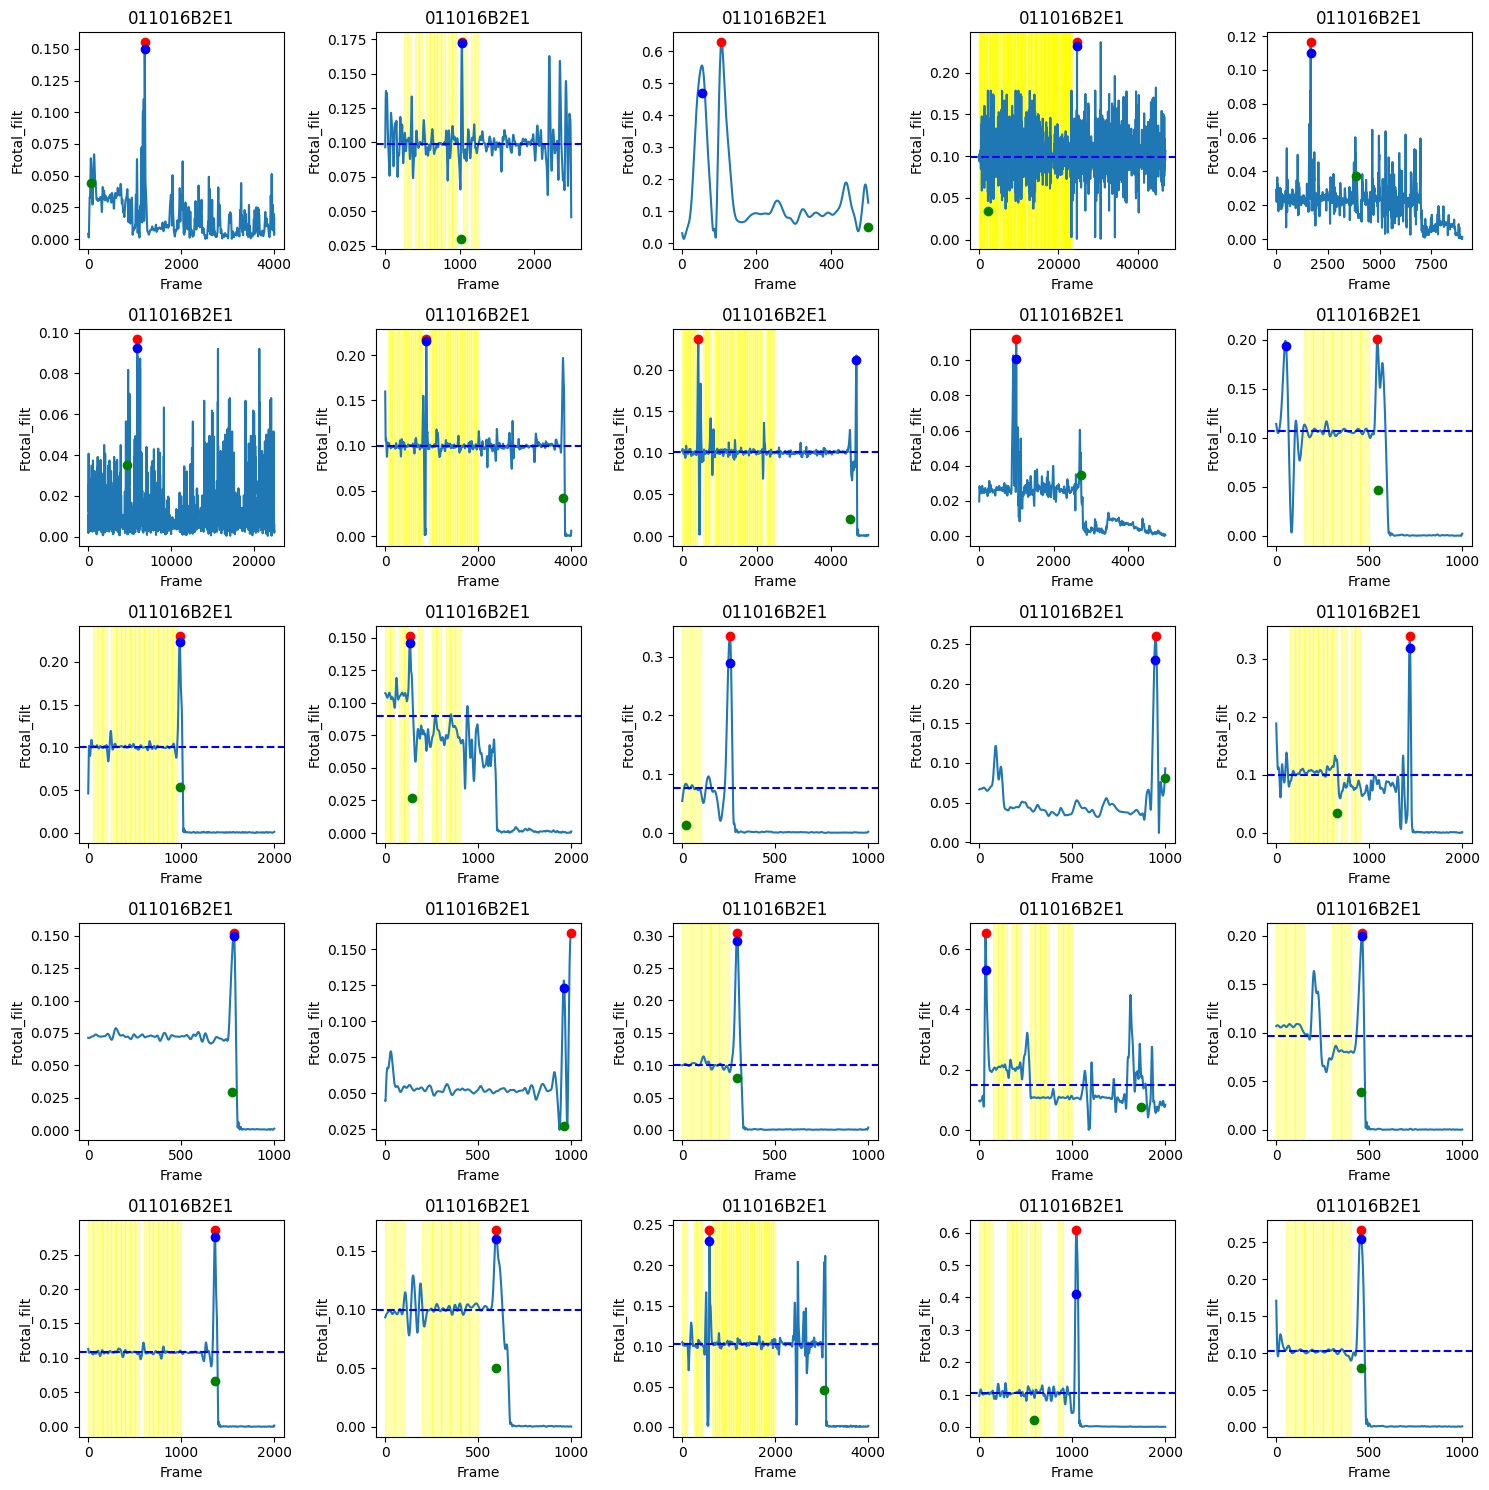

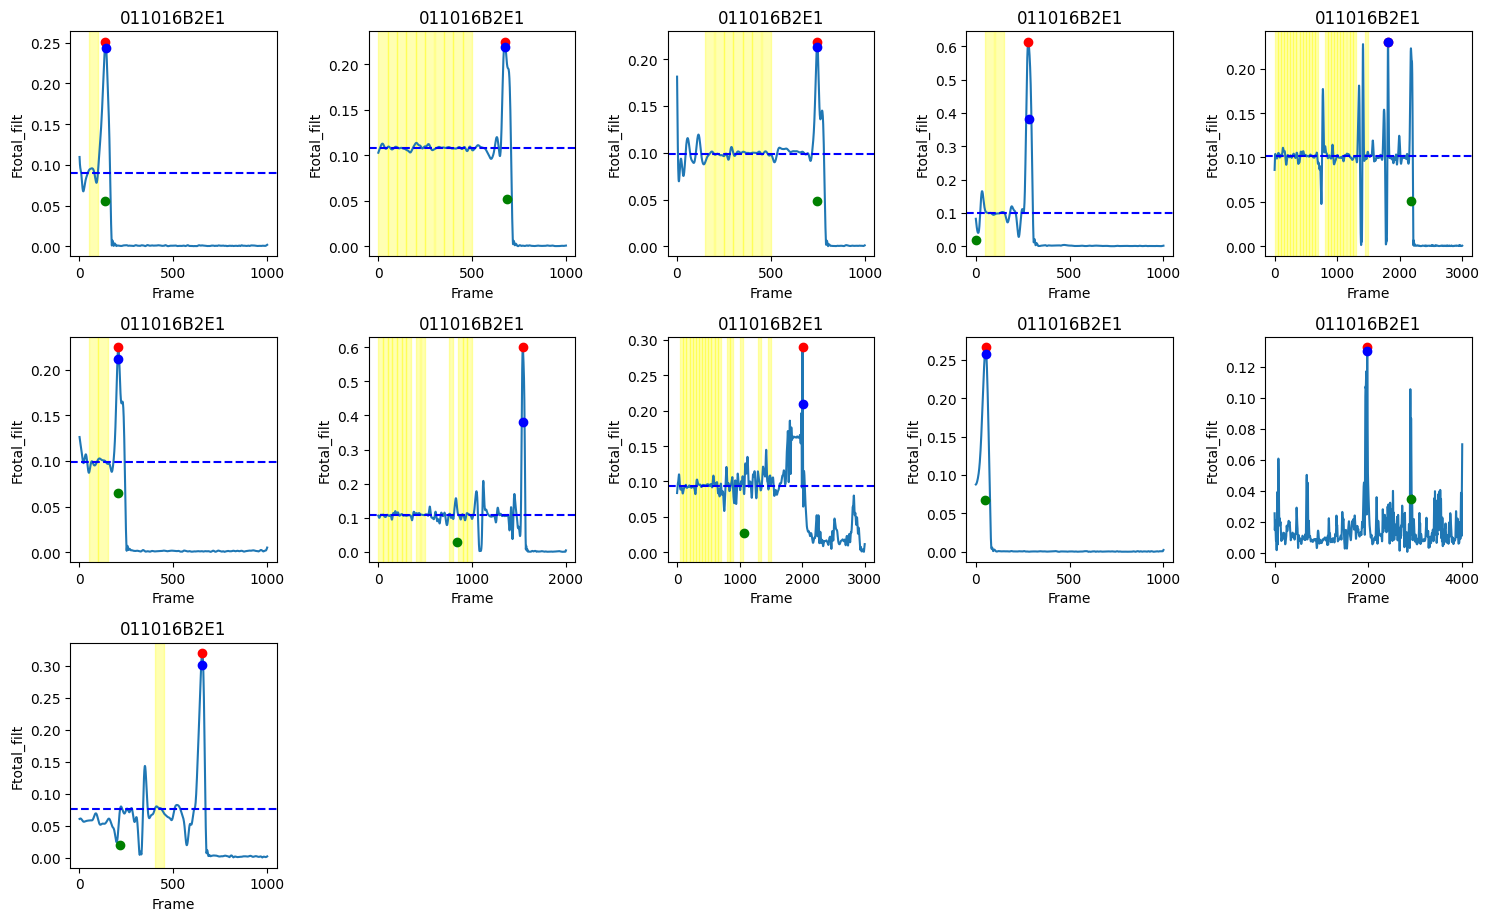

In [ ]:

unique_events = butter_df_Jan22_E1['event2'].unique()
num_events = len(unique_events)
cols = 5  # Number of columns in the grid
rows = 5  # Number of rows in the grid
grids = math.ceil(num_events / (rows * cols))  # Calculate the number of grids needed

for g in range(grids):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i in range(rows * cols):
        event_index = g * (rows * cols) + i
        if event_index < num_events:
            event = unique_events[event_index]
            event_data = butter_df_Jan22_E1[butter_df_Jan22_E1['event2'] == event].reset_index(drop = True)
            event_data_bw_frames, event_data_bw = force_defs.detect_bw_Ftot(event_data, var_threshold=0.00005, frame_length=50)
            
            sns.lineplot(x='Frame', y='Ftotal_filt', data=event_data, ax=axes[i//cols, i%cols])
            for start, end in event_data_bw_frames: #halved and variation threshold put 
                #print(f"Start: {start}, End: {end}, Length: {len(event_data)}")  # Debugging print statement
                axes[i//cols, i%cols].axvspan(event_data['Frame'].iloc[start], event_data['Frame'].iloc[end], color='yellow', alpha=0.3, label='bodyweight(N)' if start == event_data_bw_frames[0][0] else "")
            #mark the max force point in red dot 
            maxforce_index = event_data['Ftotal_filt'].idxmax()
            maxforce_frame = event_data.loc[maxforce_index, 'Frame']
            maxforce_value = event_data.loc[maxforce_index, 'Ftotal_filt']
            axes[i//cols, i%cols].plot(maxforce_frame, maxforce_value, 'ro')  # 'ro' for red dot

            #mark the max Fx point in blue dot 
            maxFx_index = event_data['Fx_filt'].idxmax()
            maxFx_frame = event_data.loc[maxFx_index, 'Frame']
            maxFx_value = event_data.loc[maxFx_index, 'Fx_filt']
            axes[i//cols, i%cols].plot(maxFx_frame, maxFx_value, 'bo')  # 'bo' for blue dot

            #mark the max Fy point in green dot 
            maxFy_index = event_data['Fy_filt'].idxmax()
            maxFy_frame = event_data.loc[maxFy_index, 'Frame']
            maxFy_value = event_data.loc[maxFy_index, 'Fy_filt']
            axes[i//cols, i%cols].plot(maxFy_frame, maxFy_value, 'go')  # 'go' for green dot

            # Mark the bodyweight as a dashed line if it is nont NaN
            bodyweight_value = event_data_bw  # Assuming bodyweight is constant
            if not np.isnan(bodyweight_value):
                axes[i//cols, i%cols].axhline(bodyweight_value, color='blue', linestyle='--', label='Bodyweight')
            
            # Set the title to the RFID of the event_data
            rfid = event_data['RFID'].iloc[0] 
            axes[i//cols, i%cols].set_title(f'{rfid}')
        else:
            fig.delaxes(axes[i//cols, i%cols])  # Remove any empty subplots
    
    #fig.suptitle('Ftot', fontsize=20)

    plt.tight_layout()
    plt.show()



### 4.4 force_outcome

#### a. read butter_df

In [45]:
butter_df_dummy_forces = force_defs.get_force(butter_df_dummy)

Processing groups:   0%|          | 0/60 [00:00<?, ?it/s]

c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\force_defs.py:747: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\force_defs.py:747: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)


In [49]:
butter_df_dummy_forces.head(5)

RFID                datetime      event_no  bodyweight  max_Ftot  \
0  NaN 2025-06-11 14:32:54.260  1-2025-06-11         NaN  2.713829   
1  NaN 2025-06-11 14:37:25.269  2-2025-06-11         NaN  2.008567   
2  NaN 2025-06-11 14:38:37.518  3-2025-06-11    0.161732  0.329440   
3  NaN 2025-06-11 14:38:59.346  4-2025-06-11         NaN  0.230533   
4  NaN 2025-06-11 14:39:19.072  5-2025-06-11         NaN  0.989601   

   ninety9_perc_Ftot  time_max_Ftot  Fx_maxFtot  Fy_maxFtot    max_Fx  \
0           2.708120          0.292    1.989813   -1.807338  2.028184   
1           2.007371          0.391    0.880638   -1.804865  1.079600   
2           0.311563          0.500    0.321088   -0.021179  0.321088   
3           0.212939          1.000    0.223990    0.052678  0.223990   
4           0.987518          0.486    0.476165   -0.854710  0.612576   

   time_max_Fx    max_Fy  time_max_Fy    max_Fz  time_max_Fz  Fz_maxFtot  
0        0.303  0.182667        0.365  0.381500        0.290    0.372878  
1        0.294  0.165200        0.500  0.056083        0.220    0.035793  
2        0.500  0.096469        0.293  0.001545        0.001   -0.070601  
3        1.000  0.091186        0.818  0.025378        0.454   -0.014110  
4        0.396  0.058822        0.098  0.155656        0.497    0.148487

In [56]:
scare_outcome_df = butter_df_dummy[['event2','day', 'scare_outcome']].drop_duplicates()
print(scare_outcome_df.shape)
scare_outcome_df['event_no'] = scare_outcome_df.apply(lambda row: f"{row['event2']}-{row['day']}", axis=1)
print(scare_outcome_df.head(5))
scare_outcome = scare_outcome_df[['event_no','scare_outcome']]
butter_df_dummy_final = butter_df_dummy_forces.merge(scare_outcome, on = 'event_no')
print(butter_df_dummy_final.head(3))

(60, 3)
     event2         day  scare_outcome      event_no
0         1  2025-06-11              0  1-2025-06-11
500       2  2025-06-11              0  2-2025-06-11
1000      3  2025-06-11              0  3-2025-06-11
1500      4  2025-06-11              0  4-2025-06-11
2500      5  2025-06-11              0  5-2025-06-11
  RFID                datetime      event_no  bodyweight  max_Ftot  \
0  NaN 2025-06-11 14:32:54.260  1-2025-06-11         NaN  2.713829   
1  NaN 2025-06-11 14:37:25.269  2-2025-06-11         NaN  2.008567   
2  NaN 2025-06-11 14:38:37.518  3-2025-06-11    0.161732  0.329440   

   ninety9_perc_Ftot  time_max_Ftot  Fx_maxFtot  Fy_maxFtot    max_Fx  \
0           2.708120          0.292    1.989813   -1.807338  2.028184   
1           2.007371          0.391    0.880638   -1.804865  1.079600   
2           0.311563          0.500    0.321088   -0.021179  0.321088   

   time_max_Fx    max_Fy  time_max_Fy    max_Fz  time_max_Fz  Fz_maxFtot  \
0        0.303  0.182667

In [46]:
butter_df_dummy_forces.to_csv('../data/butter_df_dummy_forces.csv')

In [6]:
butter_df_day0 = pd.read_csv(r'F:\FTdata\butter_df_day0.csv', index_col = 0)
butter_df_day0.head(3)



Unnamed: 0        Fx        Fy        Fz        Tx        Ty        Tz  \
0       63000  0.134864  0.012839 -0.047120 -0.000252  0.010219  0.000218   
1       63001  0.124574  0.009396 -0.047039 -0.000557  0.008928  0.000247   
2       63002  0.112243  0.002192 -0.050318 -0.000460  0.008955  0.000293   

              t                 datetime        RFID  ...  event2 Frame  \
0  3.817788e+09  2024-12-23 08:37:21.176  011016B2E1  ...      22     1   
1  3.817788e+09  2024-12-23 08:37:21.176  011016B2E1  ...      22     2   
2  3.817788e+09  2024-12-23 08:37:21.176  011016B2E1  ...      22     3   

    Time   Fx_filt   Fy_filt   Fz_filt   Tx_filt   Ty_filt   Tz_filt  \
0  0.001  0.135282  0.012455 -0.047143 -0.000242  0.010261  0.000218   
1  0.002  0.129145  0.007576 -0.047426  0.000001  0.009806  0.000202   
2  0.003  0.122911  0.002896 -0.047574  0.000233  0.009344  0.000187   

   Ftotal_filt  
0     0.143801  
1     0.137787  
2     0.131829  

[3 rows x 22 columns]

In [36]:
butter_df_day0_test = force_defs.get_force(butter_df_day0)

Processing groups:   0%|          | 0/5189 [00:00<?, ?it/s]

c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\force_defs.py:747: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\force_defs.py:747: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)


In [37]:
butter_df_day0_test.columns

Index(['RFID', 'datetime', 'event_no', 'bodyweight', 'max_Ftot',
       'ninety9_perc_Ftot', 'time_max_Ftot', 'Fx_maxFtot', 'Fy_maxFtot',
       'max_Fx', 'time_max_Fx', 'max_Fy', 'time_max_Fy', 'max_Fz',
       'time_max_Fz', 'Fz_maxFtot'],
      dtype='object')

In [38]:
butter_df_day0_test['max_Ftot'].mean()

0.5369218507282452

In [42]:
butter_df_day0_test['max_Fx'].mean()

0.39787961925378756

In [39]:
butter_df_day0_test['ninety9_perc_Ftot'].mean()

0.42377309336741553

#### b. get_force

In [ ]:
force_outcome_day0 = force_defs.get_force(butter_df_day0) 

Processing groups:   0%|          | 0/5189 [00:00<?, ?it/s]

c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\defs.py:741: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\defs.py:741: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
force_outcome_day1 = force_defs.get_force(butter_df_day1) 

Processing groups:   0%|          | 0/3637 [00:00<?, ?it/s]

c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\defs.py:741: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\defs.py:741: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)


In [28]:
force_outcome_dayminus1 = defs.get_force(butter_df_dayminus1) 

Processing groups:   0%|          | 0/5556 [00:00<?, ?it/s]

c:\Users\kmh\Documents\shed-tits\notebooks\..\notebooks\defs.py:741: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  force_outcome = pd.concat([force_outcome, pd.DataFrame([new_row])], ignore_index=True)


#### save force_outcome

In [29]:
force_outcome_day0.to_csv(r'D:\FTdata\force_outcome_day0.csv')
force_outcome_dayminus1.to_csv(r'D:\FTdata\force_outcome_dayminus1.csv')
force_outcome_day1.to_csv(r'D:\FTdata\force_outcome_day1.csv')
#'D:\FTdata\day0_zeroed_halved.csv'

In [32]:
force_outcome_day1.head(5)

RFID                 datetime      event_no  bodyweight  max_Ftot  \
0  3B00190DF0  2024-12-13 09:07:04.424  1-2024-12-13         NaN  1.091124   
1  3B00182A81  2024-12-16 07:58:14.014  1-2024-12-16         NaN  0.502831   
2  3B00186A36  2024-12-24 09:02:34.720  1-2024-12-24    0.079722  0.138788   
3  3B0019B8CC  2025-01-01 08:29:04.662  1-2025-01-01         NaN  0.874343   
4  3B00190DF0  2025-01-04 08:13:36.932  1-2025-01-04         NaN  1.064228   

     max_Fx    max_Fy  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  \
0  0.865748  0.059427          1.442    0.855568   -0.666515        1.440   
1  0.407689  0.028271          0.688    0.403475   -0.261314        0.686   
2  0.130897  0.043690          2.139    0.130730    0.040105        2.140   
3  0.518664  0.026671          0.894    0.517072   -0.702964        0.892   
4  0.786028  0.037755          0.658    0.773573   -0.713706        0.656   

   time_max_Fy    max_Fz  time_max_Fz  
0        1.060  0.067374        0.115  
1        0.545  0.028295        0.377  
2        2.144  0.041912        0.335  
3        0.510  0.059437        0.864  
4        0.683  0.023488        0.160

## 5. Force - RFID marry 
- as IR is quite limited down to 99 instances for all 12 days, matching Force - RFID would save more force information. 
- Why does the force_outcome have to be matched again when each force already has RFID linked? 

### 5.1.a day1

In [ ]:
day1_visits = pd.read_csv('RFID_match_day1.csv', index_col = 0)
day1_visits.rename(columns={'rfid_datetime': 'datetime'}, inplace=True)
F_day1_visits = force_defs.match_visits_force(day1_visits, force_outcome_day1, False)


force_outcome head:            id          force_datetime      event_no  bodyweight  max_Ftot  \
0  3B00190DF0 2024-12-13 09:07:04.424  1-2024-12-13         NaN  1.091124   
1  3B00182A81 2024-12-16 07:58:14.014  1-2024-12-16         NaN  0.502831   
2  3B00186A36 2024-12-24 09:02:34.720  1-2024-12-24    0.079722  0.138788   

     max_Fx    max_Fy  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  \
0  0.865748  0.059427          1.442    0.855568   -0.666515        1.440   
1  0.407689  0.028271          0.688    0.403475   -0.261314        0.686   
2  0.130897  0.043690          2.139    0.130730    0.040105        2.140   

   time_max_Fy    max_Fz  time_max_Fz  
0        1.060  0.067374        0.115  
1        0.545  0.028295        0.377  
2        2.144  0.041912        0.335  
visits head:            id  status             visit_datetime
0  3B00190DF0  Arrive 2024-12-13 09:07:04.359618
1  3B00190DF0  Depart 2024-12-13 09:07:06.771829
2  3B00185E23  Arrive 2024-12-13 09:20:00.

In [ ]:
F_day1_visits.columns #adds 'status' - Arrive vs. Depart and rfid 'visit_datetime'

Index(['id', 'status', 'visit_datetime', 'force_datetime', 'event_no',
       'bodyweight', 'max_Ftot', 'max_Fx', 'max_Fy', 'time_max_Ftot',
       'Fx_maxFtot', 'Fy_maxFtot', 'time_max_Fx', 'time_max_Fy', 'max_Fz',
       'time_max_Fz'],
      dtype='object')

In [39]:
force_outcome_day1.columns

Index(['RFID', 'datetime', 'event_no', 'bodyweight', 'max_Ftot', 'max_Fx',
       'max_Fy', 'time_max_Ftot', 'Fx_maxFtot', 'Fy_maxFtot', 'time_max_Fx',
       'time_max_Fy', 'max_Fz', 'time_max_Fz'],
      dtype='object')

### 5.1.b day -1 

In [ ]:
dayminus1_visits = pd.read_csv('RFID_match_day-1.csv',index_col = 0 )
dayminus1_visits.rename(columns={'rfid_datetime': 'datetime'}, inplace=True)
dayminus1_visits
F_dayminus1_visits = force_defs.match_visits_force(dayminus1_visits, force_outcome_dayminus1, False)

force_outcome head:            id          force_datetime      event_no  bodyweight  max_Ftot  \
0  3B00185E23 2024-12-11 07:59:35.233  1-2024-12-11    0.103270  0.505317   
1  3B0019B8CC 2024-12-14 07:57:10.140  1-2024-12-14    0.159327  0.871795   
2  3B004873F2 2024-12-22 08:26:58.388  1-2024-12-22    0.092720  0.499650   

     max_Fx    max_Fy  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  \
0  0.388323  0.062232          2.376     0.37804   -0.319242        2.373   
1  0.503670  0.039235          2.046     0.50367   -0.704913        2.046   
2  0.280680  0.033356          0.749     0.28068   -0.413064        0.749   

   time_max_Fy    max_Fz  time_max_Fz  
0        0.143  0.095199        0.669  
1        1.482  0.038756        2.015  
2        0.332  0.064752        0.361  
visits head:            id  status             visit_datetime
0  3B00185E23  Arrive 2024-12-11 07:59:35.920756
1  3B00185E23  Depart 2024-12-11 07:59:38.329956
2  3B0018C6F9  Arrive 2024-12-11 08:00:47.

In [41]:
F_dayminus1_visits.shape

(10465, 16)

In [56]:
#force_outcome = pd.read_csv('force_outcome.csv', index_col =0)
print(f"force_outcome head:{force_outcome_day0.head(3)}")
control_visits = pd.read_csv('control_visits.csv', index_col = 0)
print(f"control_visits head:{control_visits.head(3)}")
treatment_visits = pd.read_csv('treatment_visits.csv', index_col = 0)
print(f"treatment_visits head:{treatment_visits.head(3)}")
first_visits = pd.read_csv('first_visits.csv', index_col = 0)
print(f"first_visits head:{first_visits.head(3)}")

force_outcome head:         RFID                datetime      event_no  bodyweight  max_Ftot  \
0  3B00185CB8 2024-12-12 08:09:30.195  1-2024-12-12         NaN  0.121916   
1  3B004CD4DE 2024-12-15 08:28:40.798  1-2024-12-15         NaN  0.099513   
2  3B00182A81 2024-12-23 08:14:20.159  1-2024-12-23    0.180156  0.429710   

     max_Fx    max_Fy  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  \
0  0.117409  0.027966          0.117    0.117342    0.000857        0.116   
1  0.063463  0.020080          1.000   -0.098816   -0.010862        0.970   
2  0.271413  0.203148          0.954    0.259469   -0.341943        0.957   

   time_max_Fy    max_Fz  time_max_Fz  
0        0.369  0.027163        0.736  
1        0.662  0.016190        0.840  
2        0.927  0.043038        0.679  
control_visits head:           id        visit                    datetime    group scare_control  \
0  3B00185CB8  first visit  2024-12-12 09:09:28.584496  control           nah   
1  3B00485E69  first 

In [3]:
day1_visits = pd.read_csv('RFID_match_day1.csv', index_col = 0)

### 5.2 day0

In [ ]:
F_control_visits = force_defs.match_visits_force(control_visits, force_outcome_day0, True) #adding Dec23 and Jan24
F_treatment_visits = force_defs.match_visits_force(treatment_visits, force_outcome_day0, True)

force_outcome head:            id          force_datetime      event_no  bodyweight  max_Ftot  \
0  3B00185CB8 2024-12-12 08:09:30.195  1-2024-12-12         NaN  0.121916   
1  3B004CD4DE 2024-12-15 08:28:40.798  1-2024-12-15         NaN  0.099513   
2  3B00182A81 2024-12-23 08:14:20.159  1-2024-12-23    0.180156  0.429710   

     max_Fx    max_Fy  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  \
0  0.117409  0.027966          0.117    0.117342    0.000857        0.116   
1  0.063463  0.020080          1.000   -0.098816   -0.010862        0.970   
2  0.271413  0.203148          0.954    0.259469   -0.341943        0.957   

   time_max_Fy    max_Fz  time_max_Fz  
0        0.369  0.027163        0.736  
1        0.662  0.016190        0.840  
2        0.927  0.043038        0.679  
visits head:            id        visit             visit_datetime    group scare_control  \
0  3B00185CB8  first visit 2024-12-12 08:09:28.584496  control           nah   
1  3B00485E69  first visit 20

In [50]:
first_visits

id        visit                   datetime    group  \
0    3B00185CB8  first visit 2024-12-12 08:09:28.584496  control   
1    3B00485E69  first visit 2024-12-12 08:10:00.774473  control   
2    3B0018A99B  first visit 2024-12-12 08:10:06.270987  control   
3    3B0018C6F9  first visit 2024-12-12 08:10:24.049161  control   
4    3B00192E1E  first visit 2024-12-12 08:14:07.308664  control   
..          ...          ...                        ...      ...   
195  3B001870F2  first visit 2025-02-19 12:42:05.436224  control   
196  3B001886D3  first visit 2025-02-19 13:32:11.257782  control   
197    3B0048?1  first visit 2025-02-19 16:10:02.070845  control   
198  3B004CC5C5  first visit 2025-02-19 16:26:25.219954  control   
199  3B001816CC  first visit 2025-02-19 16:41:21.860971  control   

    scare_control scare_outcome         day  
0             nah             0  2024-12-12  
1             nah             0  2024-12-12  
2             nah             0  2024-12-12  
3             nah             0  2024-12-12  
4             nah             0  2024-12-12  
..            ...           ...         ...  
195           nah             0  2025-02-19  
196           nah             0  2025-02-19  
197           nah             0  2025-02-19  
198           nah             0  2025-02-19  
199           nah             0  2025-02-19  

[200 rows x 7 columns]

In [57]:
F_first_visits = defs.match_visits_force(first_visits, force_outcome_day0, True)

force_outcome head:            id          force_datetime      event_no  bodyweight  max_Ftot  \
0  3B00185CB8 2024-12-12 08:09:30.195  1-2024-12-12         NaN  0.121916   
1  3B004CD4DE 2024-12-15 08:28:40.798  1-2024-12-15         NaN  0.099513   
2  3B00182A81 2024-12-23 08:14:20.159  1-2024-12-23    0.180156  0.429710   

     max_Fx    max_Fy  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  \
0  0.117409  0.027966          0.117    0.117342    0.000857        0.116   
1  0.063463  0.020080          1.000   -0.098816   -0.010862        0.970   
2  0.271413  0.203148          0.954    0.259469   -0.341943        0.957   

   time_max_Fy    max_Fz  time_max_Fz  
0        0.369  0.027163        0.736  
1        0.662  0.016190        0.840  
2        0.927  0.043038        0.679  
visits head:            id        visit             visit_datetime    group scare_control  \
0  3B00185CB8  first visit 2024-12-12 08:09:28.584496  control           nah   
1  3B00485E69  first visit 20

In [58]:
F_first_visits.shape

(151, 20)

In [ ]:
print(f"F_control_visits: {F_control_visits.shape}") #2607
print(f"F_treatment_visits: {F_treatment_visits.shape}") #2679
print(f"F_first_visits shape:{F_first_visits.shape}") #151
print(f"F_day1_visits shape:{F_day1_visits.shape}") #5808
print(f"F_dayminus1_visits shape:{F_dayminus1_visits.shape}") 
#large numbers but remember there are duplicates with 'Arrive' and 'Depart'

F_control_visits: (2607, 20)
F_treatment_visits: (2679, 20)


#### save all datasets

In [80]:
# treatment birds'visits on experimental day matched with Force readings
F_treatment_visits.to_csv('../data/final_data/F_treatment_visits.csv')
F_control_visits.to_csv('../data/final_data/F_control_visits.csv')
F_first_visits.to_csv('../data/final_data/F_first_visits.csv')
F_day1_visits.to_csv('../data/final_data/F_day1_visits.csv')
F_dayminus1_visits.to_csv('../data/final_data/F_dayminus1_visits.csv')

## 6. F - RFID - IR (optional)
- scare_ir_firstvisits are the acc1-acc3 information of first visits, or the first time of the day the treatment birds were scared, and the first time of the day the control birds were not scared. 

In [15]:
treatment_visits_ir = pd.read_csv('treatment_visits_ir.csv', index_col =0)
treatment_visits_ir.tail(3)
print(treatment_visits_ir.shape)
#2570 (RFID) -> 1102 (RFID-IR)

(1102, 11)


In [ ]:
treatment_visits_ir.head(3)


(1102, 11)

In [ ]:
# Ensure 'datetime' columns are in datetime format
treatment_visits_ir['treatment_visit_datetime'] = pd.to_datetime(treatment_visits_ir['treatment_visit_datetime'])
force_outcome['datetime'] = pd.to_datetime(force_outcome['datetime'])
#treatment_visits_ir = treatment_visits_ir.rename(columns={'datetime': 'first_visit_datetime'})
force_outcome = force_outcome.rename(columns={'RFID': 'id'})

# Initialize a list to store matching rows
matching_rows = []

# Iterate through each row in 'treatment_visits_ir'
for _, fv_row in treatment_visits_ir.iterrows():
    # Filter 'force_outcome' for matching 'id' and time difference within 3 seconds
    matches = force_outcome[
        (force_outcome['id'] == fv_row['id']) &
        (abs((force_outcome['datetime'] - fv_row['treatment_visit_datetime']).dt.total_seconds()) <= 4)
    ]

    # Append all columns from both rows to the result
    for _, match_row in matches.iterrows():
        combined_row = fv_row.to_dict()  # Add all columns from first_visit row
        combined_row.update(match_row.to_dict())  # Add all columns from force_outcome row
        matching_rows.append(combined_row)

# Convert the list of matching rows to a DataFrame
F_IR_treatment_visits = pd.DataFrame(matching_rows)

# Verify the result
print(F_IR_treatment_visits.head(3))
print(F_IR_treatment_visits.shape)
#2570 (RFID) -> 1102 (RFID-IR) -> 983 (RFID-IR-F)
#2570 (RFID) -> 2215 (RFID-Force)
#so I think it would be best to separately evaluate RFID-IR and RFID-Force


           id            visit scare_control      group scare_outcome  \
0  3B0019B8CC      first visit         SCARE  treatment           1.0   
1  01103FA4B2      first visit         SCARE  treatment           0.0   
2  3B0019B8CC  not first visit         SCARE  treatment           1.0   

    treatment_visit_datetime           irfid_datetime      acc1      acc2  \
0 2024-12-12 08:10:47.773249  2024-12-12 08:10:48.366  7.819233 -0.000079   
1 2024-12-12 08:11:27.384591  2024-12-12 08:11:28.788  8.113038  0.000079   
2 2024-12-12 08:12:36.364722  2024-12-12 08:12:40.302  1.228916  0.000079   

       acc3         day                datetime       event_no  bodyweight  \
0  0.000079  2024-12-12 2024-12-12 08:10:49.196   6-2024-12-12         NaN   
1  0.339987  2024-12-12 2024-12-12 08:11:29.196   9-2024-12-12    0.094658   
2 -0.000079  2024-12-12 2024-12-12 08:12:38.197  12-2024-12-12    0.127405   

   max_Ftot    max_Fx    max_Fy  
0  0.838024  0.580783  0.032020  
1  0.139531  0.13

## 7. individual info

Datasets to fully link to individual info 
- treatment_visit_ir.csv
- control_visit_ir.csv
- first_visits_ir.csv
- F_treatment_visits.csv
- F_control_visits.csv
- F_first_visits.csv
- F_day1_visits.csv
- F_day-1_visits.csv

### 7.1 F & IR + rfid info

In [43]:
#IR RFID linked
treatment_visits_ir = pd.read_csv('treatment_visits_ir.csv', index_col = 0)
control_visits_ir = pd.read_csv('control_visits_ir.csv', index_col = 0)

day1_visits_ir = pd.read_csv('day1_visits_ir.csv', index_col = 0 )
dayminus1_ir = pd.read_csv('day-1_visits_ir.csv',index_col = 0)

In [ ]:
#F_dayminus1_visits (not saved)
F_treatment_visits = pd.read_csv(r'D:\FTdata\F_treatment_visits.csv', index_col = 0)
F_control_visits = pd.read_csv(r'D:\FTdata\F_control_visits.csv', index_col = 0 )
F_first_visits = pd.read_csv(r'D:\FTdata\F_first_visits.csv', index_col = 0 )
F_day1_visits = pd.read_csv(r'D:\FTdata\F_day1_visits.csv', index_col = 0 )
F_dayminus1_visits = pd.read_csv(r'D:\FTdata\F_dayminus1_visits.csv', index_col = 0 )



In [44]:
print(treatment_visits_ir['day'].unique())
print(control_visits_ir['day'].unique())

['2024-12-12' '2024-12-15' '2024-12-23' '2024-12-31' '2025-01-03'
 '2025-01-21' '2025-01-24' '2025-01-30' '2025-02-06' '2025-02-12'
 '2025-02-16' '2025-02-19']
['2024-12-12' '2024-12-15' '2024-12-23' '2024-12-31' '2025-01-03'
 '2025-01-21' '2025-01-24' '2025-01-30' '2025-02-06' '2025-02-12'
 '2025-02-16' '2025-02-19']


In [45]:
full_rfids = pd.read_csv(r'C:\Users\kmh\Documents\DATA\2024-5\final_rfids.csv', index_col =0)
full_rfids.head(5)

id species sex  age
0  3B00190DF0   greti   M    6
1  0110177BFD   greti   M    5
2  01103FBB55   greti   F    6
3  3B004DB16E   bluti   M    6
4  01103F8EAC   greti   M    5

#### merge

##### def full_merge_irfid

In [46]:
dayminus1_ir_full = force_defs.full_merge_irfid(dayminus1_visits_ir, full_rfids)
day1_ir_full = force_defs.full_merge_irfid(day1_visits_ir, full_rfids)
treats_ir_full = force_defs.full_merge_irfid(treatment_visits_ir, full_rfids) #1728
control_ir_full = force_defs.full_merge_irfid(control_visits_ir, full_rfids) #1693
first_ir_full = force_defs.full_merge_irfid(first_visits_ir, full_rfids)


Merged DataFrame shape: (6701, 21)
First 3 rows of the merged DataFrame:
           id  status             visit_datetime         day  \
0  3B0018C6F9  Arrive 2024-12-11 08:00:47.726152  2024-12-11   
1  3B0018C6F9  Depart 2024-12-11 08:00:50.939834  2024-12-11   
2  3B00185E23  Arrive 2024-12-11 08:02:36.441403  2024-12-11   

                 datetime    t12    t23    t34    t45        v1  ...  \
0 2024-12-11 08:00:48.289  0.283  0.131  0.058  0.067  0.477032  ...   
1 2024-12-11 08:00:48.289  0.283  0.131  0.058  0.067  0.477032  ...   
2 2024-12-11 08:02:36.599  0.134  0.069  0.059  0.074  1.007462  ...   

         v3        v4     avg.v      acc1       acc2      acc3   avg.acc  \
0  2.327592  2.014921  1.001855  2.673923  13.725492 -5.002743  0.704394   
1  2.327592  2.014921  1.001855  2.673923  13.725492 -5.002743  0.704394   
2  2.288135  1.824327  1.607143  9.350335   5.181459 -6.974558 -2.518182   

   species sex age  
0    bluti   M   6  
1    bluti   M   6  
2    bluti   

In [48]:
day1_ir_full.to_csv('day1_ir_full.csv')
dayminus1_ir_full.to_csv('day-1_ir_full.csv') #6701

##### def full_merge_Frfid

In [ ]:
F_control_full = force_defs.full_merge_Frfid(F_control_visits, full_rfids)
F_treats_full = force_defs.full_merge_Frfid(F_treatment_visits, full_rfids)
F_first_visits_full = force_defs.full_merge_Frfid(F_first_visits, full_rfids) #210

F_day1_visits_full = force_defs.full_merge_Frfid(F_day1_visits, full_rfids)
F_dayminus1_visits_full = force_defs.full_merge_Frfid(F_dayminus1_visits, full_rfids)

Merged DataFrame shape: (2607, 23)
First 3 rows of the merged DataFrame:
           id        visit             visit_datetime    group scare_control  \
0  3B00185CB8  first visit 2024-12-12 08:09:28.584496  control           nah   
1  3B00485E69  first visit 2024-12-12 08:10:00.774473  control           nah   
2  3B0018A99B  first visit 2024-12-12 08:10:06.270987  control           nah   

  scare_outcome         day                datetime      event_no  bodyweight  \
0             0  2024-12-12 2024-12-12 08:09:30.195  1-2024-12-12         NaN   
1             0  2024-12-12 2024-12-12 08:10:02.197  2-2024-12-12         NaN   
2             0  2024-12-12 2024-12-12 08:10:08.197  3-2024-12-12         NaN   

   ...  time_max_Ftot  Fx_maxFtot  Fy_maxFtot  time_max_Fx  time_max_Fy  \
0  ...          0.117    0.117342    0.000857        0.116        0.369   
1  ...          0.304    0.354757   -0.196784        0.302        0.077   
2  ...          0.663    0.335686   -0.349998        0.6

In [67]:
F_day1_visits_full.to_csv(r'D:\FTdata\F_day1_full.csv')
F_dayminus1_visits_full.to_csv(r'D:\FTdata\F_dayminus1_full.csv')

### 7.2 scare_control 

In [57]:
butter_df_dummy_scare_controled = force_defs.scare_control(butter_df_dummy_final)

first line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
second line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
third line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
fourth line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64


In [49]:
treats_ir_full_scare_controled = force_defs.scare_control(treats_ir_full)
control_ir_full_scare_controled = force_defs.scare_control(control_ir_full)

first line: 0    1
1    0
2    1
3    0
4    1
5    1
6    0
Name: scare_outcome, dtype: object
second line: 0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
Name: scare_outcome, dtype: float64
third line: 0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
Name: scare_outcome, dtype: float64
fourth line: 0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
Name: scare_outcome, dtype: float64
first line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
second line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
third line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
fourth line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64


In [ ]:
F_control_full_scare_controled = force_defs.scare_control(F_control_full)
F_treats_full_scare_controled = force_defs.scare_control(F_treats_full)
F_firsts_full_scare_controled = force_defs.scare_control(F_first_visits_full)

first line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: object
second line: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: scare_outcome, dtype: float64
third line: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: scare_outcome, dtype: float64
fourth line: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: scare_outcome, dtype: float64
first line: 0    1
1    1
2    0
3    0
4    1
5    0
6    1
Name: scare_outcome, dtype: object
second line: 0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
5    0.0
6    1.0
Name: scare_outcome, dtype: float64
third line: 0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
5    0.0
6    1.0
Name: scare_outcome, dtype: float64
fourth line: 0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
5    0.0
6    1.0
Name: scare_outcome, dtype: float64
first line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: object
second line: 0    0.0
1    0.0
2    0.0
3 

### 7.3 scare_ordering

In [59]:
butter_df_dummy_scare_controled['id'] = "kmh"
butter_dummy_ordered = force_defs.scare_ordering(butter_df_dummy_scare_controled)

first line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
second line:    scare_outcome exp_order  prev_scares
0              0      <NA>            0
1              0      <NA>            0
2              0      <NA>            0
3              0      <NA>            0
4              0      <NA>            0
5              0      <NA>            0
6              0      <NA>            0
third line:    scare_outcome exp_order  prev_scares
0              0         1          NaN
1              0         1          0.0
2              0         1          0.0
3              0         1          0.0
4              0         1          0.0
5              0         1          0.0
6              0         1          0.0


In [50]:
ir_treats_ordered = force_defs.scare_ordering(treats_ir_full_scare_controled)
ir_control_ordered = force_defs.scare_ordering(control_ir_full_scare_controled)

first line: 0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
Name: scare_outcome, dtype: float64
second line:    scare_outcome exp_order  prev_scares
0            1.0      <NA>            0
1            0.0      <NA>            0
2            1.0      <NA>            0
3            0.0      <NA>            0
4            1.0      <NA>            0
5            1.0      <NA>            0
6            0.0      <NA>            0
third line:    scare_outcome exp_order  prev_scares
0            1.0         1          NaN
1            0.0         1          NaN
2            1.0         1          1.0
3            0.0         1          NaN
4            1.0         1          NaN
5            1.0         1          NaN
6            0.0         1          1.0
first line: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: scare_outcome, dtype: int64
second line:    scare_outcome exp_order  prev_scares
0              0      <NA>            0
1              0      <NA>          

In [ ]:
F_treats_ordered = force_defs.scare_ordering(F_treats_full_scare_controled)
F_control_ordered = force_defs.scare_ordering(F_control_full_scare_controled)
F_firsts_ordered = force_defs.scare_ordering(F_firsts_full_scare_controled)



first line: 0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
5    0.0
6    1.0
Name: scare_outcome, dtype: float64
second line:    scare_outcome exp_order  prev_scares
0            1.0      <NA>            0
1            1.0      <NA>            0
2            0.0      <NA>            0
3            0.0      <NA>            0
4            1.0      <NA>            0
5            0.0      <NA>            0
6            1.0      <NA>            0
third line:    scare_outcome exp_order  prev_scares
0            1.0         1          NaN
1            1.0         1          NaN
2            0.0         1          1.0
3            0.0         1          NaN
4            1.0         1          1.0
5            0.0         1          NaN
6            1.0         1          NaN
first line: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: scare_outcome, dtype: float64
second line:    scare_outcome exp_order  prev_scares
0            0.0      <NA>            0
1            0.0    

In [51]:
## see if there's any minuses ##ahhh something went wrong here 
control_ir_full[control_ir_full['scare_outcome']!=0]

id            visit              visit_datetime    group  \
150   3B0019F652      first visit  2024-12-15 10:29:20.329733  control   
743   3B00182A81  not first visit  2025-01-03 08:38:37.785704  control   
1097  01103FD2E8  not first visit  2025-02-12 11:09:55.094111  control   
1109  3B004CA42C  not first visit  2025-02-12 11:21:20.332742  control   

     scare_control  scare_outcome         day                datetime    t12  \
150            nah              1  2024-12-15 2024-12-15 10:29:21.654  0.148   
743            nah              1  2025-01-03 2025-01-03 08:38:39.064  0.143   
1097           nah              1  2025-02-12 2025-02-12 11:09:55.693  0.140   
1109           nah              1  2025-02-12 2025-02-12 11:21:21.559  0.153   

        t23  ...     avg.v      acc1      acc2      acc3   avg.acc  species  \
150   0.074  ...  1.459460  8.217708 -0.000079  0.000079 -1.697535    bluti   
743   0.074  ...  1.483516  8.113107  0.339904 -0.339904 -1.870604    bluti   
1097  0.073  ...  1.529745  8.310144  0.354249  1.575606 -1.887346    greti   
1109  0.073  ...  1.443850  8.557135 -0.339904 -0.000079 -1.562832    bluti   

      sex  age  exp_order  prev_scares  
150     F    5          2          NaN  
743     F    6          5          0.0  
1097   F     5         10          0.0  
1109    F    6         10          0.0  

[4 rows x 26 columns]

In [46]:
#see if these are accidental scares
accidentals = control_ir_full[control_ir_full['scare_outcome']!=0]
accidentals.to_csv('accidentals.csv')

In [69]:
F_treats_ordered[F_treats_ordered['prev_scares']<0]

Empty DataFrame
Columns: [id, visit, visit_datetime, group, scare_control, scare_outcome, day, datetime, event_no, bodyweight, max_Ftot, max_Fx, max_Fy, time_max_Ftot, Fx_maxFtot, Fy_maxFtot, time_max_Fx, time_max_Fy, max_Fz, time_max_Fz, species, sex, age, exp_order, prev_scares]
Index: []

[0 rows x 25 columns]

In [52]:
# fill the NaN with 0 in 'prev_scares'
treats_ir_full['prev_scares'] = treats_ir_full['prev_scares'].fillna(0)
control_ir_full['prev_scares'] = control_ir_full['prev_scares'].fillna(0)





In [ ]:
F_treats_full['prev_scares'] = F_treats_full['prev_scares'].fillna(0)
F_control_full['prev_scares'] = F_control_full['prev_scares'].fillna(0)

### 7.4 bodyweight filling

In [70]:
#how many 'bodyweight' rows are Na?
print(F_treats_ordered.shape)
print(F_treats_ordered['bodyweight'].isna().sum()) #1810
print(F_control_ordered.shape)
print(F_control_ordered['bodyweight'].isna().sum()) #1813

(2679, 25)
1665
(2607, 25)
1718


In [40]:
F_day1_visits_full = pd.read_csv('../data/F_day1_full.csv')
day_ir_visits_full = pd.read_csv('../data/day1_ir_full.csv')

In [41]:
print(F_day1_visits_full.shape) #5808
print(F_day1_visits_full['bodyweight'].isna().sum()) #3655


(5808, 14)
23


In [60]:
def bw_fill(F_treats_full):  
  # Ensure 'datetime' column is in datetime format
    F_treats_full['datetime'] = pd.to_datetime(F_treats_full['datetime'])

    # Create the 'bw_filled' column with a default value of 0
    F_treats_full['bw_filled'] = 0

    # Iterate over rows where 'bodyweight' is NaN
    for i, row in F_treats_full[F_treats_full['bodyweight'].isna()].iterrows():
        # Filter rows for the same individual ('id') within 30 minutes before OR after
        same_id_rows = F_treats_full[(F_treats_full['id'] == row['id']) &
                        ((F_treats_full['datetime'] >= row['datetime'] - pd.Timedelta(minutes=30)) |
                        (F_treats_full['datetime'] <= row['datetime'] + pd.Timedelta(minutes=30)))]

        # Calculate the average of non-NaN bodyweight values
        avg_bodyweight = same_id_rows['bodyweight'].dropna().mean()

        # Replace the NaN value with the average if available
        if not np.isnan(avg_bodyweight):  # Check if average is not NaN
            F_treats_full.loc[i, 'bodyweight'] = avg_bodyweight
            F_treats_full.loc[i, 'bw_filled'] = 1  # Mark as filled by averaging

    return F_treats_full

In [61]:
F_dummy_full = bw_fill(butter_dummy_ordered)

In [62]:
F_dummy_full.to_csv('../data/final_data/F_dummy_full.csv')

In [75]:
F_day1_full = bw_fill(F_day1_visits_full)
F_dayminus1_full = bw_fill(F_dayminus1_visits_full)
F_treats_full = bw_fill(F_treats_ordered)
F_control_full = bw_fill(F_control_ordered)
F_firsts_full = bw_fill(F_firsts_ordered)

In [72]:
F_treats_full['day'].unique()

array([datetime.date(2024, 12, 12), datetime.date(2024, 12, 15),
       datetime.date(2024, 12, 23), datetime.date(2024, 12, 31),
       datetime.date(2025, 1, 3), datetime.date(2025, 1, 21),
       datetime.date(2025, 1, 24), datetime.date(2025, 1, 30),
       datetime.date(2025, 2, 6), datetime.date(2025, 2, 12),
       datetime.date(2025, 2, 16), datetime.date(2025, 2, 19)],
      dtype=object)

In [73]:
F_control_full['day'].unique()

array([datetime.date(2024, 12, 12), datetime.date(2024, 12, 15),
       datetime.date(2024, 12, 23), datetime.date(2024, 12, 31),
       datetime.date(2025, 1, 3), datetime.date(2025, 1, 21),
       datetime.date(2025, 1, 24), datetime.date(2025, 1, 30),
       datetime.date(2025, 2, 6), datetime.date(2025, 2, 12),
       datetime.date(2025, 2, 16), datetime.date(2025, 2, 19)],
      dtype=object)

In [76]:
F_day1_full['bodyweight'].isna().sum() #3655->23

17

In [ ]:
# check again how many bodyweight is nan
print(F_treats_full['bodyweight'].isna().sum()) #10
print(F_control_full['bodyweight'].isna().sum()) #9

10
9


#### save

In [82]:
F_day1_full.to_csv('../data/final_data/F_day1_full.csv')
F_dayminus1_full.to_csv('../data/final_data/F_dayminus1_full.csv')
F_control_full.to_csv('../data/final_data/F_control_full.csv')
F_treats_full.to_csv('../data/final_data/F_treats_full.csv')
F_firsts_full.to_csv('../data/final_data/F_firsts_full.csv')

In [96]:
F_day1_full.to_csv('../data/F_day1_full.csv')
day1_visits_ir_full.to_csv('../data/day1_ir_full.csv')

In [39]:
F_treats_full

NameError: name 'F_treats_full' is not defined

In [53]:
ir_treats_ordered.to_csv('ir_treats_ordered.csv')
ir_control_ordered.to_csv('ir_control_ordered.csv')

In [ ]:
first_ir_full.to_csv('../data/first_ir_full.csv')

NameError: name 'F_first_visits_full' is not defined

## 8. GRAPHS force great & blue

In [2]:
#balanced datasets without outliers processed in Rstudio
force_bluti = pd.read_csv('../data/force.out.bluti_bal.csv')
force_greti = pd.read_csv('../data/force.out.greti_bal.csv')

In [3]:
F_day1_full = pd.read_csv('../data/final_data/F_day1_full.csv')
F_dayminus1_full = pd.read_csv('../data/final_data/F_dayminus1_full.csv')
F_control_full = pd.read_csv('../data/final_data/F_control_full.csv')
F_treats_full = pd.read_csv('../data/final_data/F_treats_full.csv')

In [4]:
F_day1_full.head(5)

Unnamed: 0          id  status              visit_datetime  \
0           0  3B00190DF0  Arrive  2024-12-13 09:07:04.359618   
1           1  3B00190DF0  Depart  2024-12-13 09:07:06.771829   
2           2  3B00192E1E  Arrive  2024-12-13 09:20:15.615671   
3           3  3B00192E1E  Depart  2024-12-13 09:20:18.829954   
4           4  01103F97C4  Arrive  2024-12-13 09:21:08.589066   

                  datetime      event_no  bodyweight  max_Ftot    max_Fx  \
0  2024-12-13 09:07:04.424  1-2024-12-13    0.176157  1.091124  0.865748   
1  2024-12-13 09:07:04.424  1-2024-12-13    0.176157  1.091124  0.865748   
2  2024-12-13 09:20:17.425  2-2024-12-13    0.097915  0.440378  0.338902   
3  2024-12-13 09:20:17.425  2-2024-12-13    0.097915  0.440378  0.338902   
4  2024-12-13 09:21:09.425  3-2024-12-13    0.159815  1.137414  0.798405   

     max_Fy  ...  Fx_maxFtot  Fy_maxFtot  time_max_Fx  time_max_Fy    max_Fz  \
0  0.059427  ...    0.855568   -0.666515        1.440        1.060  0.067374   
1  0.059427  ...    0.855568   -0.666515        1.440        1.060  0.067374   
2  0.017540  ...    0.338902   -0.280841        0.726        0.041  0.019399   
3  0.017540  ...    0.338902   -0.280841        0.726        0.041  0.019399   
4  0.058588  ...    0.798405   -0.810063        0.001        1.605  0.058528   

   time_max_Fz  species sex age  bw_filled  
0        0.115    greti   M   6          1  
1        0.115    greti   M   6          1  
2        0.668    bluti   M   6          0  
3        0.668    bluti   M   6          0  
4        2.653    greti  M    5          1  

[5 rows x 21 columns]

## 9. Old Code

In [4]:
F_treats_full = pd.read_csv('../data/F_treats_full.csv', index_col = 0)
treats_ir_full = pd.read_csv('../data/treats_ir_full.csv', index_col =0)

In [ ]:
force_blue = force_complete[force_complete["species"] == "bluti"]
print(force_blue.shape) #60
force_great = force_complete[force_complete["species"] == "greti"]
print(force_great.shape) #32


(60, 16)
(32, 16)


In [94]:
force_blue['id'].nunique()

26

In [95]:
force_great['id'].nunique()

11

## final graph 

In [96]:
force_blue.head(3)

id    group                datetime      event_no  bodyweight  \
0  3B00485E69  control 2024-12-12 08:10:02.197  2-2024-12-12         NaN   
1  3B0018A99B  control 2024-12-12 08:10:08.197  3-2024-12-12         NaN   
2  3B0018C6F9  control 2024-12-12 08:10:26.197  4-2024-12-12         NaN   

   max_Ftot    max_Fx    max_Fy      acc1      acc2      acc3 species sex  \
0  0.425577  0.358337  0.025121  0.000000  8.217708 -0.000079   bluti   F   
1  0.484958  0.336293  0.024030  7.187551 -8.198676  9.612613   bluti   M   
2  0.560489  0.418142  0.021862  1.693059  7.019372 -0.316363   bluti   M   

   age         day exp_order  
0    6  2024-12-12         1  
1    5  2024-12-12         1  
2    6  2024-12-12         1

In [97]:
force_blue.columns

Index(['id', 'group', 'datetime', 'event_no', 'bodyweight', 'max_Ftot',
       'max_Fx', 'max_Fy', 'acc1', 'acc2', 'acc3', 'species', 'sex', 'age',
       'day', 'exp_order'],
      dtype='object')

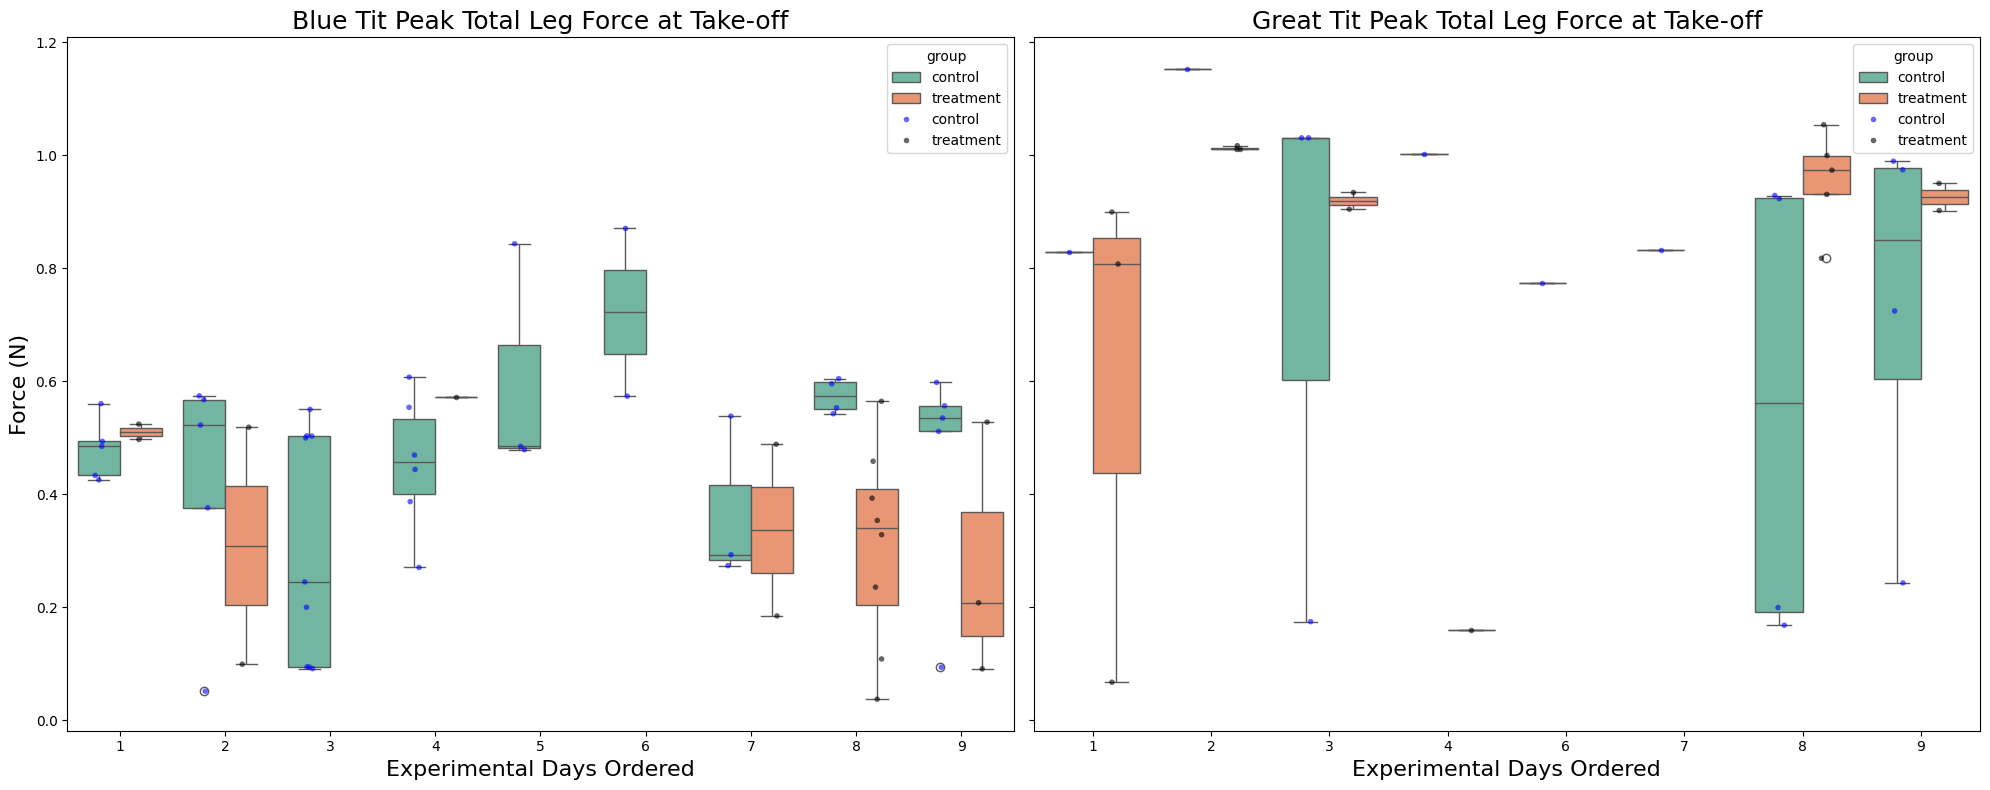

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)  # 1 row, 2 columns, shared y-axis
custom_palette = {'control': 'blue', 'treatment': 'black'}

# Plot for 'force_blue'
sns.boxplot(
    data=force_blue,
    x='exp_order',
    y='max_Ftot',
    hue='group',
    palette='Set2',
    ax=axes[0],  # First subplot
    zorder=1
)

# Overlay scatterplot for 'force_blue'
sns.stripplot(
    data=force_blue,
    x='exp_order',
    y='max_Ftot',
    hue='group',
    dodge=True,
    palette=custom_palette,
    alpha=0.6,
    size=4,
    edgecolor='black',
    ax=axes[0],
    zorder =2
)

# Customize the first subplot
axes[0].set_title('Blue Tit Peak Total Leg Force at Take-off', fontsize=18)
axes[0].set_xlabel('Experimental Days Ordered', fontsize=16)
axes[0].set_ylabel('Force (N)', fontsize=16)

# Plot for 'force_great'
sns.boxplot(
    data=force_great,
    x='exp_order',
    y='max_Ftot',
    hue='group',
    palette='Set2',
    ax=axes[1],
    zorder =1  # Second subplot
)

# Overlay scatterplot for 'force_great'
sns.stripplot(
    data=force_great,
    x='exp_order',
    y='max_Ftot',
    hue='group',
    dodge=True,
    palette=custom_palette,
    alpha=0.6,
    size=4,
    edgecolor='black',
    ax=axes[1],
    zorder =2 
)

# Customize the second subplot
axes[1].set_title('Great Tit Peak Total Leg Force at Take-off', fontsize=18)
axes[1].set_xlabel('Experimental Days Ordered', fontsize=16)
axes[1].set_ylabel('')  # Y-axis label only on the left subplot

# Add shared legend for both plots
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles[:len(labels)//2], labels[:len(labels)//2], title='Group', loc='upper center', ncol=2, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

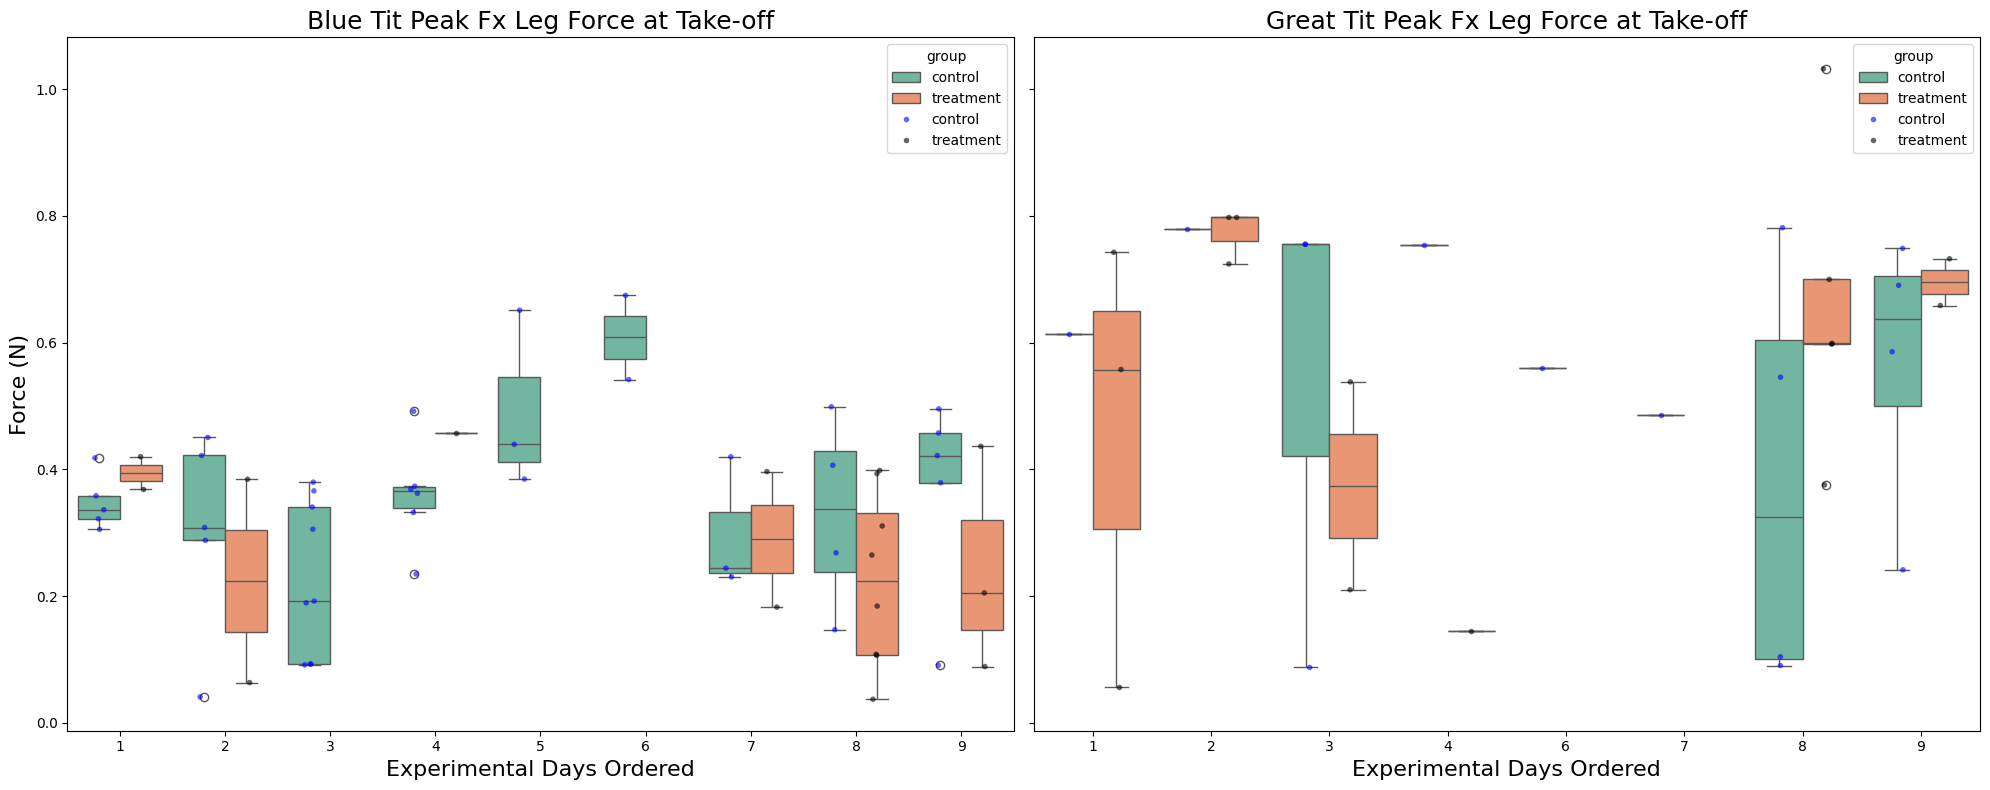

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)  # 1 row, 2 columns, shared y-axis
custom_palette = {'control': 'blue', 'treatment': 'black'}

# Plot for 'force_blue'
sns.boxplot(
    data=force_blue,
    x='exp_order',
    y='max_Fx',
    hue='group',
    palette='Set2',
    ax=axes[0],  # First subplot
    zorder=1
)

# Overlay scatterplot for 'force_blue'
sns.stripplot(
    data=force_blue,
    x='exp_order',
    y='max_Fx',
    hue='group',
    dodge=True,
    palette=custom_palette,
    alpha=0.6,
    size=4,
    edgecolor='black',
    ax=axes[0],
    zorder =2
)

# Customize the first subplot
axes[0].set_title('Blue Tit Peak Fx Leg Force at Take-off', fontsize=18)
axes[0].set_xlabel('Experimental Days Ordered', fontsize=16)
axes[0].set_ylabel('Force (N)', fontsize=16)

# Plot for 'force_great'
sns.boxplot(
    data=force_great,
    x='exp_order',
    y='max_Fx',
    hue='group',
    palette='Set2',
    ax=axes[1],
    zorder =1  # Second subplot
)

# Overlay scatterplot for 'force_great'
sns.stripplot(
    data=force_great,
    x='exp_order',
    y='max_Fx',
    hue='group',
    dodge=True,
    palette=custom_palette,
    alpha=0.6,
    size=4,
    edgecolor='black',
    ax=axes[1],
    zorder =2 
)

# Customize the second subplot
axes[1].set_title('Great Tit Peak Fx Leg Force at Take-off', fontsize=18)
axes[1].set_xlabel('Experimental Days Ordered', fontsize=16)
axes[1].set_ylabel('')  # Y-axis label only on the left subplot

# Add shared legend for both plots
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles[:len(labels)//2], labels[:len(labels)//2], title='Group', loc='upper center', ncol=2, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

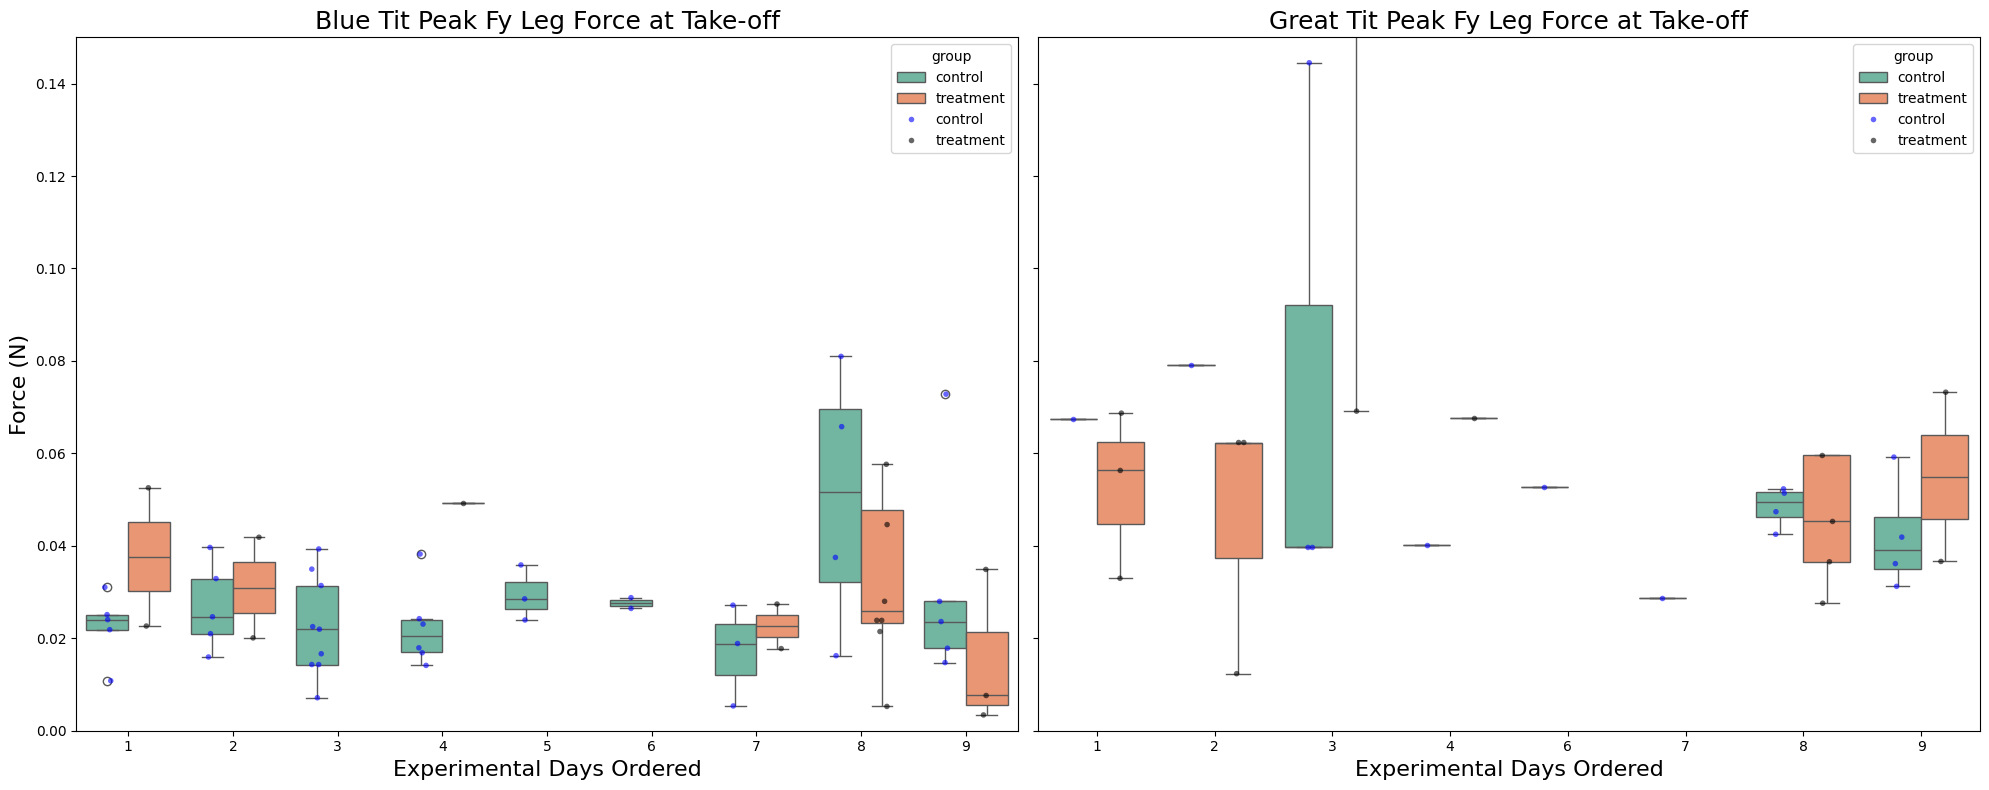

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)  # 1 row, 2 columns, shared y-axis
custom_palette = {'control': 'blue', 'treatment': 'black'}

# Plot for 'force_blue'
sns.boxplot(
    data=force_blue,
    x='exp_order',
    y='max_Fy',
    hue='group',
    palette='Set2',
    ax=axes[0],  # First subplot
    zorder=1
)

# Overlay scatterplot for 'force_blue'
sns.stripplot(
    data=force_blue,
    x='exp_order',
    y='max_Fy',
    hue='group',
    dodge=True,
    palette=custom_palette,
    alpha=0.6,
    size=4,
    edgecolor='black',
    ax=axes[0],
    zorder =2
)

# Customize the first subplot
axes[0].set_title('Blue Tit Peak Fy Leg Force at Take-off', fontsize=18)
axes[0].set_xlabel('Experimental Days Ordered', fontsize=16)
axes[0].set_ylabel('Force (N)', fontsize=16)
axes[0].set_ylim(0,0.15)

# Plot for 'force_great'
sns.boxplot(
    data=force_great,
    x='exp_order',
    y='max_Fy',
    hue='group',
    palette='Set2',
    ax=axes[1],
    zorder =1  # Second subplot
)

# Overlay scatterplot for 'force_great'
sns.stripplot(
    data=force_great,
    x='exp_order',
    y='max_Fy',
    hue='group',
    dodge=True,
    palette=custom_palette,
    alpha=0.6,
    size=4,
    edgecolor='black',
    ax=axes[1],
    zorder =2 
)

# Customize the second subplot
axes[1].set_title('Great Tit Peak Fy Leg Force at Take-off', fontsize=18)
axes[1].set_xlabel('Experimental Days Ordered', fontsize=16)
axes[1].set_ylabel('')  # Y-axis label only on the left subplot
#axes[1].set_ylim(0,0.7)

# Add shared legend for both plots
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles[:len(labels)//2], labels[:len(labels)//2], title='Group', loc='upper center', ncol=2, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## blue tit for accelerations

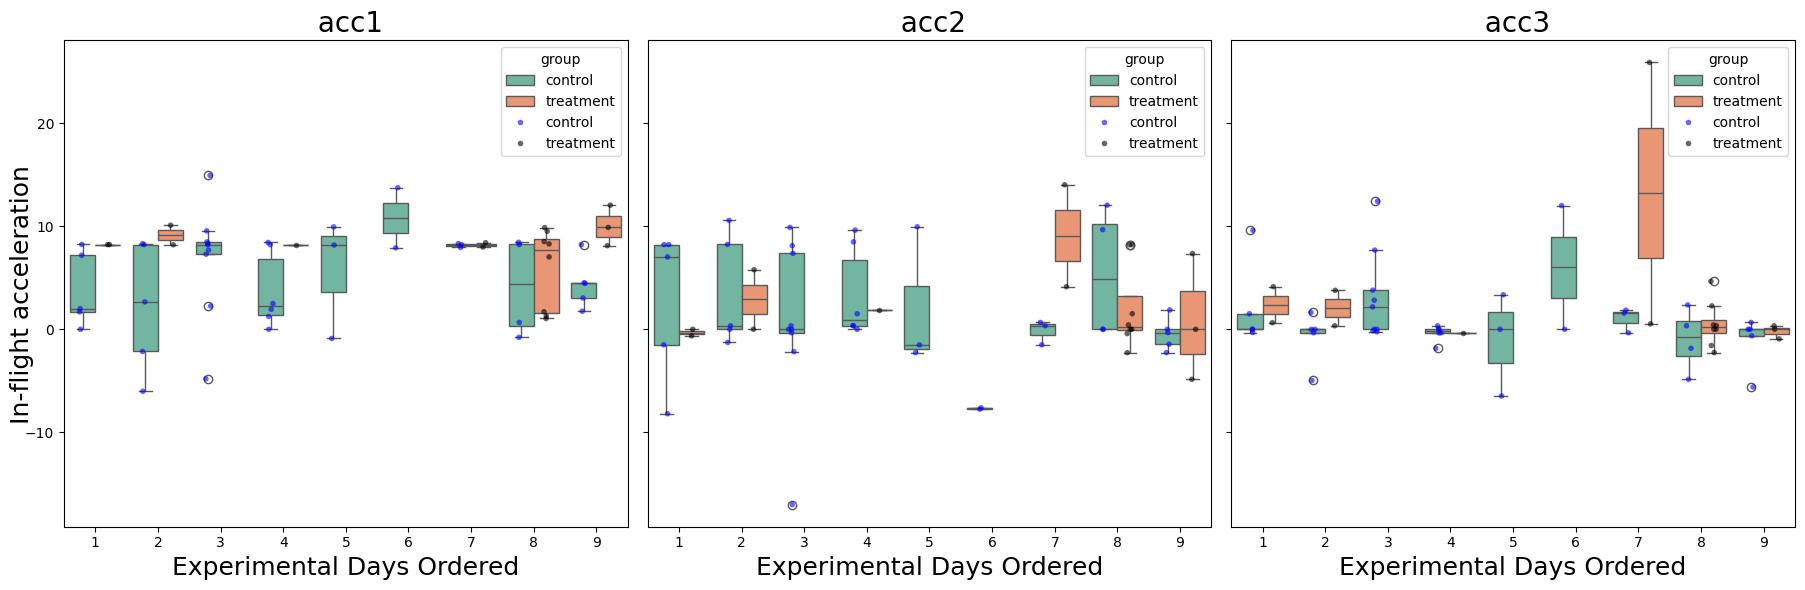

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'force_blue'

# Create a figure with subplots for each y-axis group side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns, shared y-axis

# List of y-axis variables to plot
y_vars = ['acc1', 'acc2', 'acc3']
custom_palette = {'control': 'blue', 'treatment': 'black'}

for i, y_var in enumerate(y_vars):
    # Create boxplot for each y-axis variable
    sns.boxplot(
        data=force_blue,
        x='exp_order',
        y=y_var,
        hue='group',
        palette="Set2",
        ax=axes[i]  # Plot on the specific subplot
    )

    # Overlay scatterplot for individual data points
    sns.stripplot(
        data=force_blue,
        x='exp_order',
        y=y_var,
        hue='group',
        dodge=True,
        palette=custom_palette,
        alpha=0.6,
        size=4,
        edgecolor='black',  # Black outline for the points
        ax=axes[i]  # Plot on the same subplot
    )

    # Customize subplot labels
    axes[i].set_title(f" {y_var}", fontsize=20)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Experimental Days Ordered', fontsize=18)

# Add shared y-axis label
fig.text(0, 0.5, 'In-flight acceleration', va='center', rotation='vertical', fontsize=18)

# Adjust legend to avoid duplication
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles[:len(labels)//2], labels[:len(labels)//2], title='Group', loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [157]:
print(force_blue.shape)
force_blue['id'].nunique()

(60, 15)


26

## great tit for acceleration

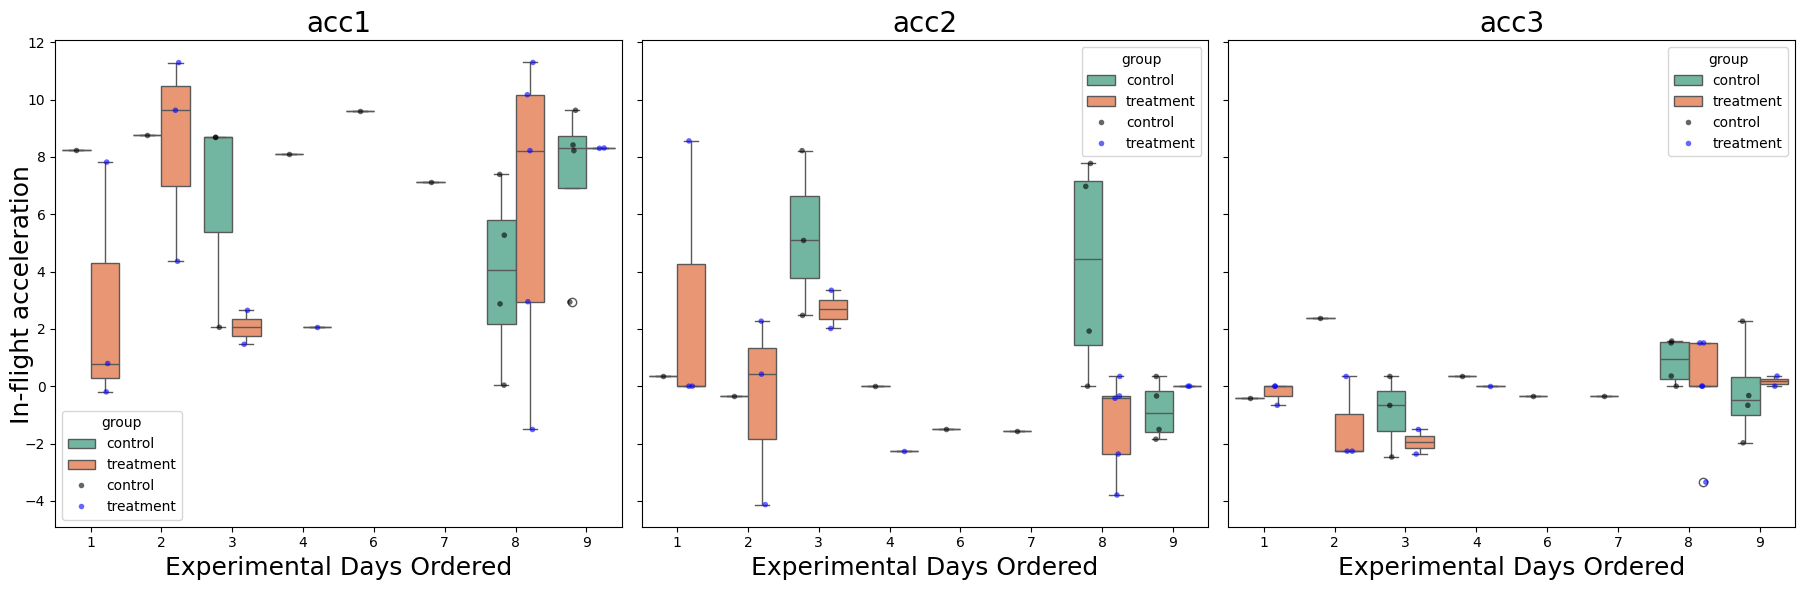

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'force_great'

# Create a figure with side-by-side subplots for each y-axis group
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns, shared y-axis

# List of y-axis variables to plot
y_vars = ['acc1', 'acc2', 'acc3']
custom_palette = {'control':'black','treatment':'blue'}
for i, y_var in enumerate(y_vars):
    # Create boxplot for each y-axis variable
    sns.boxplot(
        data=force_great,
        x='exp_order',
        y=y_var,
        hue='group',
        palette='Set2',
        ax=axes[i]  # Plot on the specific subplot
    )

    # Overlay scatterplot for individual data points
    sns.stripplot(
        data=force_great,
        x='exp_order',
        y=y_var,
        hue='group',
        dodge=True,
        palette=custom_palette,
        alpha=0.6,
        size=4,
        edgecolor='black',  # Black outline for the points
        ax=axes[i]  # Plot on the same subplot
    )

    # Customize subplot labels
    axes[i].set_title(f"{y_var}", fontsize=20)
    axes[i].set_ylabel('')  # Avoid repeated y-axis labels
    axes[i].set_xlabel('Experimental Days Ordered', fontsize=18)

# Add shared y-axis label
fig.text(0, 0.5, 'In-flight acceleration', va='center', rotation='vertical', fontsize=18)

# Adjust legend to avoid duplication
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles[:len(labels)//2], labels[:len(labels)//2], title='Group', loc='upper center', ncol=2, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [169]:
print(force_great.shape)
force_great['id'].nunique()

(32, 15)


11

In [ ]:
complete = F_first_visits_ir.dropna()

In [ ]:
from datetime import date

# Initialize the 'exp_order' column with NaN
complete['exp_order'] = pd.NA

# Get the unique days in sorted order (to ensure the order is consistent)
unique_days = sorted(complete['day'].unique())

# Assign 'exp_order' based on the index of the day in unique_days
for idx, day in enumerate(unique_days, start=1):  # start=1 to make the order start at 1
    complete.loc[complete['day'] == day, 'exp_order'] = idx


In [ ]:
F_first_visits, scare_visits_ir

## merge with the irfid-final_visits matchup. 

In [ ]:
scare_visits_ir = pd.read_csv('scare_visits_ir.csv')
scare_visits_ir = scare_visits_ir.rename(columns={'RFID': 'id'})

In [ ]:
import pandas as pd

# Assuming 'first_visit' and 'force_outcome' are already defined and have 'datetime' and 'id' columns

# Ensure 'datetime' columns are in datetime format
scare_visits_ir['datetime'] = pd.to_datetime(scare_visits_ir['datetime'])
force_outcome['datetime'] = pd.to_datetime(force_outcome['datetime'])
scare_visits_ir = scare_visits_ir.rename(columns={'datetime': 'visits_datetime'})
force_outcome = force_outcome.rename(columns={'datetime': 'force_datetime'})

# Initialize a list to store matching rows
matching_rows = []

# Iterate through each row in 'scare_visits_ir'
for _, fv_row in scare_visits_ir.iterrows():
    # Filter 'force_outcome' for matching 'id' and time difference within 3 seconds
    matches = force_outcome[
        (force_outcome['id'] == fv_row['id']) &
        (abs((force_outcome['irfid_datetime'] - fv_row['first_visit_datetime']).dt.total_seconds()) <= 2)
    ]

    # Append all columns from both rows to the result
    for _, match_row in matches.iterrows():
        combined_row = fv_row.to_dict()  # Add all columns from first_visit row
        combined_row.update(match_row.to_dict())  # Add all columns from force_outcome row
        matching_rows.append(combined_row)

# Convert the list of matching rows to a DataFrame
matching_result = pd.DataFrame(matching_rows)

# Verify the result
print(matching_result)

In [ ]:
matching_result.to_csv('irFid_scares.csv')

In [ ]:
irFid_scares = pd.read_csv('irFid_scares.csv', index_col =0)

## dataset

In [2]:
RFID_alldates = pd.read_csv('RFID_match_alldates.csv',index_col = 0)
RFID_alldates = RFID_alldates.reset_index(drop=True)
print(RFID_alldates.head(5))
print(RFID_alldates.dtypes)
print(RFID_alldates.shape)

           id  status        epoch_time_converted
0  3B00190DF0  Arrive  2024-11-11 11:02:37:628731
1  3B00190DF0  Depart  2024-11-11 11:02:41:445004
2  3B00190DF0  Arrive  2024-11-11 11:06:02:092349
3  3B00190DF0  Depart  2024-11-11 11:06:05:908444
4  3B00190DF0  Arrive  2024-11-11 11:07:16:615598
id                      object
status                  object
epoch_time_converted    object
dtype: object
(66980, 3)


## filter out valid visits

In [3]:
#datetime format conversion
RFID_alldates["epoch_time_converted"] = pd.to_datetime(RFID_alldates["epoch_time_converted"], format="%Y-%m-%d %H:%M:%S:%f")

# Filter out visits within 3 seconds of the previous visit
filtered_visits = [0]  # Initialize with the first visit

filtered_visits += [
    i for i in range(2, len(RFID_alldates), 2)  # Iterate over Arrive indices
    if i + 1 < len(RFID_alldates) and (RFID_alldates.loc[i, "epoch_time_converted"] - RFID_alldates.loc[filtered_visits[-1] + 1, "epoch_time_converted"]).total_seconds() > 3
]

# Create the filtered DataFrame
filtered_df = RFID_alldates.iloc[filtered_visits + [i + 1 for i in filtered_visits if i + 1 < len(RFID_alldates)]]

print(filtered_df)


               id  status       epoch_time_converted
0      3B00190DF0  Arrive 2024-11-11 11:02:37.628731
2      3B00190DF0  Arrive 2024-11-11 11:06:02.092349
4      3B00190DF0  Arrive 2024-11-11 11:07:16.615598
6      3B00190DF0  Arrive 2024-11-11 11:08:20.444974
8      3B00190DF0  Arrive 2024-11-11 11:09:41.158767
...           ...     ...                        ...
66971  3B0019B8CC  Depart 2025-03-06 17:15:21.767519
66973  01103FA4B2  Depart 2025-03-06 17:15:37.876120
66975  3B004CA42C  Depart 2025-03-06 17:18:22.692030
66977  3B004CA42C  Depart 2025-03-06 17:19:55.462039
66979  3B004CA42C  Depart 2025-03-06 17:23:46.013946

[66980 rows x 3 columns]


In [4]:
# Initialize the filtered DataFrame
filtered_rows = []

# Iterate through filtered indices to capture rows between 'Arrive' indices
for idx in range(len(filtered_visits) - 1):
    start = filtered_visits[idx]
    end = filtered_visits[idx + 1] + 1  # Include the next 'Arrive' index
    filtered_rows.extend(range(start, end))  # Add all rows between these indices

# Handle the last 'Arrive' index separately
if filtered_visits[-1] + 1 < len(RFID_alldates):
    filtered_rows.extend(range(filtered_visits[-1], filtered_visits[-1] + 2))

# Create the final filtered DataFrame
filtered_df = RFID_alldates.iloc[filtered_rows]

# Display the final filtered DataFrame
print(filtered_df)


               id  status       epoch_time_converted
0      3B00190DF0  Arrive 2024-11-11 11:02:37.628731
1      3B00190DF0  Depart 2024-11-11 11:02:41.445004
2      3B00190DF0  Arrive 2024-11-11 11:06:02.092349
2      3B00190DF0  Arrive 2024-11-11 11:06:02.092349
3      3B00190DF0  Depart 2024-11-11 11:06:05.908444
...           ...     ...                        ...
66976  3B004CA42C  Arrive 2025-03-06 17:19:51.844813
66977  3B004CA42C  Depart 2025-03-06 17:19:55.462039
66978  3B004CA42C  Arrive 2025-03-06 17:23:43.404058
66978  3B004CA42C  Arrive 2025-03-06 17:23:43.404058
66979  3B004CA42C  Depart 2025-03-06 17:23:46.013946

[100469 rows x 3 columns]


In [5]:
allrfids_filtered = filtered_df.drop_duplicates()
print(allrfids_filtered)

               id  status       epoch_time_converted
0      3B00190DF0  Arrive 2024-11-11 11:02:37.628731
1      3B00190DF0  Depart 2024-11-11 11:02:41.445004
2      3B00190DF0  Arrive 2024-11-11 11:06:02.092349
3      3B00190DF0  Depart 2024-11-11 11:06:05.908444
4      3B00190DF0  Arrive 2024-11-11 11:07:16.615598
...           ...     ...                        ...
66975  3B004CA42C  Depart 2025-03-06 17:18:22.692030
66976  3B004CA42C  Arrive 2025-03-06 17:19:51.844813
66977  3B004CA42C  Depart 2025-03-06 17:19:55.462039
66978  3B004CA42C  Arrive 2025-03-06 17:23:43.404058
66979  3B004CA42C  Depart 2025-03-06 17:23:46.013946

[65288 rows x 3 columns]


In [15]:
allrfids_filtered.to_csv('allrfids_filtered.csv')

## how many individuals in total? 66!

In [6]:
# Convert Series to DataFrame and assign a column name
unique_ids = pd.read_csv('unique_ids.csv')

# adding empty columns
unique_ids['species'] =np.NaN
unique_ids['sex'] =np.NaN
unique_ids['age'] =np.NaN

# Display the DataFrame
print(unique_ids.head(5))


           id  species  sex  age
0  3B00190DF0      NaN  NaN  NaN
1  0110177BFD      NaN  NaN  NaN
2  01103FBB55      NaN  NaN  NaN
3  3B004DB16E      NaN  NaN  NaN
4  01103F8EAC      NaN  NaN  NaN


In [7]:
rfid_info = pd.read_csv('C:/Users/kmh/Documents/DATA/2024-5/JAN_RFID.csv', index_col = 0)
print(rfid_info.head(5))
print(rfid_info.columns)


           id  frequency species sex  age
1  3B004873F2        343   bluti   F  5.0
2  3B0018C2F6        259   greti   F  6.0
3  3B00192E1E        241   bluti   M  6.0
4  3B0019B8CC        238   greti   F  5.0
5  3B004CD4DE        221   bluti   M  5.0
Index(['id', 'frequency', 'species', 'sex', 'age'], dtype='object')


In [8]:
merged_rfid_info = pd.merge(unique_ids, rfid_info, on= 'id', how = 'left')
merged_rfid_info
rfid_info_tofill = merged_rfid_info.drop(columns = ["species_x","sex_x","age_x","frequency"])
rfid_info_tofill
rfid_info_tofill.to_csv('C:/Users/kmh/Documents/DATA/2024-5/rfid_info_tofill.csv')

In [9]:
unique_ids['species'] =np.NaN
unique_ids['sex'] =np.NaN
unique_ids['age'] =np.NaN
unique_ids.head(5)

id  species  sex  age
0  3B00190DF0      NaN  NaN  NaN
1  0110177BFD      NaN  NaN  NaN
2  01103FBB55      NaN  NaN  NaN
3  3B004DB16E      NaN  NaN  NaN
4  01103F8EAC      NaN  NaN  NaN

# RFID info

In [4]:
final_rfids = pd.read_csv('C:/Users/kmh/Documents/DATA/2024-5/final_rfids.csv', index_col =0)
final_rfids.head(5)

id species sex  age
0  3B00190DF0   greti   M    6
1  0110177BFD   greti   M    5
2  01103FBB55   greti   F    6
3  3B004DB16E   bluti   M    6
4  01103F8EAC   greti   M    5

In [5]:
allrfids_filtered = pd.read_csv('allrfids_filtered.csv', index_col = 0)
print(allrfids_filtered.head(5))
print(allrfids_filtered.shape)

           id  status        epoch_time_converted
0  3B00190DF0  Arrive  2024-11-11 11:02:37.628731
1  3B00190DF0  Depart  2024-11-11 11:02:41.445004
2  3B00190DF0  Arrive  2024-11-11 11:06:02.092349
3  3B00190DF0  Depart  2024-11-11 11:06:05.908444
4  3B00190DF0  Arrive  2024-11-11 11:07:16.615598
(65288, 3)


In [6]:
# Merge allrfids_filtered with final_rfids to include species information
full_rfids = pd.merge(allrfids_filtered, final_rfids, on='id', how='inner')
print(full_rfids.head(5))
print(full_rfids.shape)

           id  status        epoch_time_converted species sex  age
0  3B00190DF0  Arrive  2024-11-11 11:02:37.628731   greti   M    6
1  3B00190DF0  Depart  2024-11-11 11:02:41.445004   greti   M    6
2  3B00190DF0  Arrive  2024-11-11 11:06:02.092349   greti   M    6
3  3B00190DF0  Depart  2024-11-11 11:06:05.908444   greti   M    6
4  3B00190DF0  Arrive  2024-11-11 11:07:16.615598   greti   M    6
(65288, 6)


## datetime manipulations

In [7]:
full_rfids

id  status        epoch_time_converted species sex  age
0      3B00190DF0  Arrive  2024-11-11 11:02:37.628731   greti   M    6
1      3B00190DF0  Depart  2024-11-11 11:02:41.445004   greti   M    6
2      3B00190DF0  Arrive  2024-11-11 11:06:02.092349   greti   M    6
3      3B00190DF0  Depart  2024-11-11 11:06:05.908444   greti   M    6
4      3B00190DF0  Arrive  2024-11-11 11:07:16.615598   greti   M    6
...           ...     ...                         ...     ...  ..  ...
65283  3B004CA42C  Depart  2025-03-06 17:18:22.692030   bluti   F    6
65284  3B004CA42C  Arrive  2025-03-06 17:19:51.844813   bluti   F    6
65285  3B004CA42C  Depart  2025-03-06 17:19:55.462039   bluti   F    6
65286  3B004CA42C  Arrive  2025-03-06 17:23:43.404058   bluti   F    6
65287  3B004CA42C  Depart  2025-03-06 17:23:46.013946   bluti   F    6

[65288 rows x 6 columns]

In [8]:

# Convert 'epoch_time_converted' to datetime
full_rfids['epoch_time_converted'] = pd.to_datetime(full_rfids['epoch_time_converted'])

# Add a 'date' column
full_rfids['date'] = full_rfids['epoch_time_converted'].dt.date

# Group by date and calculate daily visits
daily_visits_allspecies = full_rfids.groupby('date').apply(
    lambda x: ((x['status'] == 'Arrive') | (x['status'] == 'Displace')).sum()
).reset_index(name='daily_visits')

daily_visits_species = full_rfids.groupby(['date','species']).apply(
    lambda x: ((x['status'] == 'Arrive') | (x['status'] == 'Displace')).sum()
).reset_index(name='daily_species_visits')

# Add 'month' column
daily_visits_allspecies['month'] = pd.to_datetime(daily_visits_allspecies['date']).dt.month

# Add 'month' column
daily_visits_species['month'] = pd.to_datetime(daily_visits_species['date']).dt.month

C:\Users\kmh\AppData\Local\Temp\ipykernel_1488\3927390431.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_visits_allspecies = full_rfids.groupby('date').apply(
C:\Users\kmh\AppData\Local\Temp\ipykernel_1488\3927390431.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_visits_species = full_rfids.groupby(['date','species']).apply(


### violin plots

In [8]:
print(daily_visits_allspecies.head(5))
print(daily_visits_species.head(5))

         date  daily_visits  month
0  2024-11-11            50     11
1  2024-11-12            70     11
2  2024-11-14           128     11
3  2024-11-15            41     11
4  2024-11-18           133     11
         date species  daily_species_visits  month
0  2024-11-11   bluti                     1     11
1  2024-11-11   greti                    49     11
2  2024-11-12   bluti                     1     11
3  2024-11-12   greti                    69     11
4  2024-11-14   bluti                     9     11


## no. of visits per month

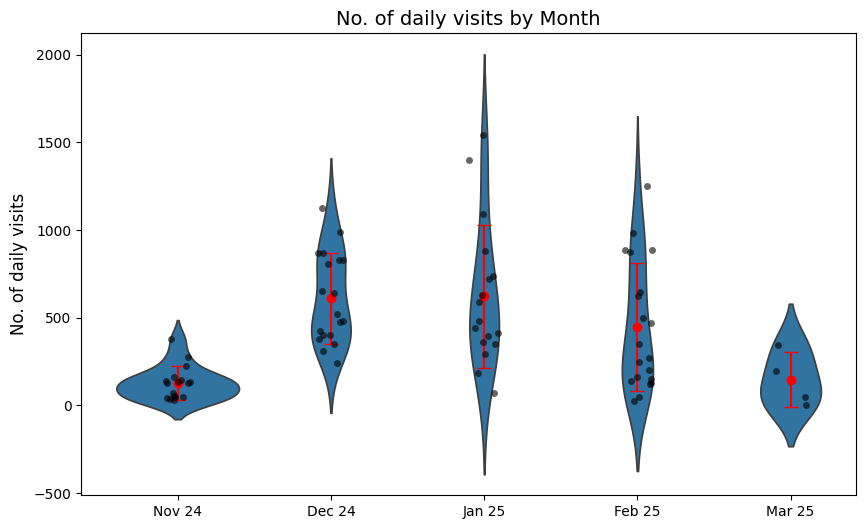

In [12]:
# Map months to custom labels
month_mapping = {11: 'Nov 24', 12: 'Dec 24', 1: 'Jan 25', 2: 'Feb 25', 3: 'Mar 25'}

# Create a column with custom labels directly in the dataset
daily_visits_allspecies['month_label'] = daily_visits_allspecies['month'].map(month_mapping)

# Define the custom order of months
custom_order = ['Nov 24', 'Dec 24', 'Jan 25', 'Feb 25', 'Mar 25']

# Violin Plot for Daily Visits per Month with Scatter Points
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='month_label', 
    y='daily_visits', 
    data=daily_visits_allspecies, 
    inner=None, 
    order=custom_order  # Ensure months are displayed in the correct order
)
sns.stripplot(
    x='month_label', 
    y='daily_visits', 
    data=daily_visits_allspecies, 
    color='black', 
    alpha=0.6, 
    jitter=True, 
    order=custom_order  # Ensure scatter points align with the months
)
plt.title('No. of daily visits by Month', fontsize = 14)
plt.xlabel('')
plt.ylabel('No. of daily visits', fontsize = 12)

# Calculate mean and standard deviation for daily visits per month
mean_std = daily_visits_allspecies.groupby('month_label')['daily_visits'].agg(['mean', 'std']).reset_index()

# Overlay mean and standard deviation as whiskers
for i, row in mean_std.iterrows():
    x_position = custom_order.index(row['month_label'])  # Explicitly align error bars with month positions
    plt.errorbar(
        x=x_position, 
        y=row['mean'], 
        yerr=row['std'], 
        fmt='o', 
        color='red', 
        capsize=5
    )

plt.show()

In [40]:
mean_std

month        mean         std
0      1  622.470588  407.180875
1      2  448.150000  364.480636
2      3  147.500000  154.963437
3     11  128.058824   94.828444
4     12  610.315789  257.335504

## no. of visits per month per species

C:\Users\kmh\AppData\Local\Temp\ipykernel_44732\1451096344.py:28: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


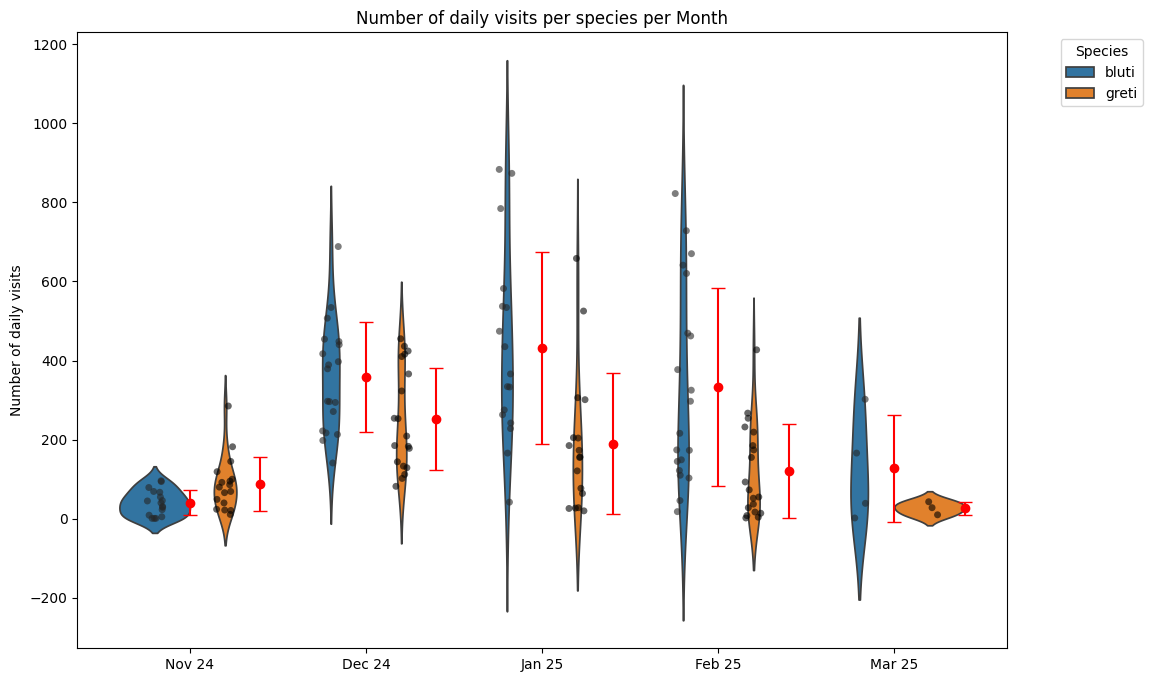

In [39]:

# Ensure mean and standard deviation are calculated per species and month
mean_std_species = daily_visits_species.groupby(['month', 'species'])['daily_species_visits'].agg(['mean', 'std']).reset_index()

# Create the figure
plt.figure(figsize=(12, 8))

# Map months to custom labels
month_mapping = {11: 'Nov 24', 12: 'Dec 24', 1: 'Jan 25', 2: 'Feb 25', 3: 'Mar 25'}

# Create a column with custom labels directly in the dataset
daily_visits_species['month_label'] = daily_visits_species['month'].map(month_mapping)

# Define the custom order of months
custom_order = ['Nov 24', 'Dec 24', 'Jan 25', 'Feb 25', 'Mar 25']

# Violin Plot for Number of Individuals per Month, separated per species
violin_plot = sns.violinplot(
    x='month_label', 
    y='daily_species_visits', 
    hue='species', 
    order=custom_order, 
    data=daily_visits_species, 
    inner=None, 
    dodge=True  # Separate violins by species
)

# Add scatter points (individual data)
sns.stripplot(
    x='month_label', 
    y='daily_species_visits', 
    hue='species', 
    order=custom_order, 
    data=daily_visits_species, 
    dodge=True, 
    color='black', 
    alpha=0.6, 
    jitter=True
)

# Adjust legend to avoid duplication
handles, labels = violin_plot.get_legend_handles_labels()
plt.legend(handles[:len(labels) // 2], labels[:len(labels) // 2], title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Number of daily visits per species per Month')
plt.xlabel('')
plt.ylabel('Number of daily visits')

# Overlay mean and standard deviation as whiskers
# Use the positions assigned by Seaborn
for _, row in mean_std_species.iterrows():
    # Map numeric month to corresponding label
    month_label = month_mapping[row['month']]
    
    # Extract the positions of the violins for the given month and species
    unique_months = custom_order
    unique_species = sorted(daily_visits_species['species'].unique())
    month_index = unique_months.index(month_label)  # Position for month
    species_offset = unique_species.index(row['species']) * 0.8 / len(unique_species)  # Offset for species positioning
    x_position = month_index + species_offset  # Combine month and species offset for x-position

    # Align whiskers inside violins
    plt.errorbar(
        x=x_position, 
        y=row['mean'], 
        yerr=row['std'], 
        fmt='o', 
        color='red', 
        capsize=5
    )

plt.show()

## no. of individuals per day per month

In [13]:
full_rfids.head(5)

id  status       epoch_time_converted species sex  age        date
0  3B00190DF0  Arrive 2024-11-11 11:02:37.628731   greti   M    6  2024-11-11
1  3B00190DF0  Depart 2024-11-11 11:02:41.445004   greti   M    6  2024-11-11
2  3B00190DF0  Arrive 2024-11-11 11:06:02.092349   greti   M    6  2024-11-11
3  3B00190DF0  Depart 2024-11-11 11:06:05.908444   greti   M    6  2024-11-11
4  3B00190DF0  Arrive 2024-11-11 11:07:16.615598   greti   M    6  2024-11-11

In [13]:
# Number of unique individuals per day (all species) considering the status condition
unique_indivs_per_day_allspecies = full_rfids.groupby('date').apply(
    lambda x: x.loc[(x['status'] == 'Arrive') | (x['status'] == 'Displace'), 'id'].nunique()
).reset_index(name='unique_individuals')

# Number of unique individuals per day per species considering the status condition
unique_indivs_per_day_species = full_rfids.groupby(['date', 'species']).apply(
    lambda x: x.loc[(x['status'] == 'Arrive') | (x['status'] == 'Displace'), 'id'].nunique()
).reset_index(name='unique_individuals')

# Group by date and calculate daily visits per individual 
daily_visits_per_indivs_allspecies = full_rfids.groupby(['id','date']).apply(
    lambda x: ((x['status'] == 'Arrive') | (x['status'] == 'Displace')).sum()
).reset_index(name='daily_visits')

daily_visits_per_indivs_species = full_rfids.groupby(['id','date','species']).apply(
    lambda x: ((x['status'] == 'Arrive') | (x['status'] == 'Displace')).sum()
).reset_index(name='daily_species_visits')

# Add 'month' column
unique_indivs_per_day_allspecies['month'] = pd.to_datetime(unique_indivs_per_day_allspecies['date']).dt.month
unique_indivs_per_day_species['month'] = pd.to_datetime(unique_indivs_per_day_species['date']).dt.month
daily_visits_per_indivs_allspecies['month'] = pd.to_datetime(daily_visits_per_indivs_allspecies['date']).dt.month
daily_visits_per_indivs_species['month'] = pd.to_datetime(daily_visits_per_indivs_species['date']).dt.month

C:\Users\kmh\AppData\Local\Temp\ipykernel_36356\1447132588.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_indivs_per_day_allspecies = full_rfids.groupby('date').apply(
C:\Users\kmh\AppData\Local\Temp\ipykernel_36356\1447132588.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_indivs_per_day_species = full_rfids.groupby(['date', 'species']).apply(
C:\Users\kmh\AppData\Local\Temp\ipykerne

In [34]:
print(unique_indivs_per_day_allspecies.head(5))
print(unique_indivs_per_day_species.head(5))
print(daily_visits_per_indivs_allspecies.head(5))
print(daily_visits_per_indivs_species.head(5))

         date  unique_individuals  month
0  2024-11-11                   4     11
1  2024-11-12                   5     11
2  2024-11-14                  10     11
3  2024-11-15                   7     11
4  2024-11-18                   7     11
         date species  unique_individuals  month
0  2024-11-11   bluti                   1     11
1  2024-11-11   greti                   3     11
2  2024-11-12   bluti                   1     11
3  2024-11-12   greti                   4     11
4  2024-11-14   bluti                   3     11
           id        date  daily_visits  month
0  011016B2E1  2024-12-17             9     12
1  011016B2E1  2024-12-18            33     12
2  011016B2E1  2024-12-21             2     12
3  011016B2E1  2024-12-22            27     12
4  011016B2E1  2024-12-23            48     12
           id        date species  daily_species_visits  month
0  011016B2E1  2024-12-17   bluti                     9     12
1  011016B2E1  2024-12-18   bluti                   

## no. of individuals per month

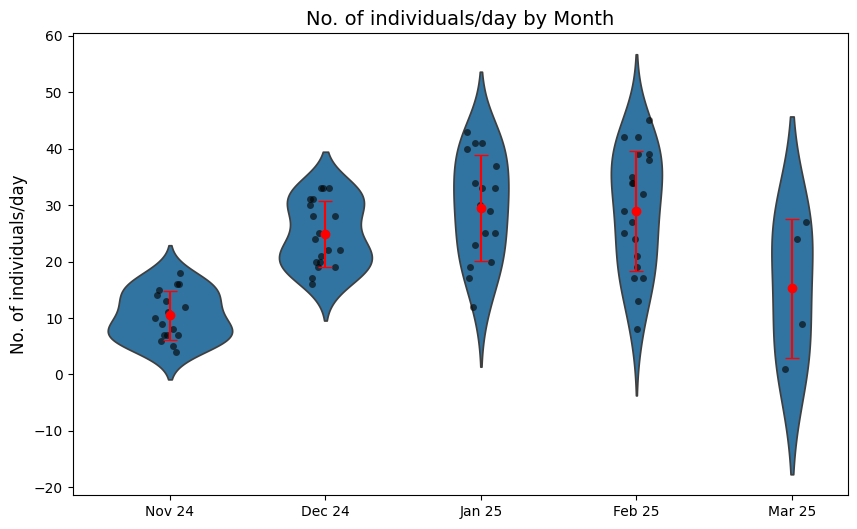

In [14]:
# Map months to custom labels
month_mapping = {11: 'Nov 24', 12: 'Dec 24', 1: 'Jan 25', 2: 'Feb 25', 3: 'Mar 25'}

# Create a column with custom labels directly in the dataset
unique_indivs_per_day_allspecies['month_label'] = unique_indivs_per_day_allspecies['month'].map(month_mapping)

# Define the custom order of months
custom_order = ['Nov 24', 'Dec 24', 'Jan 25', 'Feb 25', 'Mar 25']

# Violin Plot for Daily Visits per Month with Scatter Points
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='month_label', 
    y='unique_individuals', 
    data=unique_indivs_per_day_allspecies, 
    inner=None, 
    order=custom_order  # Ensure months are displayed in the correct order
)
sns.stripplot(
    x='month_label', 
    y='unique_individuals', 
    data=unique_indivs_per_day_allspecies, 
    color='black', 
    alpha=0.6, 
    jitter=True, 
    order=custom_order,
    zorder=3 # Ensure scatter points align with the months
)
plt.title('No. of individuals/day by Month', fontsize = 14)
plt.xlabel('')
plt.ylabel('No. of individuals/day', fontsize = 12)

# Calculate mean and standard deviation for daily visits per month
mean_std3 = unique_indivs_per_day_allspecies.groupby('month_label')['unique_individuals'].agg(['mean', 'std']).reset_index()

# Overlay mean and standard deviation as whiskers
for i, row in mean_std3.iterrows():
    x_position = custom_order.index(row['month_label'])  # Explicitly align error bars with month positions
    plt.errorbar(
        x=x_position, 
        y=row['mean'], 
        yerr=row['std'], 
        fmt='o', 
        color='red', 
        capsize=5,
        zorder = 3
    )

plt.show()

## no. of individuals per species per month

C:\Users\kmh\AppData\Local\Temp\ipykernel_36356\3791245155.py:25: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


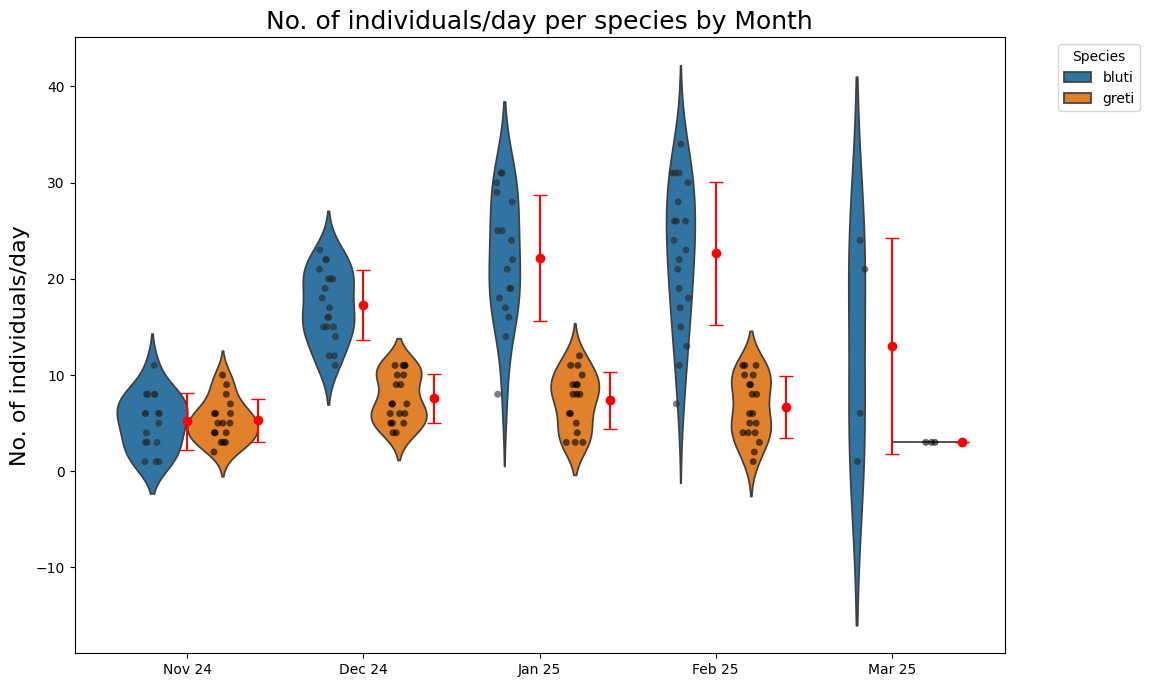

In [17]:


# Create the figure
plt.figure(figsize=(12, 8))

# Map months to custom labels
month_mapping = {11: 'Nov 24', 12: 'Dec 24', 1: 'Jan 25', 2: 'Feb 25', 3: 'Mar 25'}

# Create a column with custom labels directly in the dataset
unique_indivs_per_day_species['month_label'] = unique_indivs_per_day_species['month'].map(month_mapping)

# Define the custom order of months
custom_order = ['Nov 24', 'Dec 24', 'Jan 25', 'Feb 25', 'Mar 25']

# Violin Plot for Number of Individuals per Month, separated per species
violin_plot = sns.violinplot(
    x='month_label', 
    y='unique_individuals', 
    hue='species', 
    order=custom_order, 
    data=unique_indivs_per_day_species, 
    inner=None, 
    dodge=True  # Separate violins by species
)

# Add scatter points (individual data)
sns.stripplot(
    x='month_label', 
    y='unique_individuals', 
    hue='species', 
    order=custom_order, 
    data=unique_indivs_per_day_species, 
    dodge=True, 
    color='black', 
    alpha=0.6, 
    jitter=True,
    zorder =3 
)

# Adjust legend to avoid duplication
handles, labels = violin_plot.get_legend_handles_labels()
plt.legend(handles[:len(labels) // 2], labels[:len(labels) // 2], title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('No. of individuals/day per species by Month', fontsize =18)
plt.xlabel('')
plt.ylabel('No. of individuals/day', fontsize =16)

# Ensure mean and standard deviation are calculated per species and month
mean_std_species3 = unique_indivs_per_day_species.groupby(['month', 'species'])['unique_individuals'].agg(['mean', 'std']).reset_index()

# Overlay mean and standard deviation as whiskers
# Use the positions assigned by Seaborn
for _, row in mean_std_species3.iterrows():
    # Map numeric month to corresponding label
    month_label = month_mapping[row['month']]
    
    # Extract the positions of the violins for the given month and species
    unique_months = custom_order
    unique_species = sorted(daily_visits_species['species'].unique())
    month_index = unique_months.index(month_label)  # Position for month
    species_offset = unique_species.index(row['species']) * 0.8 / len(unique_species)  # Offset for species positioning
    x_position = month_index + species_offset  # Combine month and species offset for x-position

    # Align whiskers inside violins
    plt.errorbar(
        x=x_position, 
        y=row['mean'], 
        yerr=row['std'], 
        fmt='o', 
        color='red', 
        capsize=5
    )

plt.show()

## no. of visits per individual per month

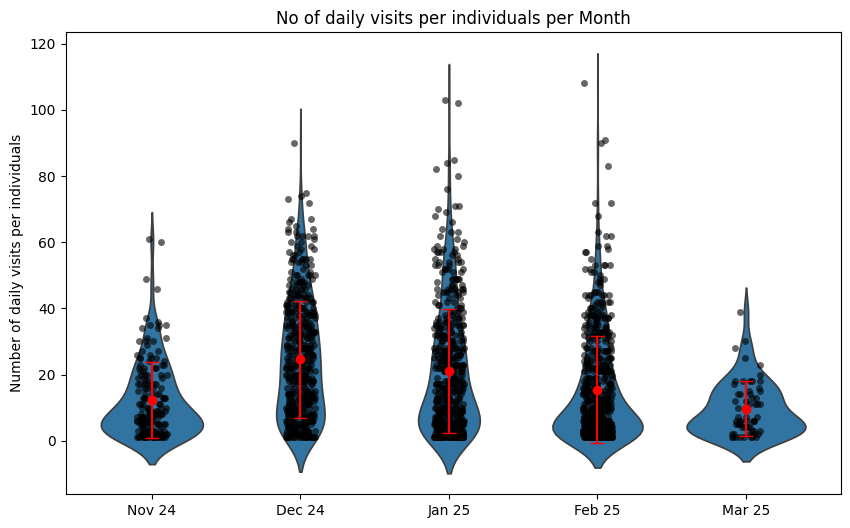

In [41]:
# Map months to custom labels
month_mapping = {11: 'Nov 24', 12: 'Dec 24', 1: 'Jan 25', 2: 'Feb 25', 3: 'Mar 25'}

# Create a column with custom labels directly in the dataset
daily_visits_per_indivs_allspecies['month_label'] = daily_visits_per_indivs_allspecies['month'].map(month_mapping)

# Define the custom order of months
custom_order = ['Nov 24', 'Dec 24', 'Jan 25', 'Feb 25', 'Mar 25']

# Violin Plot for Daily Visits per Month with Scatter Points
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='month_label', 
    y='daily_visits', 
    data=daily_visits_per_indivs_allspecies, 
    inner=None, 
    order=custom_order  # Ensure months are displayed in the correct order
)
sns.stripplot(
    x='month_label', 
    y='daily_visits', 
    data=daily_visits_per_indivs_allspecies, 
    color='black', 
    alpha=0.6, 
    jitter=True, 
    order=custom_order  # Ensure scatter points align with the months
)
plt.title('No of daily visits per individuals per Month')
plt.xlabel('')
plt.ylabel('Number of daily visits per individuals')

# Calculate mean and standard deviation for daily visits per month
mean_std = daily_visits_per_indivs_allspecies.groupby('month_label')['daily_visits'].agg(['mean', 'std']).reset_index()

# Overlay mean and standard deviation as whiskers
for i, row in mean_std.iterrows():
    x_position = custom_order.index(row['month_label'])  # Explicitly align error bars with month positions
    plt.errorbar(
        x=x_position, 
        y=row['mean'], 
        yerr=row['std'], 
        fmt='o', 
        color='red', 
        capsize=5,
        zorder = 3
    )

plt.show()

## no. of visits per individual per species per month

C:\Users\kmh\AppData\Local\Temp\ipykernel_44732\3008983529.py:28: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


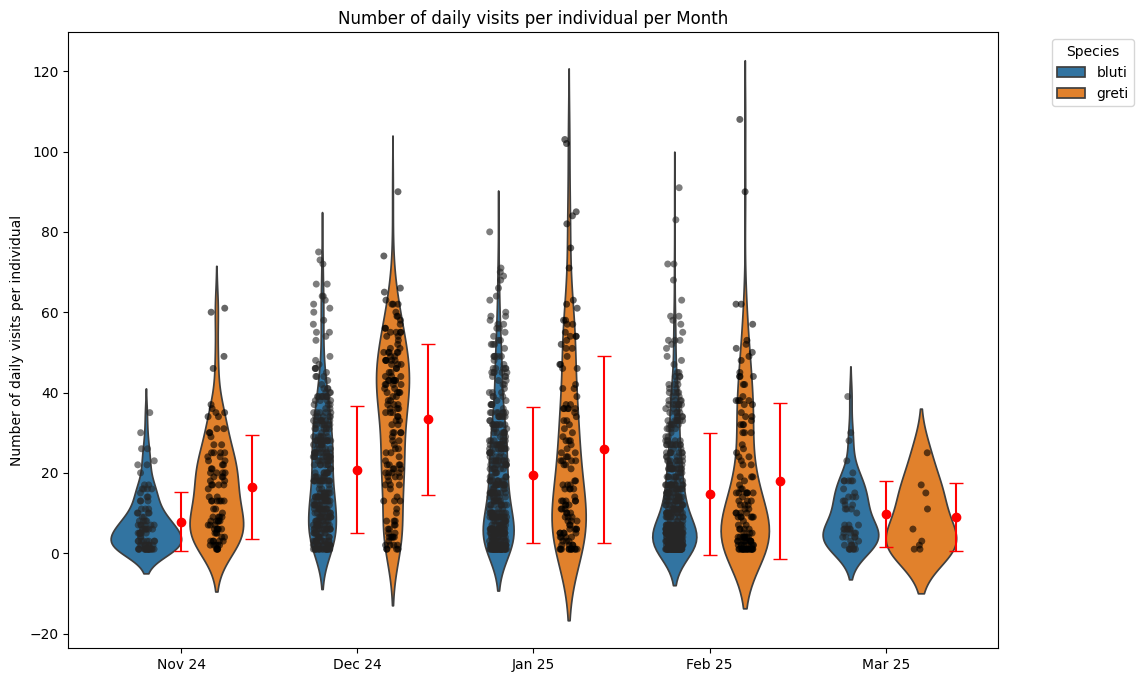

In [38]:

# Ensure mean and standard deviation are calculated per species and month
mean_std_species2 = daily_visits_per_indivs_species.groupby(['month', 'species'])['daily_species_visits'].agg(['mean', 'std']).reset_index()

# Create the figure
plt.figure(figsize=(12, 8))

# Map months to custom labels
month_mapping = {11: 'Nov 24', 12: 'Dec 24', 1: 'Jan 25', 2: 'Feb 25', 3: 'Mar 25'}

# Create a column with custom labels directly in the dataset
daily_visits_per_indivs_species['month_label'] = daily_visits_per_indivs_species['month'].map(month_mapping)

# Define the custom order of months
custom_order = ['Nov 24', 'Dec 24', 'Jan 25', 'Feb 25', 'Mar 25']

# Violin Plot for Number of Individuals per Month, separated per species
violin_plot = sns.violinplot(
    x='month_label', 
    y='daily_species_visits', 
    hue='species', 
    order=custom_order, 
    data=daily_visits_per_indivs_species, 
    inner=None, 
    dodge=True  # Separate violins by species
)

# Add scatter points (individual data)
sns.stripplot(
    x='month_label', 
    y='daily_species_visits', 
    hue='species', 
    order=custom_order, 
    data=daily_visits_per_indivs_species, 
    dodge=True, 
    color='black', 
    alpha=0.6, 
    jitter=True
)

# Adjust legend to avoid duplication
handles, labels = violin_plot.get_legend_handles_labels()
plt.legend(handles[:len(labels) // 2], labels[:len(labels) // 2], title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Number of daily visits per individual per Month')
plt.xlabel('')
plt.ylabel('Number of daily visits per individual')

# Overlay mean and standard deviation as whiskers
# Use the positions assigned by Seaborn
for _, row in mean_std_species2.iterrows():
    # Map numeric month to corresponding label
    month_label = month_mapping[row['month']]
    
    # Extract the positions of the violins for the given month and species
    unique_months = custom_order
    unique_species = sorted(daily_visits_species['species'].unique())
    month_index = unique_months.index(month_label)  # Position for month
    species_offset = unique_species.index(row['species']) * 0.8 / len(unique_species)  # Offset for species positioning
    x_position = month_index + species_offset  # Combine month and species offset for x-position

    # Align whiskers inside violins
    plt.errorbar(
        x=x_position, 
        y=row['mean'], 
        yerr=row['std'], 
        fmt='o', 
        color='red', 
        capsize=5
    )

plt.show()

## 4 accelerations normal vs. escape

### 1. prepare a dataset
'leg_acc','acc1','acc2','acc3',RFID,'exp_day','scared','group'
action steps: 
- have all the scare days marked by scare outcome: 6 scare days need video review from the green notepad at home (being copied)
- re-run codes to prepare irfid_calc_focused for only experimental days 
- calculate acc1 - acc3 from IR 
- 